In [170]:
import pandas as pd
import gensim
import nltk
import matplotlib.pyplot as plt
import statistics
import numpy as np
from nltk.corpus import wordnet as wn
from textblob.tokenizers import word_tokenize
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
import os
import math

In [171]:
df = pd.read_excel('fullinfo.xls')
df

Rank                       Company Name         Country  \
0        1                               ICBC           China   
1        2            China Construction Bank           China   
2        3                 Berkshire Hathaway   United States   
3        4                     JPMorgan Chase   United States   
4        5                        Wells Fargo   United States   
5        6         Agricultural Bank of China           China   
6        7                    Bank of America   United States   
7        8                      Bank of China           China   
8        9                              Apple   United States   
9       10                       Toyota Motor           Japan   
10      11                               AT&T   United States   
11      12                          Citigroup   United States   
12      13                         ExxonMobil   United States   
13      14                   General Electric   United States   
14      15                Samsung Electronics     South Korea   
15      16            Ping An Insurance Group           China   
16      17                    Wal-Mart Stores   United States   
17      18             Verizon Communications   United States   
18      19                          Microsoft   United States   
19      20                  Royal Dutch Shell     Netherlands   
20      21                            Allianz         Germany   
21      22                       China Mobile       Hong Kong   
22      23                        BNP Paribas          France   
23      24                           Alphabet   United States   
24      25                              Total          France   
25      26                          AXA Group          France   
26      27                            Daimler         Germany   
27      28                   Volkswagen Group         Germany   
28      29           Mitsubishi UFJ Financial           Japan   
29      30                            Comcast   United States   
...    ...                                ...             ...   
1959  1960          China Great Wall Computer           China   
1960  1961          Tian An China Investments       Hong Kong   
1961  1962                      HollyFrontier   United States   
1962  1963        Dah Sing Financial Holdings       Hong Kong   
1963  1964                   Nanya Technology          Taiwan   
1964  1965           Shanxi Taigang Stainless           China   
1965  1966             First Horizon National   United States   
1966  1967                 Brother Industries           Japan   
1967  1968              Chicago Bridge & Iron     Netherlands   
1968  1969       Belle International Holdings       Hong Kong   
1969  1970                        F5 Networks   United States   
1970  1971                            Valspar   United States   
1971  1972                       DKSH Holding     Switzerland   
1972  1973                      Grupo Galicia       Argentina   
1973  1974                      Bank of Iwate           Japan   
1974  1975  Konica Minolta Business Solutions           Japan   
1975  1976             Synnex Technology Intl          Taiwan   
1976  1977                            Eurazeo          France   
1977  1978                         Bankunited   United States   
1978  1979                    Barry Callebaut     Switzerland   
1979  1980                           Inchcape  United Kingdom   
1980  1981                Yamanashi Chuo Bank           Japan   
1981  1982     Guangxi Guiguan Electric Power           China   
1982  1983          Live Nation Entertainment   United States   
1983  1984              Shaanxi Coal Industry           China   
1984  1985                            Aurubis         Germany   
1985  1986                          BEKB-BCBE     Switzerland   
1986  1987                  Fastighets Balder          Sweden   
1987  1988                Akamai Technologies   United States   
1988  1989                          Oita 

In [172]:
company=[]
for i in range(0,1990):
    company.append([])
n=1
for i in df['Company Name']:
    company[n].append(i)
    n+=1
n=1
for i in df['Industry']:
    company[n].append(i)
    n+=1
print(company)

[[], ['ICBC', 'Major Banks'], ['China Construction Bank', 'Major Banks'], ['Berkshire Hathaway', 'Investment Services'], ['JPMorgan Chase', 'Major Banks'], ['Wells Fargo', 'Major Banks'], ['Agricultural Bank of China', 'Regional Banks'], ['Bank of America', 'Major Banks'], ['Bank of China', 'Major Banks'], ['Apple', 'Computer Hardware'], ['Toyota Motor', 'Auto & Truck Manufacturers'], ['AT&T', 'Telecommunications services'], ['Citigroup', 'Major Banks'], ['ExxonMobil', 'Oil & Gas Operations'], ['General Electric', 'Conglomerates'], ['Samsung Electronics', 'Semiconductors'], ['Ping An Insurance Group', 'Diversified Insurance'], ['Wal-Mart Stores', 'Discount Stores'], ['Verizon Communications', 'Telecommunications services'], ['Microsoft', 'Software & Programming'], ['Royal Dutch Shell', 'Oil & Gas Operations'], ['Allianz', 'Diversified Insurance'], ['China Mobile', 'Telecommunications services'], ['BNP Paribas', 'Major Banks'], ['Alphabet', 'Computer Services'], ['Total', 'Oil & Gas Ope

In [173]:
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
def tokenize(text):
    lda_tokens = []
    tokens = word_tokenize(text.lower())
    for token in tokens:
        lda_tokens.append(token)
    return lda_tokens

def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) >1]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [174]:
text_data=[]
for line in df['Description']:
    tokens = prepare_text_for_lda(line)
    text_data.append(tokens)

In [175]:
# bigram
phrases = Phrases(text_data)
bigram = Phraser(phrases)

n=0
for doc in text_data:
    text_data[n]=bigram[doc]
    n+=1
print(text_data)

[['industrial', 'commercial', 'bank', 'of', 'china', 'ltd._engage', 'in', 'the', 'provision_of', 'commercial_banking', 'and', 'financial', 'services', 'it_operate', 'through', 'the', 'following', 'business', 'segment', 'corporate', 'banking', 'personal', 'banking', 'treasury_operations', 'and', 'others', 'the', 'corporate', 'banking', 'segment', 'offer', 'corporate', 'loan', 'trade_financing', 'deposit-taking', 'and', 'custody', 'activity', 'corporate', 'wealth_management', 'and', 'corporate', 'intermediary', 'services', 'the', 'personal', 'banking', 'segment', 'provide', 'personal_loan', 'deposit-taking', 'activity', 'card', 'business', 'personal', 'wealth_management', 'and', 'personal', 'intermediary', 'services', 'the', 'treasury_operations', 'segment', 'involve', 'money_market', 'transactions', 'investment', 'security', 'foreign_exchange', 'transactions', 'and', 'the', 'holding', 'of', 'derivative', 'position', 'the', 'others', 'segment', 'represent', 'the', 'lease', 'services', 'a

In [176]:
dictionary = gensim.corpora.Dictionary(text_data)
print("Number of words in dictionary:",len(dictionary))
for i in range(len(dictionary)):
    print(i, dictionary[i])

coo={'brazil', 'oman', 'saudi', 'pakistan', 'africa', 'south', 'kingdom', 'malaysia', 'lebanon', 'czech', 'hong', 'australia', 'venezuela', 'korea', 'china', 'arabia', 'india', 'greece', 'vietnam', 'thailand', 'peru', 'indonesia', 'rico', 'arab', 'sweden', 'finland', 'mongolia', 'poland', 'philippines', 'denmark', 'belgium', 'austria', 'portugal', 'singapore', 'switzerland', 'nigeria', 'spain', 'morocco', 'united', 'qatar', 'turkey', 'chile', 'russia', 'argentina', 'jordan', 'emirates', 'italy', 'colombia', 'taiwan', 'kong', 'israel', 'puerto', 'hungary', 'states', 'france', 'ireland', 'bermuda', 'republic', 'canada', 'kuwait', 'egypt', 'netherlands', 'bahrain', 'luxembourg', 'japan', 'norway', 'mexico', 'germany'}
stoplist = coo
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary.token2id]
dictionary.filter_tokens(stop_ids)
dictionary.compactify()
print("Number of words in dictionary:",len(dictionary))
for i in range(len(dictionary)):
    print(i, dictionary[i])

stoplist = {';',')','(',"'",',',':','.','&','some', 'these', 'once', 'mustn', 'isn', 'll', 'this', 'in', 'himself', 'having', 'hers', 'each', 'won', 'shouldn', 'doesn', 'at', 'against', 'were', 'yours', 'am', 'above', 'hasn', 'now', 'theirs', 'any', 've', 'no', 's', 'aren', 'themselves', 'into', 'about', 'below', 'hadn', 'should', 'y', 'their', 'we', 'what', 'who', 'the', 'not', 'm', 'was', 'being', 'are', 'mightn', 'itself', 'will', 'to', 'ain', 'but', 'an', 'd', 'herself', 'have', 'i', 'yourself', 'then', 'very', 'her', 'those', 'out', 'me', 'had', 'wasn', 'be', 'only', 'didn', 'than', 'when', 'wouldn', 'under', 'and', 'here', 'him', 'ourselves', 'as', 'before', 'them', 'your', 'his', 'between', 'most', 'by', 'more', 'so', 'own', 'of', 'shan', 'our', 'don', 'again', 'he', 'up', 'a', 'yourselves', 'myself', 'after', 'while', 'further', 'that', 'doing', 'haven', 'on', 'is', 'over', 'she', 'if', 'does', 'for', 'other', 'from', 'how', 'its', 'too', 'which', 'weren', 'during', 'it', 'has', 'such', 'couldn', 'needn', 'did', 'o', 'just', 'with', 't', 'few', 'been', 'all', 'they', 'nor', 'because', 'ours', 'both', 'why', 'ma', 'or', 'down', 'off', 'my', 'through', 're', 'same', 'there', 'can', 'where', 'whom', 'you', 'until', 'do'}
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary.token2id]
dictionary.filter_tokens(stop_ids)
dictionary.compactify()
print("Number of words in dictionary:",len(dictionary))
for i in range(len(dictionary)):
    print(i, dictionary[i])

once={'rowley', 'thermostat', 'pudwill', 'cherepovets', 'weichai', 'repackages', 'acceleration', 'adolf', 'currie', 'containerize', 'cost-efficient', 'single-country', 'texture', 'harley', 'nacht', 'voice-data-image', 'jindal', 'netease', 'devote', 'degeneration', 'prestitalia', 'polyolefins-europe', 'evert', 'e-services', 'daito', 'idc', 'heartland', 'record-keeping', 'microcomputer', 'tiffany', 'ammembal', 'burn', 'jacket', 'tosoh', 'verticals-refineries', 'draftfcb', 'hemodialysis', 'ambisome', 'rawlings', 'rosenblum', 'resource-', 'walk-in', 'corporate-', 'coventry', 'liquid-based', 'edpr', 'omidyar', 'flotation', 'sfntc', 'gottfried', 'kaufhof', 'febreze', 'fruit-flavored', 'bioactive', 'rayon', 'moon', 'konongo', 'stakeholder', 'determination', 'alyoum', 'assay', 'kelsen', 'td', 'alkali', 'debridement', 'gabon', 'salvadorian', 'casasbahia.com.br', 'influenza', 'charoen', 'zhanjiang', 'bodybuilding', 'newcomb', 'kimberly-clark', 'hayakawa', 'cuvillier', 'ultrabook', 'patch', 'ever', 'oag', 'seed/plant', 'osborn', 'matsushita', 'l3', 'three-wheel', 'vidaza', 'banistmo', '1868', 'discussion', 'mini-mills', 'outreach', 'pantene', 'road-building', 'mikitani', 'maalouf', "'card", 'nurofen', 'worldgrid', 'kongsted', 'genting', 'crystalline', 'jan-berend', 'niemann-pick', 'gostomski', 'genworth', 'aeg', 'nagase', 'westminster', 'yanacocha', 'commercially', 'middle-', 'ignis', 'application-focused', 'cebu', 'xiao', 'assicura', 'lonza', 'portugu챗s', 'compile', 'bittern', '45', 'ascott', 'ciftci', 'lusem', 'ageas', 'inventor', 'stylite', 'resonator', 'optoelectronic', 'supertarget', 'warrant', 'seatbelt', 'mirny', 'sumatera', 'gestion', 'filo', 'blind', 'excimer', 'clevite', 'leer', 'shave', 'd', 'entertainment-related', 'transducer', 'ewing', 'lurie', 'on-highway', 'saic', 'ssj-100', 'saul', 'medium-wide', 'botox', 'kemal', 'multimode', 'alert', 'ruwi', 'fibi', 'bio-analytical', 'silken', 'classification', 'navistar', 'ares', 'philip-s철rensen', '1792', 'mayfield', 'officine', 'repair/regeneration', 'larue', 'nonqualified', 'diemen', 'diphtheria', 'ciclo', 'monsignor', 'non-prime', 'ju', 'nuvigil', 'magirus', 'winnie', 'particle', 'tritan', 'multi-business', 'reheat', 'sculpt', 'fabric-attached', 'noverco', 'almetyevsk', 'ajinomoto', 'delbrueck', 'poste', 'shijiazhuang', 'ogilvy', 'woodside', 'k체fferle', 'years', 'communication-related', 'protocol-related', 'ferrovial', 'yal챌in', 'glattbrugg', 'huishang', 'stipulate', 'denial', 'leighton', 'manual', 'prialt', 'curtis', 'transmitting', 'ebay', 'sub-system', 'gillette', 'riding', 'koito', 'lean', 'ram', 'calculation', 'discma', 'ektornet', 'non-profits', 'urinalysis', 'administrate', 'forge', 'synthesizer', 'nobel', 'kertih', 'monthly', 'rebel', 'israeli', 'indusind', 'bid', 'extent', 'quantiq', 'norwood', 'dominguez', 'reconstruct', 'susceptibility', 'start-ups', 'fujifilm', 'yilmaz', 'cruzcampo', 'finck', 'gynaecology', 'm-dax', 'airbag', 'quartette', 'distribuicao', 'maturation', 'handhelds', '1472', 'gauge', 'eversource', 'kansanshi', 'convergent', 'iwadare', 'crawley', 'johanne', '-related', 'airliner', 'lyondellbasell', 'sharpen', 'lohia', 'butter-like', 'ulta', 'non-woven', 'pre-mixes', 'cigna', 'abarth', 'roadster', 'gail', 'meiji', 'xishui', 'hide', 'glory', 'profitably', 'simulate', 'reciprocate', 'aro', 'rhythm', 'ye', 'southfield', 'benton', 'hydroxide', 'become', 'marius', 'langone', 'sakai', 'arnest', 'holck-larsen', 'wuhu', 'thebanco', 'paribas', 'leveling', 'rosemont', 'recanati', "d'amours", 'mcdonalds', '1831', 'evtushenkov', 'aftertreatment', 'prestige', 'skandinaviska', 'sanayi', 'foreign-registered', 'lala', 'oat', 'kembla', 'peco', 'recondition', 'partner-owned', 'mediatek', 'thereon', 'articulate', 'prague', 'vonovia', 'ur', 'sorting', 'mid-america', 'assurant', 'technology-driven', 'friction', 'inter-related', 'fortis', 'guardianship', 'atomic', 'endometrial', 'gas-related', 'erling', 'bezons', 'thrombosis', 'subadvisory', 'nickelodeon', 'cortez', 'subcontractor', 'flavorful', 'westar', 'long-term/post-acute', 'swarna', 'mplx', 'lignite', 'efg', 'intravenously', 'laos', 'frequently', 'irradiate', 'vip', 'valle', 'fluor', 'leith', 'damac', 'riverwoods', 'competitiveness', 'shwed', 'bayerische', 'hud', 'payless', 'angle', 'silverware', 'limra', 'circulators', 'sophonpanich', 'pbm', 'mathew', 'ice+', 'spoiler', 'lysol', 'iliad', 'running', 'semisubmersible', 'africa..', 'sunwear', 'corpesca', 'teenclear', 'pulte', 'nplate', 'crew', 'b창loise', 'biedronka', 'amaro', 'sebs', "o'hara", 'ointment', 'posilac', 'composition', 'water-filtration', 'sleeve', '200', 'chidambaram', 'sensipar', 'ulsan', 'changchun', 'porter', 'petronet', 'pregnancy', 'sofa', 'wood-based', 'crusher', 'gazprom', 'tsung', 'circle', 'burning', 'nursery', 'marzocchi', 'monetization', 'haikou', 'appear', 'playards', 'qu', 'www.amazon.ca', 'butyl', '5,1955', 'airlifters', 'rexel', 'xilinx', 'carlyle', 'xtrapremium', 'matsue', 'below-the-line', 'iwata', 'noyce', 'taiping', 'motivational', 'magnetti', 'inbev', 'technology-related', 'makoto', 'cirencester', 'imitation', 'india.^', 'ichisuke', 'interference', 'citanest', 'coloplast', 'alva', 'fideuram', 'vanish', '1590', 'apteka', 'adams', 'capable', 'recycling-related', 'bros.', 'roth', 'shojiro', 'oil/', 'thick', 'camden', 'hyderabad', 'error', 'telfer', 'rhodium', 'property-led', 'demodulation', 'aortic', 'delphibank', 'yantai', 'narcotic', 'small/mid', 'hutchinson', 'isle', 'gyft', 'muguerza', 'credemassicurazioni', 'brown-forman', 'pank', 'marcaine/sensorcaine', 'doosan', 'off-balance', 'anti-vibration', 'smithsonian', 'lottery', 'network-pharmacy', 'dubrule', 'grapevine', 'senda', 'balance-of-plant', 'anti-asthma', 'becherovka', 'repairman', 'panerai', 'expectation', 'emilia', 'magnesia', 'collar', 'nonbank', 'resistant', 'enamel', 'maxim', 'maharashtra', 'exercise', 'folllowing', 'ryanair', 'scalability', 'kia', 'partial', 'china.rtered', 'mata', 'armchair', 'fiumicino', 'marietta', 'dutti', 'kapoor', 'colorectal', 'multi-mode', 'smartwater', 'brackenfell', 'setra', 'unlock', 'isla', 'aerospace-related', '9000', 'vincent', 'returnable', 'doubling', 'banken', 'savoury', 'reggio', 'zijin', 'example', 'ignitor', 'abdurrahman', 'aguiar', 'nonalcoholic', 'epoprostenol', 'hyosia', 'trinidad', 'alger', 'element', 'durham', 'whitetop', 'barrier', 'tamil', 'debt-to-equity', 'uni', 'lbj', 'cold-rolled', 'commuter', 'aktan', 'practitioner', 'index-linked', 'clearwater', 'armament', 'dustin', 'ijara', 'itochu', 'veet', 'sitel', 'illawarra', 'refuse', 'homeostasis', 'median', 'exceptional', 'lga', 'pharmacy-led', 'nalu', 'oxxo', 'juvederm', 'krasnoyarsk', 'pelisson', 'daqin', 'crrc', 'dkny', 'ranexa', 'novartis', 'tian', 'species.the', 'non-commercial', 'kohinoor', 'isolators', 'characterize', 'olkon', "d'souza", '1783', 'half', 'internet-related', 'landline', 'spr체ngli', '3.', 'airbags', 'financier', 'business-related', 'vibration', 'telefon', 'hydroelectricity', 'popsicle', 'inter-segment', 'hapoalim', 'knight', 'kunming', 'chertsey', 'cnh', 'habitat', 'aki', 'brotman', 'desulfurization', 'backlights', 'tazo', 'qui챰enco', 'eberhard', 'hanwa', 'america-focused', 'transneft', 'miguel', 'cognizant', 'glenn', 'falcon', 'ovia', 'softwood', 'posrtfolio', '55', 'stubhub', 'combatant', 'plaster', 'ruffle', 'haptics', 'hortons', 'end-to-', 'haier', 'indesign', 'banking-', 'episode', 'goldstrike', 'www', 'maracaibo', 'xing', 'kyivstar', 'jaccs', 'dehumidifiers', 'moreno', 'metalworking', 'franchiser', 'ore-pelletizing', 'garc챠a', 'crestor', 'hitachi', 'away', 'notoginseng', 'zion', 'battlefield', 'bian', 'www.micromania.fr', 'nipisi', 'readily', 'quantify', 'c.r', 'cimb', 'store-in-a-box', 'micex-rts', 'bow', 'toda', 'otsu', 'randstad', 'takahara', 'munjal', 'credemvita', 'rakuten', 'chambord', 'laying', 'reaction', 'hohhot', 'solaris', 'ubezpieczen', 'garbage', 'tollways', 'sgic', 'vannevar', 'polymethyl', 'guinness', 'al-rifai', 'sekiyu', 'settle', 'unitymedia', 'l.p..', 'abd', 'umicore', 'bernstein', 'clipper', "o'sulloc", 'finsbury', 'blincyto', 'contingency', 'mumm', 'revitalization', 'cordless', 'kernel', 'fluoride', 'bussan', 'mailing', 'marmot', 'purdey', 'moutai', 'ted', 'kevitsa', 'family-oriented', 'crh', 'ventavis', 'latest', '12,1971', 'steel-production', 'bio-fuels', 'tenancy', 'biggerstaff', 'step', 'integrity', 'mechanize', 'strepsils', 'viibryd', 'sevket', 'boddington', 'www.gamestop.es', 'holding-company', 'secunda', 'pre-development', 'enforcement', 'ih', 'reputational', 'veolia', 'fleece', 'non-fertilizer', 'matsuyama', 'omega-3', 'net-a-porter', 'hameed', 'teets', 'wfi', 'siltron', 'ge-pon', 'greenland', 'fusajiro', 'foote', 'bentley', 'verite', 'yano', '401', 'relaxation', '1742', 'wpg', 'sublease', 'abdulaziz', 'rotor', 'kering', 'systemes', 'ultra-high', 'lysine', 'reason', 'chattanooga', 'speaker', 'traveling', 'chromspuntm', 'pomellato', 'heidelberg', 'martha', 'manuel', 'jinmao', 'butyllithium', 'sideline', 'services-including', 'bate', 'individuals/small', 'eliminator', 'd.r', 'velizy-villacoublay', 'hydrate', 'legrand', 'backhaul', 'counter-guarantee', 'lowlow', 'hopper', 'informing', 'abraxane', 'facilities-based', 'tellurium', 'yamauchi', 'bahama', 'foodland', '717-200', 'compulsory', 'hydrosurgery', 'chickenpox', 'kirin', 'downer', 'ismen', 'cross-currency', 'groove', 'insignificant', 'bruce', 'biere', 'effectiveness', 'rather', 'fiber-to-the-home', 'tretorn', 'chengfei', 'ltl', 'aso', 'taisei', 'business..', 'divider', 'illumina', 'sirona', 'much', 'woori', 'dystrophin-associated', 'konosuke', 'tamberlane', 'tateisi', 'regionales', 'avonex', 'goa', 'elia', 'madrid-levante', 'nec', 'dawning', 'cameron', 'end-markets', 'uncertain', 'juroku', 'thinprep', 'nedim', 'kiton', 'diy', 'de-risking', 'grove', 'back-of-house', 'crombie', 'roll-on', 'clearasil', 'cbn', 'miglustat', 'stribild', 'smirnoff', 'masters', 'prepayment', 'sulfur-removed', 'constructive', 'soluble', 'baiyin', 'valparaiso', 'nitrogen-based', 'damp', 'bakeware', 'widely', 'shattuck', 'morioka', 'clifford', 'volleyball', 'shau', 'cayce', 'namzaric', 'reality', 'kahl첬a', 'hirachand', 'prolog', 'etch', 'santitas', 'suze', 'meyer', 'quanzhou', 'gnms', 'tanf', 'rede', 'lei', 'bce', 'goodskin', 'aunt', 'basf', 'guelb', 'nipt', "l'usine", 'step-up', 'astellas', 'bwana/lonshi', 'sazo', 'citytv', 'kroc', 'aranesp', 'transponder', '1824', 'giver', 'homburg', 'paulmann', 'rohtak', 'antifreeze', 'broadcom', 'ausol', 'pic', 'hazard', 'iridium', 'ridea', 'demodulator', 'colpatria', 'sidestep', 'bagasse', 'outdoors', 'ballantine', 'netherlands/belgium', 'guotai', 'db', 'conveyor', 'wakayama', 'stemex', 'international-ugi', 'girard-perregaux', 'mow', 'estrobondtm', 'mapfre', "'the", 'dusseldorp', 'nasal', 'pharmacons', 'dimension', 'non-traditional', 'halle', 'ppg', 'formulate', 'burson-marsteller', 'rotisserie', 'pizzeria', 'dekalb', 'booking', 'incident', 'ortega', 'pursue', 'amide', 'shire', 'joffe', 'namco', 'extra.com.br', 'bradford', 'schleifer', 'gosowong', 'ghirardelli', 'lancaster', 'findlay', 'heidelbergcement', 'bloodstock', 'appraisal', 'original-equipment', 'bock', 'gezhouba', 'bankinter', 'info', 'oster', 'yoshinori', 'nursing-care', 'asacol', 'gynecology', 'eaton', 'neumann', 'reconveyances', 'taxis', 'taft', 'stockland', 'telecheck', 'wellington', 'mahon', 'tft', 'promenade', 'solu챌천es', 'build.com', 'lolita', 'bensdorp', 'vernon', 'sault', 'isaac', 'entrance', 'hasegawa', 'wallingford', 'koncern', 'nstar', 'maxwell', 'revit', 'iberian', 'tao', 'medallion', 'neulasta', 'verona', 'reeve', 'airtours', 'alfonso', 'amvig', 'lux', 'land-based', 'carling', 'armor', 's.a.u', 'stimulation', 'thistle', 'building-', 'gebeng', 'knockdown', 'pilosulae', 'kenji', 'iwate', 'centennial', 'ammb', 'remedy', 'rotorcrafts', 'broker-dealer', 'electra', 'comau', 'elmwood', 'actewagl', 'tucheng', 'murthy', 'moulding', 'directv', 'couch', 'alimentation', 'semitrailer', 'nrma', 'no7', 'tmall.com', 'hitoshi', 'sprite', 'diabetes-related', 'ibuka', 'dig', 'preference', 'www.ebgames.co.nz', 'chateau', 'metallurgic', 'carlos', 'moldaw', 'sumer', 'inhalation', 'unleaded', 'gillingham', 'hydroquinone', '1854', 'fujioka', 'brunswick', 'vtb', 'apache', 'racv', 'microphone', 'non-marine', 'azul', 'fischli', 'flowback', 'short-form', 'aeroflot-russian', 'leg', 'chloromethane', 'societal', 'alcohol-taste', 'mizuno', 'hardline', 'harvoni', 'brenntag', 'glamglow', 'removable', 'fampyra', 'lall', 'hydride', 'stag', 'present', 'nickel-titanium', 'evan', 'big-ip', 'geberit', 'predict', 'saverin', 'g.h', 'hyakujushi', 'autonation', 'continuum', 'randall', 'clock', 'revlimid', 'wietlisbach', 'non-reportable', 'multi-format', 'all-flash', 'bezos', 'hot-dip', 'alkylbenzene', 'loestrin', 'bajaj', 'fonos', 'akbank', 'asml', 'schueller', '1804', 'monte', 'nerf', 'gallery', 'laubman', 'jboss', 'positron', 'pattern', 'surrey', 'acne', 'cheap', 'pvh', 'florist', 'rb', 'weight-management', 'elon', 'bag-in-box', 'sant', 'brico', 'online-to-offline', 'pantry', 'chadstone', 'caffarel', 'problem', 'increasingly', 'shougang', 'nexobrid', 'poker', 'prismatic', 'desarrollo', 'stein', 'thrower', 'hematologic', 'pertussis', 'risk-related', 'sapphire', 'hand-rolled', 'grumman', 'bashkir', 'yamanashi', 'oyster', 'collagen', 'symantec', 'baugh', 'orizon', 'y-3', 'bloomingdale', 'ming', 'mozambican', 'colombian', 'plourde', 'vipshop', 'ikeda', 'bpi', 'stress', 'salaried', 'larson', 'cash-generating', 'nadu', 'markit', 'first-citizens', 'teksid', 'marcellus', 'shinjiro', 'alexion', 'ermin', 'ingersoll', 'ciampino', 'office-based', 'kyocera', 'food-service', 'vereit', "'p", 'plank', 'arcalyst', 'perrigo', 'dollarama', 'ergonomics', 'www.amazon.com', 'issaquah', 'mb', 'aboard', 'anil', 'hkscc', 'jorba', 'wafer-level', 'remgro', 'ludwigshafen', 'held-for-trading', 'gapfit', 'rosen', 'biomarin', 'ontario-michigan', 'walsh', 'oliver', 'phillip', 'o.', 'convergex', 'nikolaevich', 'tomas', 'sy', 'broad-based', 'flextronics', 'eleuthere', 'mhkb', 'firstrand', 'tarapur', 'm-commerce', 'pseudoephedrine', 'martua', 'csc', 'advice-based', 'progress', 'matson', 'e-billing', 'sinopharm', 'fisigen-empresa', 'imlygic', 'escher', 'denture', 'encryption', 'willis', 'could', 'admixture', 'adolphe', 'emboss', 'salute', 'frail', 'pueblo', 'surgeon', 'comercializa챌찾o', 'grupa', 'impurity', 'ting', 'nimrod', 'plumb', 'devastate', 're-purchasing', 'picker', 'midsize', 'pou', 'homogeneous', 'trailer', 'electrolytic', 'birth', 'fluorescence-activated', 'bae', 'anshan', 'attack', 'cadwallader', 'mltc', 'audiovisual', 'vc', 'bouquet', 'urological', 'anatomic', 'gases-emea', 'tefahot', 'piaget', 'syed', 'protide', 'fuso', 'acis', 'plymouth', 'ono', 'telecommunication-related', 'messenger', 'oncolytic', 'breast-feeding', 'eylea', 'caseinates', 'adoption', 'atf/jet', 'indigo', 'highchair', 'month-to-month', 'sangyo', 'widening', 'chipboard', 'brasilia', 'cedar', 'ambani', 'offices/entities', 'dismantling', 'saphris', 'holistic', 'obo', 'kindom', 'oi', 'self-investment', 'high-methane', 'gedalia', 'properties.the', 'incandescent', 'yak-130', 'bernardino', 'al-sager', 'newbury', 'jb', 'li-net', 'vahine', 'sub-continent', 'vault', 'soy-based', 'rive', 'funguard', 'dongbu', 'equis', 'fukuhara', 'lending-related', 'reducer', 'cricket', 'challenger', 'sandwich', 'guarantor', 'bourget', 'tag', 'flood', 'diesel/gas', 'multi-purpose', 'karat', 'a.p', 'pegatron', 'queeny', 'karan', 'hilal', 'lo', 'ae', 'wooden', 'ca.^', 'chart', 'describe', 'lippstadt', 'charger', 'cd', 'maleic', 'werner', 'uninterruptible', 'securitor', 'heading', 'surrender', 'photomask', 'glutamate', 'aromatic', 'merlin', 'tax-deferred', 'wallenberg', 'lung', 'leumi', 'boyce', 'turbotax', 'hunter', 'pathway', 'physically', 'travelsmith', 'band', 'intrathecal', 'vanke', 'corporativos', 'yoshigoro', 'adelia', 'nuk', 'gruppen', 'face', 'hongqiao', 'hollywood', 'con', 'full-load', 'olivetti', 'doryx', '3m', 'toshiya', 'chiller', 'clarithromycin', 'segundo', 'vehicle-related', 'alongside', 'employer-based', 'eco-efficiency', 'midsized', 'yasuomi', 'mortar', 'ihm', 'obzee', 'automobil', 'open-pit', 'motorbike', 'self-owned', 'toshiba', 'mufg', 'arkema', 'grating', 'blackstone', 'termica', 'giovanni', 'serbia', 'younge', 'cybg', 'armour', 'stelios', 'saitama', 'yara', 'papillomavirus', 'yahoo', 'array-based', 'nanto', 'gifford', 'fung', 'shingle', 'subsidiairy', 'nemours', 'colour', 'tzu', 'jostens', 'e.i', 'ita첬sa-investimentos', 'fundamentals', 'infection-control', 'khaled', 'showerhead', 'stilwell', 'mucinex', 'four-wheel-drive', 'endless', 'pay-per-view', 'remanufactured', 'amgen', 'samba', 'fc-related', 'insert', 'walking', 'steel-making', 'harpercollins', 'employer-paid', 'cork', 'software-related', 'euroline', 'novelty', 'shiono', 'lgc', 'forefront', 'ichizo', 'operadora', 'grinder', 'volcom', 'starting', 'throw', 'mfps', 'cbsn', 'precisely', 'amancio', 'moffatt', 'bg', 'afflict', 'vivian', 'shoulder', 'ceridian', 'drahi', 'vineyard', 'nexium', 'filing', 'coruna', '1,400', 'easyjet', 'n체rnberg', 'dusseldorf', 'equifax', 'saskatoon', 'synchrony', 'hardy', 'carolinas', 'ctbc', 'denny', 'clan', 'rga', 'senza', 'allergan', 'sulieman', 'cashew', 'amtrust', 'concierge', 'eurobond', 'renee', 'pony', 'eindhovezn', 'pultegroup', 'nynas', 'itasca', 'tampa', 'non-telstra', 'tarpenning', 'kenosha', 'stevedoring', 'high-income', 'avery-brand', 'sinegal', 'just-in-time', 'gruppo', 'groupe', 'kediri', 'devonshire', 'well-balanced', 'muvaffak', 'wagner', 'nyrt', 'connecticut', 'vaporization', '722', '1802', 'nothwest', 'pentair', 'willoughby', 'shenfei', 'nitrous', 'kihachiro', 'polarizers', 'litter', 'scarf', 'hsi', 'click', 'event-driven', 'investment-oriented', 'leucadia', 'jeonju', 'rosemead', 'delek', 'deltapine', 'bedding', 'fro', 'berry', 'pinnacle', 'okura', 'industriel', 'kierlin', 'shyam', 'finder', 'glue', 'lacrosse', 'primus', 'adecco', 'gu', 'massimo', 'construccion', 'nipponkoa', 'langfang', 'turnaround', 'pierpont', 'savings-type', 'sports-related', 'gp', 'mouthwash', 'win-cms', 'cycling', 'wafi-golpu', 'transurban', 'ural', 'conagra', 'dot', 'm2m', 'citi-branded', 'pencil', 'citi', 'iacobucci', 'watershed', 'streamline', 'literature', 'enbw', 'gehlaut', 'burns', 'local-access', 'consume', 'goodlettsville', 'womenswear', 'standard-sized', 'skyworks', 'breed', 'vectibix', 'third-generation', 'macugen', 'saburosuke', 'downy', 'ediscovery', 'heyuan', 'neuilly-sur-seine', 'petro-canada', 'luton', 'cop', 'macular', 'stybarrow', 'council', 'pasado', 'tend', 'plot', 'fixed-wing', 'medical-care', 'pat', 'atripla', 'eo-based', 'twenty', 'pressing', 'aena', 'arsenic', 'spiegel', 'variant', 'ita첬', 'tri', 'fortum', 'propane-air', 'charmin', 'mounting', 'painter', 'bacon', '5-50', 'gucci', 'folgers', 'ship-related', 'brin', 'rockefeller', 'content-delivery', 'large-format', 'duratex', 'joseph-eugene', 'elsewhere', 'tale', 'carco', 'kasim', 'luang', 'aage', 'westchester', 'boulton', 'non-traded', 'infrachem', 'fluoroelastomers', 'until', 'nsk', 'rematch', '88,200', 'cez', 'yantarenergo', 'expeditors', 'eurizon', 'jameson', 'sp', 'wiriatmaja', 'dynaflo', 'fusible', 'konica', 'food-grade', 'shuttle', 'nondiscretionary', 'lusso', 'psnh', 'takkyubin', 'warehouse-style', 'assar-thorvald', 'bologna', 'finger', 'antargaz', 'departmental', 'ims', 'werke', '1966.', 'rowland', 'end-product', 'carrefour', 'pharmachain', 'perekresto', 'interdealer', 'desperado', 'organizer', 'zenpep', 'maputo', 'cit', 'compare', 'interrogate', 'sayajirao', 'prezunic', 's.a.b', 'alexandre', 'self-propelled', 'bailey', 'open-cut', "l'odet", 'wohnen', 'ikbal', 'organometallics', 'enfold', 'delle', 'scuff', 'f-heron', 'writer', 'dasani', 'olam', 'czarnik', 'banking/transaction', 'firefighting', 'temper', "shari'a", 'endel', 'lianyungang', 'longfor', 'scania', 'hopson', 'schifferdecker', 'secretarial', 'delorme', 'tb', 'rajasthan', 'non-operating', 'korbel', 'c-arm', 'myers', 'costopoulos', 'rafale', 'minolta', 'farmington', 'system-on-chip', 'scara', 'reconcile', 'upper-middle', 'solution-dyed', 'eikon', 'tree-planting', 'eurobank', 'tory', 'g철teborg', 'fixed/mobile', 'glaze', 'ketel', 'planting', 'wide-ranging', 'in1958', 'weekday', 'split', 'chubb', 'par찼', 'pb', 'expensive', 'hamburg-reitbrook', 'ctpi', 'bloom', 'undyed', 'dyneema', 'xoom', 'discipline', 'eastbay', 'sudirman', 'azamara', 'biocomposites', 'essenza', 'combinado', 'guragon', 'emanuele', 'ashikaga', 'communication/broadcasting/', 'ale', 'pfandbriefbank', 'intrinsically', 'winterize', 'cgi', 'baoshan', 'para-xylene', 'ferroalloys', 'tsb', 'powerade', 'greening', 'anhui', 'straubel', 'gasoil', 'dali', 'jaguar', 'stella', 'emtriva', 'hip', 'mhealth', 'hanesbrands', 'jyske', 'lot', 'rufus', 'nucor', 'hakuhodo', 'high-voltage', 'multiplex', 'kasa', 'ease-of-use', 'visionplus', 'kenwood', 'interest-bearing', 'ervin', 'ziggo', 'micromill', 'itoh', 'duncan', 'antimony', 'proceses', 'kalimantan', 'vtr', 'yanhong', 'bankcard', 'kurkure', 'peer-review', 'insurge', 'manoogian', 'gorup', 'xl', 'kerkorian', 'a-plant', 'copier', 'j채ms채nkoski', 'dam', 'inaba', 's.f', 'pilon', 'suntrust', 'muma', 'fine-chemical', 'impulsora', 'retort-pouch', 'recycler', 'verily', 'ayala', 'pull', 'demat', "cap'n", 'alain', 'founder', 'remanufacturing', 'serum', 'uc', 'latisse', 'malpractice', 'bad', 'tuas', 'capacitive', 'harpic', 'securitisation', 'medipal', 'calderon', 'soluryl', 'rack', 'conch', 'ppl', 'saipem', 'blast', 'sovaldi', 'redemption', 'oris', 'two-wheeled', 'sgio', 'overlay', 'houten', 'fetzima', 'transocean', 'xyzal', 'dahej', 'suburb', 'steyr', 'kwg', 'framework', 'aberdeen', 'zambrano', 'defibrillator', '02', 'exploit', 'grippers', 'aristo', 'technipfmc', 'frits', 'evonik', 'pyrite', 'self-injection', 'www.gamestop.com', 'plant-based', 'eurizeo', 'oppose', 'jack-ups', 'akyem', 'kiyo', 'fries', 'spending', 'fushimiya', 'fidelidade', 'baldwin', 'row.\\n', 'information-related', 'bending', 'schmidt', 'seiko', 'spandex', 'undivided', 'norsk', 'hedehusene', 'pasteurize', 'corrective', 'hella', 'backup-facilities', 'marubeni', 'duffield', 'seminis', 'visualisation', 'darphin', 'algorithmic', 'rotavirus', 'strongbow', 'bolivar', 'combined-cycle', 'soren', 'communication-based', 'motorcycle-specific', 'woonsocket', 'telecontrol', 'rhb', 'cultivate', 'churchill', 'partiuviagens.com.br', 'fibroid', 'phosphoric', 'tokushichi', 'samsclubs.com', 'caster', 'amorepacific', 'mitsukoshi', 'liqueur', 'tinto', 'hussein', 'raas', 'at-risk', 'moussy', 'bioproducts', 'vueling', 'ahafo', 'younger', 'croatia', 'docklands', 'suzuken', 'mechatronic', 'cbl', 'sprecher', 'nadar', 'arabian', 'in-vehicle', 'amadeo', 'rectifier', 'edc', 'espoir', 'camp', 'nonresidential', 'pohang', 'fibre-based', 'res', 'mortein', 'viterbi', 'on-line', 'syncrude', 'dubuis', 'encashment', "o'2nd", 'pcbs', 'agoda.com', 'preston', 'two-wheelers', 'nri-foreign', '10,000', 'movistar', 'mei', '46', 'mira', 'worsley', 'amory', 'hendrix', 'embolic', 'haynesville/bossier', 'tahari', 'rocker', 'dhirubhai', 'negotiation', 'upper-class', 'acrylonitrile', 'dunstable', 'sought-after', 'audiovisions', 'paid-up', 'hasbro', 'mall-based', 'ablation', 'toppan', 'murabahat', 'colloidal', 'loucheur', 'irenee', 'blom', 'knee', 'xuan', 'bolthouse', 'peterbilt', 'glanton', 'sar', 'ltss', 'herman', 'solid-wood', 'marvel', 'gaviscon', '1668', 'ssc', 'thermometer', 'schindellegi', 'dirt', 'whatsapp', 'salty', 'open-die', 'osiao', 'bb', 'swimwear', 'omnicom', 'absolut', 'tricare', 'coffman', 'zyrtec', 'inter-regional', 'high-frequency', 'doce', 'ridielac', 'lanser', 'dufry', 'taiyuan', 'dippenaar', 'acting', 'baiyun', 'urayasu', 'neckermann', 'kilchberg', 'kabeer', 'privolzhye', 'indutries', 'nutrinova', 'locksets', 'roll-fed', 'charif', 'sly', 'academia', 'aac', 'aio', 'gaekwad', 'india-based', 'priceline', 'softlines', 'linux', 'romagna', 'hajime', 'glucagon-like-peptide', 'morningstar', 'cloth', 'bluetooth', 'kee', 'levant', 'niel', 'wuhai', 'impulse', 'mda', 'nzi', 'carbon-steel', 'independently-owned', 'comonomers', 'nitto', 'waterproof', 'moisturizer', 'naples', 'erhart', 'seller/servicers', 'jsfc', 'soutwest', 'teenmix', 'intruder', 'husbandry', 'sum', 'yili', '69.94', 'orchestration', 'cnpc', 'methane-rich', 'olmeca', 'polysilicon', 'jx', 'solomon', 'inkclub', 'rancher', 'karaoke', 'snam', 'brook', 'diane', 'market-oriented', 'walk-behind', 'socimi', 'hyosung', 'risk-adjusted', 'vesta', 'photographic', 'wage', 'litigation', 'avoidance', 'wilmot', 'priem', 'held-to-maturity', 'halloween', 'mohawk', 'ldl-c.', 'torsen', 'trioptima', 'urgent', 'haggerty', 'el-khoury', 'birra', 'monoclonal', 'wijeyaraj', 'dentsply', 'riyad', 'bang', 'flavouring', 'livsforsikring', 'hydro-chlorofluorocarbons', 'riesco', 'plock', 'lumigan', 'semiconductor-based', 'remodelling', 'standardize', 'whatt', 'shape', 'nagamori', 'alpha', 'correction', 'regiment', 'random', 'toilette', 'esports', 'antarchile', 'destroyer', 'trash', 'investigative', 'fairbank', 'elanco', 'inhale', 'fiber-cement', 'seaborne', 'beiersdorf', 'decker', 'brioni', 'mccann-erickson', 'zoetis', 'electro-technical', 'nashville', 'exchanger', 'supervising', 'micron', 'comply', 'chan', 'banglalink', 'noncontrolling', 'hyde', 'sabo', 'ems-chemie', 'yacht', 'brace', 'bear', 'idaho', 'brasileiro', 'lose', 'pisco', 'resiliency', 'nonstandard', 'gearmatic', 'detector', 'nanning', 'small-to-medium', 'denki', 'lira', 'fpt', 'relief', 'tracleer', 'obstetrics', 'two-wheel', 'pacifico', 'public-private', 'thrush', 'ribena', 'non-shipbuilding', 'usstc', '1759', 'teh', 'duffus', 'seats', 'mission-critical', 'autozone', 'baoding', 'restauracao', 'ship-building', 'hemostasis', 'regal', 'forrest', 'imprint', 'gjensidige', 'cellar', 'comercializadora', 'textil', 'bershka', 'muscle', 'ginjiro', 'subscribe', 'allergy', 'kanekichi', 'gochujang', 'lighacking', 'meade', 'medical-related', 'autopilot', 'erni', 'date', 'n체rnberger', 'juichi', 'richards', 'getulio', 'abp', 'zdrowie', 'cardlocks', 'jerome', 'toni', 'tomiro', 'brunei', 'fnb', 'transcontinental', 'travel-related', 'temple', 'yafet', 'axa', 'sabb', 'cdf', 'et', 'crisco', 'layout', 'heavy-', 'rescare', 'bypass', 'commentary', 'trip', 'pleasure-use', 'stora', 'resola', 'm-pesa', 'out-of-home', 'iberdrola', 'diabetology', 'recyclable', 'conferencing', 'hearth', 'consumer-oriented', 'lost', 'toray', 'lord', 'pearl', 'mediabrands', 'amenity-related', 'gil', 'restrain', 'riemon', 'tongyang', 'roseland', 'hastings', 'beijer', '3i', 'benioff', 'yungtsai', 'ferc-regulated', 'hoffmann-la', 'biotector', 'frit', 'laneige', 'money-back', 'barbey', 'braun', 'tylan', 'seagate', 'knoxville', 'jaclyn', 'bass', 'syngenta', 'venezuelan', 'promy', 'mccannon', 'pao', 'futurebrand', 'donna', 'orlen', 'pe챰oles', 'casey', 'archibald', 'yai', 'gynaecological', 'shenhua', 'genotyping', 'tatneft', 'kenzo', 'o2', 'multi-city', 'non-chocolate', 'peterffy', 'sven', 'rwe', 'peril', 'encinas', 'scripps', 'entertain', 'free-to-air', 'bu', 'strensiq', 'prosiebensat.1', 'craig', 'marni', 'circulation', 'powszechna', 'inter-dealer', '.net', 'bloch', 'stops', 'velez', 'reactive', 'rumea', 'gurgaon', 'rail-related', 'muttaiya', 'recordkeeping', 'moderate', 'welltower', 'adriatic', 'hull', 'woburn', 'frontgate', 'hyakugo', 'praxair', 'i/o', 'smoothie', 'multilayered', 'menlo', 'perry', 'reese', 'oreo', 'forecasting', 'shandong', 'aegon', 'lgim', 'mutineer-exeter', 'bugnion', 'meters/protection', 'lyle', 'deformity', 'draft', '737-700', 'goldstein', 'urisheaths', 'supply/distribution', 'wd', 'berwyn', 'donlen', 'patrimonial', 'mendel', 'annaly', 'dexia', 'al-oueini', 'amoled', 'power-to-gas', 'arrid', 'video-related', 'boubyan', 'laterite', 'towards', '7days', 'reseau', 'veritas', 'restasis', 'fink', 'unicredit', 'julio', 'non-intensive', 'bon', 'takeout', 'free-standing', 'payload', 'oculus', 'thin-film-transistor', 'valet', 'krasny', 'shlomo', 'sarmiento', 'therma-tru', 'ethane', 'consistency', 'compositing', 'consign', 'bonikro', 'atopic', 'dependent', 'multipurpose', 'feed-use', 'mirvac', 'hydrant', 'eddie', '1832', 'accountant', 'musashino', 'wheelock', 'cutrer', 'barateiro.com.br', 'ding', 'stavros', 'theory', 'mullenlowe', 'telcel', 'non-switched', 'essence', 'pepperidge', 'slaggie', 'incense', 'gree', 'c2-c3', 'apotek', 'medium-duty', 'unterf철hring', 'whey', 'takings', 'cecil', 'motherboards', 'stronach', 'design/computer', 'callable', 'life-transforming', 'afh', 'belong', 'probe', 'tax-exempt', 'dores', 'off-price', 'complera', 'cno', 'suruga', 'api', 'pipe-related', 'bhogaraju', 'cam', 'water-and', 'optoisolators', 'resuscitation', 'bioventus', 'gunma', 'shintaro', 'enfield', 'kresa', 'griggs', 'single-use', 'washburn', 'subcontinent', 'gene-based', 'sub-compact', 'espa챰ol', 'upm-kymmene', 'immunohaematology', 'subject-matter', 'clarence', 'zaklad', 'olympus', 'silkeborg', 'mid-cap', 'clove', 'jimador', 'caucasus', 'mallorca', 'north-central', 'wexner', 'nonutility', 'shaanxi', '1803', 'orthodontics', 'xyrem', 'newmont', 'asphalt/bitumen', 'lm', 'international-france', 'samarium', 'speciality', 'in-vitro', 'ihi', 'babygap', '1865.', 'sunac', 'aquafina', 'multi-bank', 'non-manufacturing', 'aero-engine', 'indicate', 'olga', 'www.gamestop.co.uk', 'photo-based', 'finance/banking', 'tobin', 'nanoelectronics', 'close-up', 'transpiration', 'haven', 'short-haul', '횜zdemir', 'haseko', 'classic', 'gutierrez', 'iconic', 'multi-market', 'versicherungen', 'centerpoint', 'moffett', 'caic', 'onglyza', 'finis', 'screwfix', 'halske', 'utilities-caribbean', 'korekiyo', 'accessibility', 'native', 'same', 'kaboom', 'nonwoven', 'dual-energy', 'sub-transmission', 'newly-formed', 'risk-management', 'self-insure', 'non-agricultural', 'castorama', 'export/import', 'solikamsk', 'bowerman', '1801', 'fixed-rate', 'mainstay', 'foxconn', 'designation', 'veneta', 'ipod', 'narrowly', 'statistical', 'interest-sensitive', 'freeman', 'bungalow', 'hebe', 'proprietor', 'hikvision', 'east-africa', 'nord', 'naito', 'co-employment', 'emphasis', 'joshua', 'creativity', 'boulange', 'xr', 'elixir', 'shandwick', 'constantin', 'ramp', 'activate', 'backpack', 'boger', 'c.v.', 'fastighets', 'prem', 'tryptophan', 'jamsetji', 'boucheron', 'petroleum-derived', 'mohammed', 'thakorda', 'pontofrio', 'visit', 'abdullatif', 'strict', 'lufthansa', 'littoral', 'gantner', 'hyper-local', 'hardwood', 'footaction', 'contrast-enhanced', 'aniline', 'non-hodgkin', 'imports-exports', 'unaffiliated', 'merseyside', 'c4i', 'zeng', 'inverter', 'chiarito', 'insaat', 'juno', 'psjc', 'anti-aging', 'rodin', 'evergrande', 'after-market', 'initiate', 'ethniki', 'baloise', 'ying', 'lenscrafters', 'systech', 'flaxseed', 'everman', 'b철rse', '1808', 'supermart', 'b-c', 'tsai', 'novo', 'pylon', 'expectant', 'xtramile', 'untreated', 'daejeon', 'biology', 'regionally', 'basildon', 'ribbon', 'jemima', 'den', 'wistron', 'michelle', 'takeuchi', 'equiprite', 'inclusion', 'oleo', 'uncertainty', 'montenegro', 'chisholm', 'seaport', 'high-growth', 'lucozade', 'priceline.com', 'blanca', 'amadeus', 'bok', 'flagship', 'panasonic', 'harald', 'adelbert', 'artistic', 'strategically', 'piper', 'througout', 'amorphous', 'erol', 'telekomunikasi', 'corporacion', 'chee', 'electronic-related', 'moskovitz', 'cottonseed', 'kosan', 'non-technical', 'liver', 'induction', 'engie', 'copper-gold', 'p4p', 'intercom', 'paper/', 'equatorial', 'guy', 'tussionex', 'dettol', 'www.gamestop.ca', 'pottery', 'plattner', 'boy', 'gelatin', 'lorber', 'bagging', 'pasay', 'batu', 'roll-off', 'steelworks', 'outfit', 'mcqueen', 'shaping', 'parallel', 'heavy-caliber', 'ro-ro', 'auto-inflammatory', 'shanghai-nanjing', 'shang', 'artillery', 'bystolic', 'paschi', 'abandon', 'k체hne', 'mannan', 'villiger', 'persson', 'dp', 'sendra', 'wonowidjojo', 'hundred', 'subsidiairies', 'karelsky', 'atlas', 'silverwood', 'wise', 'seoch', '1,1967', 'chivas', 'edelstenne', 'italy-based', 'yanghe', 'mortgage-', '2017', 'youtube', 'comic', 'rajhi', 'stuelpnagel', 'ctrip.com', 'nielsen', 'asthma', 'shifter', 'light-duty', 'aditya', 'realization', 'complexity', 'lsd', 'vi챰a', 'www.autoanything.com', 'okoso', 'zydelig', 'atrium', 'easybus', 'petsense', 'suvarnabhumi', 'tenaris', 'muammer', 'aramark', 'scheinfeld', 'accumulate', 'cooktops', 'electro-senior', 'retort', 'attraction', 'thyssenkrupp', 'paksoy', 'undersea', 'sinopec', 'thani', 'non-allocated', 'anthem', 'venice', 'winnipeg', 'inductive', 'int', 'backcountry.com', 'bio-method', 'zaandam', 'scholl', 'eris', 'brave', 'middle-east', 'barney', 'altice', 'preservative', 'roasting', 'credemfactor', 'backup', 'platform-as-a-service', 'burundi', 'remelting', 'kiichiro', 'ice-skating', 'kyprolis', 'nathanael-gabrielsson', 'ravensthorpe', 'busbar', 'athletically', 'moll', 'japa', 'salina', 'clover', 'redditch', 'scottish', 'yun', 'al-ghunaim', 'g철ransson', 'nvhomes', 'jona', 'tanaka', 'zoucheng', 'participa챌oes', 'kaydon', 'enel', 'ducros', 'sitaramayya', 'groupage', 'basically', 'grading', 'matriz', 'gisaburo', 'brock', 'spic', 'interbake', 'catcher', 'surya', 'ngn', 'tournament', 'sim', 'novatek', 'hgst', 'expedia.com', 'jenn-air', 'epogen', 'shamrock', 'chlorinate', 'otsuka', 'arica', 'mcclendon', 'compaction', 'wingquist', 'andcasualty', 'franchisor', 'acrobat', 'saint-laurent', 'hamm', 'merisol', 'banques', 'hilltop', 'amstel', 'fixed-mount', 'hannaford', 'luz', 'containerboards', 'disco', 'praluent', 'mettalurgical', 'bridgestone', 'boreholes', 'sustain', 'laminaria', 'non-jet', 'maturity', 'flux', 'salvia', 'naci', 'food-safety', 'understand', 'piling', 'bagel', 'kmart.com', 'homogenizers', 'fibe', 'millercoors', 'lock-box', 'mandiri', 'crowne', 'ficc', 'lightroom', 'personality', 'condor', 'newall', 'fabric-based', 'maiden', 'data-driven', 'shinki', 'osasco', 'electrobra', 'leong', 'glostrup', 'meitaro', 'sarasota', 'cashable', 'terrestrial', 'macitentan', 'rings', 'infostrada', 'hamamatsu', '2g', 'homemaker', 'investor-owned', 'top-up', 'cryopyrin-associated', 'microscopy', 'agarwal', 'refuse-derived', 'banc-corp.', 'interventional', 'aurora', 'aveda', 'uniqueness', 'butterfield', 'variable-rate', 'mosaic', 'pramerica', 'changzhou', 'mahadeva', 'sur', 'recur', 'pah', 'esurance', 'integrating', 'seeking', 'auchan', 'b채r', 'non-fund', 'conserve', 'teeth', 'ductile', 'kiss', 'quill.com', 'vhf', 'voya', 'agrigenomics', 'rna', 'takashi', 'glovis', 'administrator', 'cooperages', 'solvent-based', 'coupon', 'cheung', 'multinationals', 'edmund', 'schnaider', 'mhsc', 'interrelate', 'upendra', 'ichimura', 'phuket', 'schooling', 'tarrant', 'low-to-medium', 'montana', 'infrastructure-related', 'zhongda', 'weinberg', 'labor', 'er', 'thoracic', 'stemberg', 'pre-mixed', 'nacho', 'ojon', 'dock', 'high-mounted', 'isetan', 'fairleigh', 'olcott', 'schaumburg', 'elastic', 'waddell', 'wheelchair', 'bimbo', 'wasco', 'achievement', 'wuliangye', 'ready2series', 'megared', '1758', 'colbert', 'touchstone', 'murmugao', 'publicity', 'kecili', 'slot', 'mid-wales', 'ergasias', 'carport', 'dvb', 'terephthallic', 'neilan', 'hydrologic', 'depletion', 'sodimac', 'ransom', 'sheanuts', 'moxy', 'pcib', 'warrick', 'san-in', 'upkeep', 'garvin', 'carabobo', 'danley', 'cjsc', 'gapmaternity', 'melco', 'nisource', 'play-doh', 'sink', 'garment', 'low-nicotine', 'husqvarna', 'third-largest', 'asbestos', 'fungoides', 'gastro-intestinal', 'pec', 'longview', 'chubu', 'creator', 'reorganize', 'chilquinta', 'lamborghini', 'sandhurst', 'living/continuing', 'client-specific', 'prefilled', 'one-hour', 'vivitek', 'rheumatoid', 'lecette', 'rosneft', 'bureau', 'www.gamestop.it', 'ca..', 'grandin', 'public-sector', 'brother', 'beteiligungs', '.com', 'descovy', 'jpmorgan', 'brodsky', 'izu', 'zhongshan', 'hkcc', 'hotmelt', 'blase', 'boiling', 'otkritie', 'skywest', 'devise', 'christopher', 'cheiljedang', 'devon', 'turk', 'smc', 'consumer-relevant', 'sg', 'e-hub', 'gf', 'seelig', 'jean-paul', 'northbrook', 'telenor', 'multilayer', 'ann', 'build-to-suit', 'atf', 'ultra-rare', 'alinma', 'fabbri', 'pay-television', 'iag', 'hdc', 'starwood', 'ulinta', 'pechy', 'request', 'glasgow', 'venmo', 'abrasive', 'supreme', 'agancies', 'arch', 'three-dimensional', 'tjoy', 'spacecraft', 'mwi', 'coldwell', 'minato', 'carmel', 'mpls', 'hounslow', 'haitong', 'nitro', 'drawing', 'karfunkel', 'dozen', 'elder', 'china-based', 'value-add', 'non-hazardous', 'henning', 'algo', 'moline', 'winner', 'sabbah', '1670', 'necklace', 'lajpat', 'advertising-financed', 'life-science', 'naju', 'biolectrica', 'oral-b', 'air-to-ground', 'innisfree', 'wen', 'arinobu', 'surfacing', 'thereto', 'vie', 'jevco', 'skiles', 'omv', 'bandai', 'caution', 'lady', 'mercury', 'matoso', 'fornebu', 'jon', 'thierry', 'calorimetry', 'mahruki', 'herleen', 'knock', 'densitometry', 'uterus', 'yangze', 'brentwood', 'cosmo', 'aeon', '1807', 'pan-asian', 'leiden', 'butz', 'bogot찼', 'carlsson', 'truett', 'perfumery', 'competitively', 'transferable', 'lear', 'utrecht', 'orix', 'bio-pharmacy', 'podiatry', 'm체lheim', 'bretas', 'codonopsis', 'cid', 'ecopetrol', 'viktorovich', 'concessionaries', 'manchester', 'elemental', 'premium-priced', 'martell', 'abundant', 'andthat', 'apple', 'bomber', 'bedford', 'ruhr', 'shibasaburo', 'supercenters', '1822', 'm챈rsk', 'tetanus', 'masco', 'auto-related', 'protea', 'mar', 'proactively', 'navigate', 'jarden', 'fuji', 'matchmaking', 'furuya', 'lgr', 'ultra-harsh', 'amador', 'generation-renewable', 'oilwell', 'watsa', 'amman', 'surgutneftegas', 'laminates-printed', 'gokongwei', 'medi', 'dongfeng', 'albemarle', 'jakafi', 'knitwear', 'merrem/meronem', 'peacock', 'trap', 'centene', 'aval', 'omega', 'hoshiro', 'impair', 'guiguan', 'ans', 'loss-of-income', 'musser', 'zimin', 'jamie', 'cheshunt', 'tybost', 'safeguard', 'basiglio', 'photoreceptor', 'incyte', 'bespeak', 'robomachines', 'proseries', 'mid-size', 'servi챌os', 'audio-visual', 'vivo', 'ethanol-related', 'desh', 'potash-based', 'shiseido', 'wmeco', 'seiberling', 'fuze', 'fritos', 'dj', 'erle', 'peptide', 'materialscience', 'clariden', 'ultraprecision', 'liuhe', 'kone', 'prakash', 'dougherty', 'unipol', 'gazyva', 'ahli', 'candlewood', 'boise', 'even', 'cannington', 'cheque', 'beyster', 's-governance', 'tralee', 'orthodontic', 'winch', 'rcp', 'loaner', 'interest-rate', 'zywiec', 'low-alcohol', 'costumer', 'keypad', 'self-developed', 'bnp', 'carta', 'eservices', 'capstan', 'sphere', 'stark', 'hava', 'space-related', 'dyeing', 'al-hamad', 'maytag', 'environment-', 'diversification', 'large-volume', 'axiata', 'pete', 'polr', 'in-store', 'accenture', 'non-regulated-non-utility', 'conceptualization', 'computerize', 'provigil', 'risk/return', 'iyo', 'medium-density', 'aggregator', 'chek', 'fur', 'europe-central', 'researcher', 'i-cable', 'lirikos', 'migdal', 'meantime', 'shin-etsu', 'heuliez', 'mardrid', 'ultrasound-based', 'non-qualified', 'murabaha', 'probers', 'cybersecurity', 'gatos', 'lender-placed', 's-oil', 'changan', 'alfresa', 'lempicka', 'generation-conventional', 'ancient', 'whole-life', 'open-end', 'lexiscan', 'monosodium', 'brachytherapy', 'ankara', 'fulford', 'orangina', 'lowe', 'left', 'balers', 'crankshaft', 'rtd', 'tight', 'hitz', 'merial', 'prognosis', 'ladder', 'hysteroscopic', 'sec', 'mengniu', 'pixar', 'promos', 'dalian', 'shanghai-najing', 'facade', 'close-partnering', 'nathaniel', 'negara', 'truman', 'k철seoglu', 'multi-nationals', 'katsumi', 'nuralac', 'reproduction', 'ramat', 'habib', 'gonshiro', 'leonardo-finmeccanica', 'italian-themed', 'chow', 'saison', 'iines', 'owens', 'flint', 'soc', '86', 'chlor', 'meta-search', 'inbursa', 'gom', 'hennes', 'durbar', 'scheduling', 'essex', 'innovate', 'mauritz', 'maier', 'pillsbury', 'uni-president', 'tong', 'kasei', 'budd', 'springdale', 'guadiana', 'calister', 'optoelectronics', 'microorganism', 'suad', 'conner', 'semi', 'gopalakrishnan', 'hoagland', 'aerosystems', 'side', 'ezdan', 'sme-quebec', 'spr체ngli-ammann', 'multifunctional', 'self-directed', 'thales', 'reel', 'aida', 'commerzbank', 'nutt', 'worklink', 'peanut', 'keiichiro', 'bicarbonate', 'nobuo', 'situ', 'experian', 'zaid', 'tyumenenergo', 'treanda', 'synergy', 'rosseti', 'jen-hsun', 'greatwall', 'kofu', 'areva', 'bahia', 'bintang', 'begin', 'lithographic', 'nepheline', 'co-operative', 'securitas', 'vimpelcom', 'calhoun', 'thin-film', 'accord', 'koyuturk', 'kao', 'dun', 'ambient', 'petroleum-based', 'on-demand', 'lump', 'reload', 'quarry', 'proulx', 'sustainably', 'aeroporti', 'x5', 'skyscraper', 'cutaneous', 'www.ebgames.com.au', 'scribner', 'taobao', 'vulcan', 'ranlett', 'agrochemical', 'turboprop', 'counseling', 'elective', 'tillage', 'apatitenepheline', 'elekeiroz', 'sobrinho', 'moretti', 'prior', 'terumo', 'pingo', 'aetna', 'end-stage', 'changshu', 'rockies', 'soba', 'steps', 'remick', 'activestream', 'soytide', 'tie', 'agri-lending', 'elevated', 'tipco', 'acoustical', 'cartesian', 'reception', 'hueck', '1833', 'asgrow', 'hindu', 'misc', 'craniomaxillofacial', 'mass-merchandise', 'weaving', 'reinvention', 'punch', 'breeze', 'oakland', 'mini-mill', 'dark', 'hoboken', 'nara', 'fiama', 'ambiance', 'coke/coca-cola', 'lactic', 'eric', 'unemployment', 'less-than-container', 'enso', 'ucb', 'energie', 'halifax', 'hualuxe', 'ulsd', 'buybuy', 'tmt', 'bagsv챈rd', 'city-gas', 'mattesons', 'lifesciences', 'champ', 'mid-term', 'colgate-palmolive', 'inerting', 'randolph', 'ashley', 'wesfarmers', 'cross-asset', 'huizenga', 'walldorf', 'secom', 'proair', 'fujitsu', 'providesfurniture', 'tycoon', 'sauna', 'unilateral', 'comptoir', 'thiochemicals', 'castle', 'aldar', 'dodge', 'dalvance', 'reade', 'milprosa', 'third-country', 'groupama', 'mario', 'qiang', 'customer-centric', 'gmo', 'byron', 'fgl', 'novasure', 'non-consolidated', 'dunkin', 'nasdaq', 'yungching', 'pattabhi', 'denahan-norris', 'elbert', 'magnus', 'gauche', 'especial', 'rancho', 'dynomax', 'systemize', 'accor', 'broker/dealers', 'mortimer', 'active-matrix', 'wendel', 'defined-benefit', 'yollari', 'trioxide', 'bunch', 'theft', 'sander', 'cashmere', 'wafer-based', 'anti-tb', 'tarko-sale', 'portrait', "d'arcy", 'ametek', 'jetliner', 'mozal', 'nabisco', 'adaptable', 'homeware', 'doubtful', 'systemic', 'macklin', 'oversea-chinese', 'jeld-wen', 'tobago', 'uscs', 'chettiar', 'mittal', 'yamato', '1717', 'al-', 'mandatory', 'mcq', 'dryden', 'cadia', 'apart', 'masaru', 'mckinney', 'safety-engineered', 'hand-finished', 'lihir', 'simonton', 'chrome', 'biopharma', 'uhnwi', 'copco', 'dockyard', 'paracetamol', 'losec', 'mcewen', 'minerals-based', 'relx', 'shanxi', 'coaters/developers', 'denham', 'comerica', 'premiere', 'treasurer', 'epigenetics', '1961.', 'agnc', 'electronic-supplying', 'bethlehem', 'bunker-c', 'netcare', 'nucleotide', 'avnt', 'aig', 'oblastnoi', 'two-way', 'madden', 'goodyear', 'steve', 'hecht', 'mercier', 'iqag', 'tecfidera', 'mini-perm', 'stuart', 'sundries', 'sonoma', 'actividades', 'ues', 'innolux', 'roughly', 'motorist', 'karamehmet', 'foodsaver', 'fillet', 'pbs', 'whole-genome', 'geschke', 'palazzo', 'zuckerman', 'collimator', 'galp', 'cantey', 'verdun', 'runner', 'divestments', 'buy-side', 'casas', 'inland', 'low-shrinkage', 'ahold', 'utsunomiya', 'bulkeley', 'firdapse', 'non-retail', 'turbo', 'prosin', 'vyrnwy', 'engaes', 'rbc', 'jak1', 'greek', 'largan', '480', 'xiangyu', 'medical-surgical', 'medium-to-high', 'seabourn', 'agro', 'teva', 'cant찼brico', 'fiji', 'athabasca', 'nexbtl', 'vax', 'membership-only', 'klaus', 'evaporate', 'doris', 'condition', 'tccc', 'wilfred', 'kobayashi', 'shareholding', 'kenworth', 'erosion', 'trrs', 'jujiro', 'geforce', 'nutritionals', 'credemtel', '횈bele', 'mueang', 'sak', 'trident', 'asia/rest', 'shin', 'mirage', 'kou', 'non-accountholders', 'volta', 'health-care', 'akamai', 'tenaga', 'craft', 'e-readers', 'bhp', 'non-recurring', 'vi', 'sub-regional', 'mounter', 'laguna', 'productive', 'farrah', 'can-can', 'flyer', 'lobby', 'havana', 'kuvan', 'mercantil', 'niobium', 'photo-fabrication', 'andhra', 'artery', 'multi-national', 'ultra-low-suffer', 'g철ran', 'male', 'hera', 'premix', '1823', 'knox', '29,1967', 'firefly', 'lewin', 'han', 'hiker', 'pino', 'homelite', 'bausparkasse', 'renhuai', 'nxp', 'word', 'norton-branded', 'pre-term', 'aloke', 'plegridy', 'istodax', 'm3', 'edmonton', 'chloe', 'rt-mart', 'www.gamestop.de', '1839', 'vacant', 'doxazosin', 'something', 'bank-related', 'minimal', 'cape', 'resources/', 'hwa', 'empresa', 'capital-based', 'ruth', 'aia', 'second-hand', 'fed', 'catastrophic', 'bundling', 'upc', 'industria', 'parsab', 'particularly', 'incision-less', 'pre-funded', 'emaar', 'longyan', 'occupant', '2010.', 'in-center', 'mitford', 'keshari', 'exclusion', 'sound-damping', 'tact', 'mobilink', 'chavannes', '500', 'boxboard', 'comcast', 'malware', 'yamashita', 'rapaflo', 'parastatals', 'mtn', 'consider', 'raytheon', 'calgon', 'fluoroscan', 'movil', 'pedal', 'fubon', 'pfi', 'methionine', 'pvc/chlor-alkali', 'talon', 'oceanwide', 'eduardo', 'ec', 'aneel', 'distillery', 'non-vehicle', 'supervalu', 'odyssey', 'golinharris', 'wifi', 'zimbabwe', '2-in-1', 'acos', 'rainwater', 'leak', 'concho', 'eco-scaling', 'duracell', 'galley', 'sefik', 'official', 'balkan', 'hawkins', 'v-fresh', 'mattress', 'foreclose', 'westrock', 'anjo', 'evidence', 'bidet-equipped', 'oneok', 'vacheron', 'berrard', 'lgas', 'backcountry', 'portugues', 'petrol/gasoline', 'giannini', 'wenner-gren', 'gill', 'store/depanneur', 'rijn', 'bismuth', 'parkville', 'whitfield', 'limited-benefit', 'telecel', 'sze', 'clive', 'system-level', 'overcome', 'invesco', 'norcross', 'ascalon', 'merkell', 'gv', 'naftowy', 'bromine-based', 'olio', 'morton', 'breakfast', 'projection', 'workload-optimized', 'ipad', 'ebikon', 'temperature-sensitive', 'genvoya', 'unbundled', 'stradivarius', 'luminaires', 'salus', 'haneul', 'massage', 'limoges', 'bolingbrook', 'feinu.com', 'sumikin', 'autoliv', 'm체hsam', 'monochrome', 'regime', 'inter-island', 'wearing', 'outerwear', 'bidzos', 'bottega', 'kay', 'ogura', 'jogger', 'cr', 'credicorp', 'end-of-line', 'pepsi-cola', 'mangalore', 'arnao', 'banking/institutional/trade', 'melville', 'principle', 'service-point', 'zuckerberg', 'clip', 'kitchenaid', 'tada', 'teng', 'molasses', 'wal-mart', 'cantonale', 'exco', 'cl', 'shibusawa', 'cheecham', 'francois', 'type-c', 'sui', 'belgacom', 'high-grade', 'maranh찾o', 'knotweed', 'moscovskiy', 'wesley', 'lerner', 'ceclor', 'keiser', 'sierra', 'makkah', 'telekom', 'mmc', 'starch', 're-engineering', 'isolate', 'stalls', 'ochota', 'ramarao', 'rashed', 'display-related', 'hca', 'hoya', 'sunglass', 'ticker', 'alegre', 'icheon', 'rochester', 'falkenhagen', 'finanziario', 'akin', 'freely', '1825', 'closed-loop', 'homework', 'lastics', 'dr', 'retirement-related', 'waterjets', 'galeria', 'hybrid/electric', 'kazuma', 'veladero', 'monki', 'tai', 'peder', 'salvage', 'wipro', 'bathing', 'bracelet', 'bluemercury', 'elegant', 'preschool', 'hydrolic', 'cotonniers', 'gilhousen', 'ricketts', 'boxer', 'wycombe', '8-bit', 'yamanouchi', '15mins', 'renter', 'millie', 'nuomi', 'value-priced', 'ip-based', 'asba', 'lucasfilm', 'informal', 'informatics', 'cattolica', 'aozora', 'woolman', 'ypf', 'locasom', 'built-up', 'intrastate', 'difficulty', 'layer', 'bleustein-blanchet', 'consumer-driven', 'abs', 'skap', 'mushroom', 'hopp', 'kingfisher', 'vaudoise', 'zima', 'vargi', 'barbier', 'lujiazui', 'bitty', 'winona', 'petrovich', 'pathology', 'although', 'actuarial', 'neurosurgery', 'hour', 'drone', 'inventec', 'bandsaw', 'magic', '20,900', 'small-and-medium-enterprise', 'mop', 'footbal', 'ipo', 'agri-products', 'quarrying', 'soccer', 'vast', 'gapkids', 'photovoltaics', 'wuliangchun', 'acquisition-related', 'ready-to-wear', 'kapito', 'resort/convention', 'saint', 'milpitas', 'bellon', 'alibaba.com', 'spinoff', 'non-maglev', 'ihg', 'stover', 'marinate', 'community-based', 'azilect', 'kiyoshi', 'freshco', 'tokorozawa', 'rubinfeld', 'fright', 'lauritz', 'emmanuel', 'once', 'bern', 'huian', 'taishin', 'nutritionally', 'www.gamestop.ie', 'solutions/cloud', 'president', 'madhav', 'gatwick', 'tiltrotor', 'devine', 'torque', 'biochemicals', 'shaver', 'xgeva', 'tim', 'ballard', 'takahashi', 'wideband', 'deelnemingen', 'tyre', 'conjuncture', 'athene', 'savings-linked', 'jiutai', 'dan', 'mooresville', 'gou', 'dep척t', 'shozaburo', 'selenium', 'okano', 'depaolo', 'pochkhanawala', 'dai-ichi', 'rushydro', 'chocoladefabriken', 'sterile', 'arora', 'vehicle-personalization', 'ample', 'assurance-phoenix', '05', 'grille', 'protocol-broadband', 'telenet', 'livelihood', 'precut', 'mover', 'sub-advisory', 'eai', 'videogames', 'augie', 'osmosis', 'novozymes', 'earn', 'magazzini', 'servics', 'selectively', 'jean', 'tikva', 'dax', 'inpex', 'agri-nutrients', 'modify', 'volatility', 'secondarily', 'internet/social', 'congestion', 'rothschild', 'path', 'liberbank', 'fanuc', 'garnet', 'bolivarian', 'editing', 'breakers', 'byproduct', 'okayama', 'political', 'horn', 'kisuke', 'malibu', 'chih-yuan', 'roundup', 'voucher', 'narrow', 'tagliate', 'application-oriented', 'milo', 'freeport-mcmoran', 'sd', 'harsh', 'mellon', 'fab', 'berg', 'vial', 'donato', 'non-tobacco', 'profitability', 'salam', 'aquarius', 'unlike', 'sentence', 'scrub', 'pin', 'mitsue', 'liz', 'vf', 'keppra', 'candler', 'slipper', 'decanter', 'polishing', 'worldgroup', 'mcgonagle', 'infraestructuras', 'mobile-device', 'kerkor', 'double', 'herrliberg', 'ellison', 'bushmills', 'mhtb', 'illustrator', 'tasmania', 'lucerne', 'slough', '1840', 'nagda', 'rossy', 'rice-a-roni', 'dsv', 'menomonee', 'electromagnetic', 'accommodate', 'alphen', 'diameter', 'fungal', 'rail-to-truck', 'centering', 'autochemicals', 'brijmohan', 'easily', 'byd', 'larsen', 'sogo', 'derivate', 'saog', 'widmann', 'diakrit', 'bouillon', 'raceway', 'sterling', 'yanzhou', 'bustelo', 'predictable', 'kailash', 'kingsport', 'earring', 'philosophy', 'chubei', 'sharpie', 'kong.^', 'louis-hansen', 'pass-trough', 'lausanne', 'goldschmeding', 'thyroid', 'nebulizer', 'chobei', 'jug', 'sodium', 'tracking', 'often', 'psc', 'cellulosa', 'rx', 'bhusri', 'malcolm', 'devil', 'neovascular', 'eschborn', 'imbeau', 'mtv', 'supersized', 'lingerie', 'chien', 'non-institutional', 'pokphand', 'woodworking', 'optocouplers', 'fiserv', 'semi-crystalline', 'vehicles/construction', 'omni', 'wash', 'roberts', 'accrue', 'married', 'dd', 'spinal', 'off-trading', 'wisdom', 'namihei', 'completely', 'employer-', 'cross-boundary', 'etude', 'perini', 'showroom', 'other-related', 'wozniak', 'talanx', 'non-investment', 'vision-care', 'dugald', 'normal', 'insurance-based', 'beginning', '1458.', 'cbre', 'snapple', 'bord', 'intra-group', 'sonshine', 'contraceptive', 'cross-infection', 'anti-submarine', 'asgard', 'tequila', 'ramsden', 'viprion', 'nasional', 'glyn', 'user-centric', 'garam', 'fransi', 'bullion', 'ito', 'yusen', 'film-based', 'utility-related', 'idns', 'environnement', 'annuity-based', 'aristide', 'teaneck', 'modernize', 'high-risk', 'bulgari', 'insured', 'merch', 'belardi', 'hindalco', 'houghton', 'scale-out', 'internationally-focused', 'non-advisory', 'obispo', 'chun', 'ararat', 'spin', 'spill', 'vitaminwater', 'diluent', 'merchandiser', 'infertility', 'vladimir', 'abele', 'weed', 'ipiranga', 'dolomite', 'leo', 'race', 'pty', 'inspire', 'cdw', 'inspect', 'kenilworth', 'dairygold', 'fixed-maturity', 'ryoe', 'tivoli', 'securitizations', 'azores', 'biosurgical', 'through-the-wall', 'beeline', 'back-end', 'midwestern', 'non-ship', 'outfitter', 'antipsychotic', 'azure', 'rerouted', 'eisai', 'fireproof', 'o.s.k', 'godin', 'shochu', 'everett', 'geocachers', 'odaira', 'garcia', 'padala', 'tamiflu', '1819', 'odefsey', 'ketchup', 'thirteen', 'corn-based', 'transdigm', 'millward', 'nusserwanji', 'consumer-directed', 'salem', 'systems-integration', 'wardrobe', 'biel', 'maxx', 'leonid', 'november6', 'maldives', 'sparkle', 'customary', 'cough', 'sberbank', 'coal-related', 'retransmission', 'mittelstaedt', 'etr', 'e-money', 'contrast', 'stockbroking', 'constructional', 'tv-networks', 'artenius', 'wick', 'concrete-service-other', 'chromebooks', 'infineon', 'huarong', 'niigata', 'pheromone', 'redevelop', 'quintiles', 'trump', 'prolia', 'rmbs', 'scouring', 'hummus', 'bosack', 'sausage', 'akzo', 'motoren', 'daishi', 'janssen', '횋lectricite', 'myelofibrosis', 'cmec', 't-shirt', 'inform', 'tokuji', 'negotiable', 'gbc', 'six:02', 'casa', 'destruction', 'r체ckversicherungs', 'percival', '횋douard', 'huaneng', 'morita', 'yunfu', 'minamitsuru', 'chester', 'rituxan', 'dentsu', 'competence', 'chemically-synthesized', 'golisano', 'najib', 'pre-packaged', 'ligon', 'aqua', 'inhalant', 'localize', 'fixed-fee', 'bakelite', 'hijau', 'vesicare', 'busse', 'polymerization', 'westkott', 'hemtex', 'nordisk', 'keeping', 'bit', 'comfortis', 'alphagan', 'hazira', 'hutchison', 'commerce-enabling', 'coreona', '횋tablissements', 'multi-currency', 'mustard', 'gilman', 'expat', 'dinnerware', 'jacques', 'italian-american', 'dependable', 'souki', 'co-monomers', 'zavesca', 'fisher-price', 'software-based', 'mueller', 'tobler', 'lancel', 'woolley', 'jak2', 'arequipa', '737', 'dongguan', 'commonwealth', 'full-line', 'heal', 'qeelin', 'built-in', 'thermoelectric', 'boshoku', 'usury', 'traction', 'subba', 'ridge', 'policy-making', 'harvest', 'entree', 'telemarketing', 'fazaclo', 'jo찾o', 'kawai', 'grader', 'halil', 'stabilization', 'artzt', 'escrow', 'inseparable', 'medicinal', 'cupertino', 'sesa', 'gd', 'seidemann', 'opreation', 'jasmine', 'weyburn', 'navajo', 'biohazard', 'takizaki', 'week', 'miwa', 'timecard', 'relative', 'continuity', 'threonine', 'pre-filled', 'm체nchener', 'pulse', 'ulysse', 'coworkers', 'saturate', 'marocaine', 'xerox', 'dry-van', 'chandler', 'howl', 'chevron', 've', 'warnock', 'arca', 'jozef', 'mizrahi', '250', 'concordia', 'sword', 'aes', 'climbing', 'deca', 'regenerative', 'dialogue', 'sagres', 'numazu', 'hugo', 'mixture', 'pesticide', 'croisieres', 'previdenza', 'petroleo', 'iceberg', 'senshu', 'yongin', 'reimburse', 'pan', 'gi', 'huadian', 'letairis', 'riversource', 'industry-specific', '1781', 'maroc', 'collecting', 'vaman', 'non-residents', 'aramis', 'unrealized', 'aareal', 'wolfsburg', 'assembling', 'cropscience', 'moen', 'copolymer', 'outcry', '726', 'desert', 'invent', 'bbmg', 'scout', 'daubree', 'mc-21', 'medium-size', 'gault', 'mpsezl', 'sasa', 'fiduciarie', 'conservancy', 'ichibei', 'chichester', '1810', 'ipg', 'veldhoven', 'chunghwa', 'steinhoff', 'dielac', 'emulsion', 'bankwest', 'kwok', 'motorola', 'cameral', 'draper', 'shinhan', 'phosphor', '힋koda', 'antiseptic', '00m', 'shanghvi', 'merrillville', 'sioux', 'brand-building', 'fluoropolymers', 'wai', 'valspar', 'novolipetsk', 'bugatti', 'conga', 'contest', 'n', 'genstar', 'telemundo', 'slide', 'chemotherapy', 'pentane', 'makita', 'mudra', 'saint-leonard', 'explotacion', 'non-biological', 'high-value-add', 'wella', 'carey', 'raemian', 'southbank', 'gustaf', 'spinning', '32,800', 'w체rttembergische', 'cst', 'fuel-efficient', 'denko', "'no-frills", 'indesit', 'suresh', 'literary', 'hbc', 'muscat', 'curative', 'immaterial', 'hank', 'ship-chartering', 'champion', 'fukushima', 'amana', 'time-charter', 'ropeway', 'vecchio', 'ariel', 'granule', 'fluidized', 'endodontics', 'olay', 's.a.c.i', 'divan', 'vantage', 'electro-galvanized', 'mug', 'phosagro', 'ham', 'dashboard', 'weiqiao', 'dial', 'giza', 'acciona', 'parish', 'boli', 'tyne', 'captain', 'contamination', 'exterieur', 'defranco', 'eiffage', 'dental-care', 'successful', 'hydromechanical', 'electricas', 'petrobras', 'h체seyin', 'aerin', 'granola', 'rentalcars.com', 'lui', 'hawk', 'dealings', 'aarhus', 'madhur', 'arpels', 'sorter', 'kimura', 'uvo', 'spectroscopy', 'twenty-first', 'scentre', 'schmitt', 'multi-service', 'fourth-largest', 'vancocin', 'taigang', 'fairy', 'property-liability', 'crosslinkers', 'alipay', 'narcolepsy', 'nagaokakyo', 'aplus', 'aseptic', 'naglazyme', 'e.sun', 'medtronic', 'ambassador', 'tower-related', 'radix', 'corlanor', 'anti-reflection', 'minsheng', 'mccollum', 'valencianas', 'boursorama', '1,1974', 'pre-sold', 'omi', 'sea-air', 'kane', 'shelf-stable', 'assault', 'spr체ngli-schwarz', 'msg', 'minh', 'riddell', '82', 'balder', 'rathmann', 'moisturizers', 'beechcraft', 'sadika', 'bathtub', 'rupture', 'harrison', 'situational', 'ammophos', 'spherical', 'sephora', 'jeanrichard', 'valores', 'pulpy', 'game-related', 'havilah', 'profitter', 'isdn', 'broth', 'en', 'tappan', 'tights', 'snt', 'fabela', 'flame', 'globex', 'ihs', 'khoon', 'lau', 'unilever', 'kopkin', 'styrene', 'al-abbar', 'pastis', 'microchip', 'abertis', 'hankyu', 'abdulziz', 'spp', 'tokyo-mitsubishi', 'shibulal', 'clothe', 'hollandi', 'allen-bradley', 'unibail-rodamco', 'autoanything', 'precipitate', 'mashreqbank', 'elman', 'interlayer', 'gases-global', '1877', 'divestment', 'cold-forged', 'e.on', 'sakip', 'julian', 'entirely', 'intensification', 'nurse', 'cannulae', 'highlighter', 'propulsor', 'lukoil', 'alternate-care', 'planner', 'conformity', 'string', 'mogra', 'acryl', 'shaft', 'duofold', 'banking/wholesale', 'communicating', 'gac', 'joining', 'aan', 'shutter', 'ricoh', 'valchlor', 'cryogenics', 'caixabank', 'heibao', 'dgb', 'faroes', 'calico', 'radiator', 'laid-off', 'saq', 'single-unit', 'vehbi', 'gas-to-liquids', 'gudang', 'flexible-premium', 'exor', 'assume', 'no-contract', 'cos', 'iw', 'eliminate', 'forwarders', 'berner', 'changjiang', 'homewood', "dell'emilia", 'moroccan', 'geely', 'filler', 'direct-to-consumer', 'lid', 'kramer', 'zayed', 'showtime', 'lkq', 'whitman', 'bendel', 'eat', 'one-floor', 'dearborn', 'kyrgyzstan', '16/18', 'miraepa', 'inject', 'alleghany', 'triacetin', 'rooftop', 'empowerment', 'sheep', 'wand', 'pursued', 'potato', 'dassler', 'sylvester', "'e", 'immunomodulation', 'greensboro', 'ebas', 'by-wire', 'melchior', 'indiabulls', 'strictly', 'g찼is', 'pneumonia', 'bauknecht', 'energy-services', 'unitedhealth', 'pigott', 'metalware', 'repatha', 'dacia', 'galicia', 'propiverine', 'newman', 'dalton', 'bharatbenz', 'braze', 'diagnostic/monitoring', 'polymerresin-', 'danbury', 'shoman', 'hoffman', 'dehradun', 'divisional', 'side-by-side', 'gaylord', 'nesbitt', 'pillow', 'nitrogen-rich', 'wichita', 'entergy', 'floss', 'mailer', 'cartwright', 'eiichi', 'discounter', 'ready-to-serve', 'assa챠', 'wanhua', 'high-precision', 'cognac', 'assa', 'enlink', 'omission', 'nagano', 'hankook', 'nanoparticles', 'cheshire', 'op', 'leadframes', 'velasco', 'salsa', 'greentown', 'eliphalet', 'credemleasing', '1.', 'darmstadt', 'correctors', 'aulani', 'possibility', 'geoffrey', 'slim', 'hutcheson', 'lcs', 'chuo', 'jonathan', 'golfer', 'wyborowa', 'qing', 'q.', 'vimizim', 'sea-borne', 'abdulmohsen', 'radiography', 'kazim', 'delhaize', 'maebashi', 'skate', 'movable', 'duane', 'reset', 'dwan', 'besides', 'dna', 'remodelers', 'soporgen', 'edouard', 'clermont-ferrand', 'karlsruhe', 'howley', 'motherboard', 'caspar', 'lawson', 'rmb', 'jcpenney', 'widmer', 'trueposition', 'fit', 'volk', 'erp', 'gases-asia', 'gpr', 'equivalent', 'terrorism', 'debit/credit', 'oxygenate', 'nobukichi', 'sounder', 'keyence', 'accordance', 'stanton', 'limousine', 'sindhu', 'fluorinated', 'millennium', 'helpful', 'collaborate', 'ellenbogen', 'banche', 'kelleher', 'hokkoku', 'patterson', 'kunihiko', 'djuice', 'fah', "o'brien", 'buffalo', 'masterbrand', 'protopic', 'pitcairn', 'csx', 'build-up', 'lateral', 'vorkutaugol', 'climax', '40', 'heavyweight', 'air-conditioners', 'mamonde', 'fair', 'nicolas', 'fabege', 'coke-oven', 'interline', 'periodic', 'catchment', 'nagavara', 'weeds', 'empleo', 'abrahamsson', 'toyoji', 'comparison', 'raghavan', 'fr채nckel', 'forfaiting', 'another', 'flooding', 'vinamilk', 'topping-up', 'ggp', 'woo', 'booster', 'pepper', 'taub', 'greenlee', 'mycosis', 'lip', 'colgate', 'westlake', 'bayside', 'stair', 'miner', '/chlor-alkali', 'cushion', 'instruction', 'maltiflower', 'dietmar', 'kumamoto', 'feller', 'angelica', 'chemie', 'yanai', 're-classified', 'industrias', 'fenwick', 'elearning', 'allschwil', 'fielding', 'basler', 'vimpat', 'corridor', 'plow', 'gladiator', 'zell', 'vevey', 'self-produced', 'ferronickel', 'winkler', 'pedometer', 'e*trade', 'gel', 'terms', 'collett', 'hachijuni', 'balenciaga', 'tonse', 'import/export', 'ultragaz', 'derailleur', 'crum', 'iope', 'hussel', 'pangilinan', 'orrville', 'zipcar', 'sika', 'keung', 'ringgit', 'richardson', 'soliris', 'spearhead', '2339', 'shionogi', 'varco', 'zheng', 'takemitsu', 'constrict', 'pamper', 'china/asia', 'ducati', 'delzicol', 'macon', 'nishi-nippon', 'tobacco-related', 'passport', 'alpheus', 'ohrstrom', 'baarnett', 'hepsera', 'okatysh', 'ebitda', 'murs', 'i', 'fourteen', 'adam', 'yao', 'burnett', 'ganache', 'inter', 'pile', 'sediment', 'bulkers', 'artisan', 'manila', 'scanning', 'usi', 'asp', 'asymmetric', 'thrifty', 'classics', 'fiberglass-reinforced', 'halk', 'anderson', 'america-other', 'irengun', 'lortab', 'swann', 'jg', 'semiconductor-related', 'idefense', 'novato', 'surgut', 'micro-electric', 'microbiology', 'certify', 'xpo', 'liquid-crystal-display', 'sherwin', 'danseuse', 'kudva', 'sozaemon', 'property-related', 'hnwi', 'neal', 'rapperswil-jona', 'aruba', 'stronghold', 'thereby', 'sending', 'liu', 'unbonded', 'vanity', 'follow-up', 'rheumatology', 'nardin', 'nonvehicular', 'balancing', 'jac', 'zatarain', 'beer-type', 'mexican', 'wii', 'numerical', 'sinopac', 'manipal', 'billiton', 'bakke', 'lundberg', 'one-to-four-family', 'bristol-myers', 'shop-in-shops', 't-cell', 'disperse', 'takatoshi', 'mood', 'hokuhoku', 'enka', 'bonaqua', 'orthopedic', 'financieros', 'jilin', 'porous', 'liverpool', 'previous', 'curing', 'in-factory', 'vijayanagar', 'nadir', 'vegas-style', 'prograf', 'ideally', 'peer', 'veneer', 'kinnear', 'deep-sea', 'advent', 'propose', 'hugh', 'absorber', 'ignition', 'al-khorafi', 'monocalcium', 'martine', 'bydesign', 'science-based', 'gebert', 'scopes', 'bros', 'miniature', 'frigate', 'theatre', 'pre-rolled', 'clientele', 'banister', 'l-arginine', 'neupro', 'repurchasability', 'greywater', 'exfoliators', 'in-charge', 'husband', 'ammophose', 'thematic', 'daqiao', 'h.l', 'malayan', 'danaher', 'urals', 'greenwood', 'veletri', 'steer', 'multi-protocol', 'labo', 'sentinel', 'pomalyst/imnovid', 'jaeger-lecoultre', 'alrosa', 'zheneng', 'malnutrition', 'methane', 'hungarian', 'humlebaek', 'hartvig', 'basestations', 'ferreira', 'meteorology', 'deform', 'crunch', 'pontofrio.com.br', 'pitcher', 'coupler', 'ethanolamine', 'lube-based', 'electrically', 'eggs', 'dodo', 'hisashige', 'viberzi', 'ramazzotti', 'industry-standard', 'ving', 'cimzia', 'decoding', 'post-operative', 'mantis', 'milanese', 'sojitz', 'finatis', 'nitric', 'krung', 'alprolix', 'le-israel', 'branch-managed', 'neuromodulation', 'sunrise', 'aggregation', 'bumper', 'aperture', 'midea', 'c-si', 'copaxone', 'rover', 'intestinal', 'benjamin', 'hsu', 'energin', 'bandung', 'lending/borrowing', 'armonk', 'order-built', 'octagon', 'skid-steer', 'actionable', 'hon', 'nationalize', 'lanxess', 'avalonbay', 'leeds', 'erection', 'trane', 'nilekani', 'sponge', 'drop', 'seaweed', 'tysabri', 'longyuan', 'wellcare', 'citigroup', 'bulk/industrial', 'mouse', 'trieste', 'entranceway', 'franz', 'potable', 'ferro-nickel', 'issy-les-moulineaux', 'fetal', '407', 'shimonoseki', 'everything', 'redmond', 'cohn', 'fric-rot', 'timeline', 'erwinazetm', 'forsikring', 'ludendorff', 'airles', 'backbone', 'lawry', 'williston', 'mpumalanga', 'wah', 'delicious', 'daf', 'fondos', 'w체rttemberg', 'fixing', 'modena', 'consul', 'hengrui', 'vera', 'schultz', 'e-reading', 'graffigna', 'atacand', 'calphalon', 'luxottica', 'capri-sun', 'silvan', 'quickbooks', 'effect', 'melamine', 'bridgeport', 'baden', 'brazil.les', 'stake', 'shigenobu', 'wec', 'safran', 'aramids', 'carbocaine', 'xc', 'easter', 'ittelson', 'hanouty', 'fluctuation', 'marine/offshore', 'snap', 'burden', 'neutralize', 'jazz', 'silent', 'alferd', 'archive', 'deutscher', 'brancott', 'ray', 'penair', 'shubh', 'paylean', 'chao', 'instagram', 'leonardo', 'itautec', 'low-voltage', 'hendricks', 'nasser', 'vestment', 'dymo', 'neeleman', 'televisa', 'puri', 'kweichow', 'kaplan', '1673', 'magneti', 'hofbauer', 'festival', 'scpa', 'bare', 'caterplus', 'ash', 'shenzhou', 'jeremiah', 'attendance', 'car-use-multimedia-related', 'ultramar-branded', 'oresund', 'television-based', 'dehydrogenation', 'shigeru', 'abdel', 'graco', 'codec', 'baiyi', 'pleasanton', 'zhongsheng', 'm', 'nearly', 'occidental', 'glenlivet', 'non-claims', 'seaway', 'display-based', 'sampo', 'wrestling', 'tuberculosis', 'ubermonster', 'm첩ller-m챈rsk', 'mri', 'monday', 'torrefazione', 'charleville', 'mass-media', 'arnott', 'greeting', 'roadbed', 'lucius', 'disney-licensed', 'inhibitor', 'exporter', 'acrylonitrile-butadiene-styrene', 'eni', 'resilient', '1818', 'sitorus', 'ramon', 'fayre', 'burbank', 'navient', 'tcl', 'agnelli', 'schulze', 'shozo', 'smashbox', 'tlc', 'dixons', 'cevat', 'engineering-procurement-construction', 'harbour', 'esther', 'conservatory', 'paolo', 'elliott', 'sbi', 'mdf', 'moteki', 'gbarbosa', '1665', 'successfully', 'execute', 'sistemi', 'oates', 's철hne', 'sysmex', 'fibronectin', 'jonsson', 'splash', 'chin', 'oysho', 'adapt', 'sears.com', 'braden', 'srichand', 'comerciais', 'princeton', 'audiology', 'hinduja', 'daikin', 'powszechny', 'compal', 'fluorocarbon', 'payouts', 'adsorbent', 'technician', 'kubanenergo', 'montrouge', 'songyeum', 'unicharm', 'ameritrade', 'factor', 'tiger', 'monoxide', 'toyama', 'parekh', 'aldurazyme', 'multichannel', 'tvn', 'starter', 'mirabell', 'hood', 'petach', 'parenteral', 'electrobras', 'fatty', 'dise챰o', 'nk', 'scrl', 'wafa', 'rich', 'modulators', 'ptp', 'ssi', 'autotechnik', 'admit', 'staff/agents', 'introduction', 'tsu', 'hgtv', 'nest', 'incidental', 'alstom', 'non-cash', 'angular', 'cator', 'closing', 'arthritis', 'truvada', 'mediobanca', 'choice', 'hydrocolloid', 'topical', 'uco', 'companhia', 'mikhaylovich', 'fashionable', 'stretch', 'butane', 'duct', 'torpedo', 'opsm', 'predecessor', 'japan.^', 'fraser', 'lu', 'eisenberg', 'chewy', 'dividends/distributions', 'brewer', 'astilleros', 'murat', 'kemna', 'fmt', 'sheldon', 'non-pharmaceutical', 'eft', 'energ챠a', 'cattleman', '1827', 'surfing', 'euronotes', 'self-service', 'parker-hannifin', 'gamestop', 'gulfstream', 'shock', 'telindus', 'humidifier', 'chau', 'commerz', 'callebaut', 'platter', 'kanazawa', 'maintenance/breakdown', 'ercot', 'expanders', 'sheraton', 'prescriptives', 'lange', 'high-density', 'alldata', 'happy', 'arbitrage', 'roper', 'cenovus-wide', 'divisionalized', 'risesun', 'praline', 'trifexis', 'polyolefins-americas', 'neuron', 'amdocs', 'follwing', 'retread', 'nspire', 'engine-equipped', 'neupogen', 'ultrapar', 'coleman', 'grouping', 'rams2', 'kinetic', 'infrared', 'photomasks', 'dantrol', 'timor-leste', 'bpaas', 'pitman', 'wentworth', 'gerardus', 'companies..', 'richfield', 'liechtenstein', 'redeem', 'teleservices', 'safe-deposit', 'oxidize', 'hilton', 'master-planned', 'negative', 'milton', 'gestioni', 'private-sector', 'kintetsu', 'inheritance', 'waddington', 'eloctate', 'equity-linked', 'anton', 'davita', 'angelini', 'it-enabled', 'brokerlink', 'medicare-eligible', 'norse', 'cosco', 'lim', 'devries', 'koch', 'defensive', 'yamaha', 'gaona', 'westergeco', 'worblaufen', 'markets-related', 'bulgaria', 'disease-related', 'charenton-le-pont', 'cgn', 'vargas', 'branch-based', 'al-nahyan', 'kristian', 'sensorics', 'air-charter', 'siegel', 'upstate', 'fortin', 'professionally', 'outdoor-related', 'polyp', 'distribuidora', 'protract', 'tilt-up', 'oasis', 'poc', 'al-ghanim', 'monopoly', 'altria', 'scores', 'iot', 'stellarton', 'kaspar', 'oji', 'non-regulated-fortis', 'ballet', 'riocan', 'danish', 'freeport', 'technology-alleviating', 'posco', 'amenity', 'jacobsen', 'glen', 'hynix', 'waffle', 'dozer', 'fine-dining', 'cear찼', 'industrialization', 'inner-city', 'invert', 'kapur', 'zegna', 'tract', 'zoning', 'ecolab', 'state-owned', 'computer-aided-design', 'bentonville', 'bodybuilding.com', 'online/pick-up', 'michio', 'android', 'willemstad', 'ductless', 'eva', 'torchmark', 'lonquex', 'hayek', 'galitskiy', 'dsl', 'auction-based', 'tecate', 'corporate-investment', 'starch-based', 'yonghui', 'inversiones', 'broadbrand', 'sergio', 'second-', 'diammoniumphosphate', 'va.', 'bge', 'mary', 'dayton', 'automotion', 'long-duration', 'server-based', 'contigo', 'shipboard', 'autolease', 'fuerzas', 'stavanger', 'fieldschine.com', 'ms', 'otway', 'high-performing', 'extinguishing', 'isas', 'entocort', 'matheson', 'granularity', 'personnel-related', 'tarrytown', 'shiv', 'miniaturize', 'diprivan', 'feinstein', '54', 'terrace', '850', 'minivan', 'warrington', 'streptococcus', 'fullshare', 'sherwin-williams', 'forestland', 'primera', 'charcoal', 'yeung', 'radiology', 'joan', 'real-world', 'hanshin', 'moesk', 'ro-pax', 'stellenbosch', 'haji-ioannou', 'iraq', 'keppel', 'chace', 'consumo', 'immobilier', 'izod', 'yutong', 'pdp', 'almond', 'severe', 'off-mall', 'europe-middle', 'fog', 'capelin', 'sandra', 'employer-sponsored', 'enbrel', 'wyndham', 'publicly', 'earliest', 'fashion/apparel', 'narayana', '1860', 'tostitos', 'q400', 'kitasato', 'dermal', 'emory', 'investec', 'tervasaari', 'helvetia', 'auburn', 'pickup', 'servicenow', 'maplehurst', 'godo', 'minor', 'publicis', 'accompany', 'recurrent', 'burch', '1987and', 'qi', 'restoration', 'balloon', 'kantzow', 'low-tar', 'brasileira', 'stamp', 'equipemnt', 'datacenter', 'pelvic', 'malachowsky', 'taiheiyo', 'rearing', 'dmitri', 'virology', 'thinner', 'chocolatiers', 'cord', 'tapioca', 'natixis', 'opentable', 'cogera챌찾o', 'millett', 'karachi', '52', 'urrutia', 'antivenoms', '77', 'transfund', 'multi-player', 'aurubis', 'roanoke', 'glencore', 'exporting', 'moghrein', 'machine-made', 'behavior', 'cupro', 'berkeley', 'network-enabled', 'investing-acquisition', 'epclusa', 'qvar', 'structurals', 'ao', 'pall', 'kuehne', 'mihcioglu', 'tradegate', 'aws', 'carso', 'serveone', 'blog', 'immune', 'transporte', 'caprimo', 'nbd', 'karuse', 'vea', 'beaverton', 'mackey', 'monica', 'communicate', 'te', 'finlandia', 'trade-related', 'disinfection', '2014.', 'biodegradable', 'dyestuff', 'em', 'malta', 'heterozygous', 'peoria', 'insider', 'dos', 'knowhow', 'inwards', 'chesterbrook', 'electro-optic', 'karnavati', 'sanofi', 'fulfull', 'soga', 'thereof', 'input/output', 'antibody', 'coaxial', 'kanuma', 'w체stenrot', 'gilbert', 'branch-related', 'optum', 'dentistry', 'lt', 'avycaz', 'taybarns', 'lacerte', 'gupta', 'veitia', 'paxton', 'kampf', 'grease', 'intracellular', 'deriving', 'bank-owned', 'baume', 'fence', 'lixil', 'terry', 'mercedes', 'e-retailer', 'clp', 'denso', 'hepworth', 'investment-only', 'e-mart', 'electronic-components-mounting', 'vibrator', 'pelican', 'in-home', 'milka', 'cleef', 'millstone', 'trade-use', 'baoli', 'slime', 'sandton', 'experis', 'drug-reconstitution', 'melvin', 'boulevard', 'alkylamines', 'radiopharmaceutical', 'innergie', 'store/ship', 'unprinted', 'preserve', '4g', 'basto', 'wide-format', 'transfusion', 'monoammonium', 'kwazulu-natal', 'stroller', 'tdk', 'polycrystalline', 'flu', 'bosentan', 'lapac', 'wimax', 'finacle', 'enthusiast', 'fook', 'expect', 'comparable', 'edwin', 'piece', 'moses', 'yankee', 'biotherapies', 'justin', 'svedka', 'non-guaranteed', 'joy', 'christina', 'telegraph', 'takasaki', 'gecina', 'long-haul', 'discover-branded', 'costco', 'payroll-based', 'stirling', 'bricks-and-mortar', 'other/eliminations', 'biosensor', 'companywas', 'guoco', 'djezzy', 'areoplane', 'non-medical', 'resona', 'consolidators', 'zhonghang', 'solve', 'merritt', 'stern', '32-bit', 'pernod', 'clean-and-fresh', 'barueri', 'pandora', 'indosuez', 'varnish', 'asset-light', 'unconventionals', 'insurance-related', 'energy-intensive', 'telesystems', 'pnc', 'provisions', 'endoscopy', 'homer', 'tarik', 'regulator', 'digitally', 'h+k', 'leicester', 'bank-insurance', 'aeroports', 'suntory', 'anacleto', 'creacasa', 'omnichannel', 'rossi', 'keybank', 'scissors', 'herring', 'flynn', 'sandalwood', 'lysaker', 'southampton', 'jfe', 'namosi', 'non-asset', 'continuously', 'self-insurance', "'autozone.com", 'artsans', 'jog', 'woolite', 'brian', 'bobbi', 'prolong', 'electrolux', 'kami', 'medearis', 'anti-tumor', 'concurrent', 'durant', 'squinto', 'fund-raise', 'lockheed', 'rubberize', 'nederlanden', 'tantalum', 'esanda', 'cacao', 't.k', 'guangxi', 'aercap', 'quadruple', 'nbc', 'thruster', 'tsinghuatongfang', 'schlosstein', 'chibougamau', 'cintas', 'barrick', 'botanics', 'abbvie', 'canon', 'ergue-gaberic', 'stata', 'licit', 'endoscopic', 'prologis', 'colombes', 'srp', 'omron', 'crunchy', 'swedbank', '60', 'booking.com', 'madri', 'metz', 'joe', 'fluorochemicals', 'e-biz', 'ultrapro', 'nien', 'tac', 'piow', 'hazardous', 'anti-counterfeiting', 'borrower', 'undergo', 'find', 'mpsez', 'azerbaijan', 'netanya', 'bat', 'helper', 'protein-related', 'third-parties', 'splicer', 'consumer-packaged', '178', 'al-fulaij', 'scc', 'tropical', 'dispersible', 'x86', 'lenenergo', 'winter', 'lipetsk', 'partition', 'taubman', 'seiuemon', 'multi-function', 's.a.a.', 'servizi', 'porcelain', 'endocrinology', 'hours', 'gazoo.com', 'ntpc', 'llyod', 'clay', 'stewardship', 'batista', 'strait', 'bolsa', 'valencia', 'kla-tencor', 'latina', 'rakyat', 'standalone', 'lundebergs', 'zte', 'paraffin', 'thermal-management', 'gifu', 'superia', 'kansai', 'now', 'scheduled-passenger', 'riordan', 'huron', 'seminar', 'reconstitution', 'thebanking', 'estrace', 'cellphone', 'mid-continent', 'non-funded', 'enskilda', 'spunbond', 'shooter', 'germanium', 'xiang', 'sunbeam', 'morean', 'wesbank', 'sunil', 'al-khaled', 'mcdermott', 'mai', 'isabel', 'modifier', 'ruthenium', 'lundbergf철retagen', 'flat-ribbon', 'thorvald', 'iwakichi', 'sack', 'adnan', 'agenct', 'cdn', 'naili', 'kitaro', 'negra', 'oao', 'kasikornbank', 'hasmukh', 'nandan', 'polymershapes', 'vam', 'cgu', 'orbital', 'facing', 'bolivia', 'brandsand', 'musk', 'hanover', 'abloy', 'chromecast', 'co-investing', 'gome', 'nitori', 'souvenir', 'appropriately', 'korean', 'srt', 'northup', 'yuanta', 'healthcare-associated', 'gasification', 'kettle', 'hasso', 'script', 'shekou', 'oxiteno', 'blaisten', 'mikhelson', 'weifang', '17,150', 'noboru', 'cooperativa', 'tate', 'i.', 'kretek', 're-development', 'reginald', 'topcoat', '6,681', 'canakcili', 'pawtucket', 'zuliano', 'portg찼s', 'splicing', 'groep', 'pledge', 'luvox', 'bergen', 'stay', 'pyaterochka', 'vanadium', 'voestalpine', 'eminence', 'bouchard', 'fastenal', 'ferguson', 'multiplayer', 'fare', 'wendell', 'tingyi', 'cookware', 'fluorescent', 'euroscut', 'iftikar', 'lindner', 'skidder', 'conductive', 'verizon', 'amercias', 'tomosynthesis', 'gregory', 'busan', 'hi-tech', 'gas-based', 'juniper', 'al-homaizi', 'signboard', 'high-networth', 'mach3', 'dehumidifier', 'llobregat', 'dermatitis', 'steelscape', 'single-premium', 'hazelnut', 'mccartney', 'mitsunaga', 'koo', 'zheshang', 'tomskaya', 'commonly', 'al-thani', 'pacwest', 'jeep', 'vapor', 'vemlidy', 'insulator', 'infocomm', 'shantilal', 'bnk', 'animal-hygiene', 'freshness', 'prototyping', 'cheyenne', 'campo', 'electroplate', 'chipsy', 'nanotechnology', 'anheuser-busch', 'classical', 'kimberly', '1704', 'horatio', 'stacatto', '1767', 'opsumit', 'thalomid', 'sulwhasoo', 'atiso', 'strut', 'takeshi', 'tencent', 'hj채rtat', 'trust-owned', 'biz-logistic', 'cistern', 'conservator', 'anti-infectives', 'gem-set', 'kashi', 'changsha', 'tw', 'manner', 'tanqueray', 'wholesale-north', 'yong', 'leasehold', 'ontap', 'workwear', 'gases-americas', 'countdown', 'fgc', 'heusen', 'dangote', 'cheestrings', 'rumensin', 'haemophilia', 'promise', 'oscar', 'gruppe', 'fuqing', 'perrier-jou챘t', 'bandhu', 'iceland', '3rd', 'amd', 'home-based', 'emerson', 'kenny', 'collectively', 'mock-up', 'softening', 'tri-acetate', 'blender', 'tsusho', 'abatement', 'angulo', 'spark', 'voorhees', 'produtos', 'maumee', 'medellin', 'transmitter', 'invitation', 'positive-type', 'low-to-moderate', 'mise-en-scene', 'nidec', 'transarmor', 'hsiang', 'cuvs', 'e-statement', 'hydro-generating', 'lafargeholcim', 'propane/butane', 'clulow', 'gapbody', 'ketotop', 'hanii', 'majadahonda', 'story', 'reticle', 'headrest', 'helier', 'samurai', 'benefit-design', 'sae', 'w.r.', 'cement-related', 'northway', 'self-care', 'touei', 'datong', 'zouping', 'karnataka', "d'esterre", 'shuanggou', 'krasnodar', 'footlocker.com', 'rite', 'eurovida', 'perekrestok', 'aspherical', 'media-saturn', 'pershing', 'marvin', 'graf', 'giro', 'carnegie', 'philanthropic', 'clorox', 'amap찼', 'heathrow', 'starkki', 'reallocate', '횓le-de-france', 'dspic', 'widiba', 'revolve', 'isotonic', 'squibb', 'lanpass', 'freeze-dry', 'empower', 'banknote', 'peanuts', 'attenuator', 'cemex', "'tam", 'victor', 'khan', 'lukey', 'legroom', 'food-away-from-home', 'how', 'mate', 'uniting', 'ibm', 'pot', 'amplify', 'doll', 'ridley', 'amine', 'consolidator', 'medic', 'miaoli', 'akio', 'currenta', 'day-surgery', 'alphabet', 'shugart', 'held-for-investment', 'non-container', 'insignia', 'eco-solutions', 'fiberboard', 'tableware', 'marinade', 'down-stream', 'muckle-wells', 'suwa', 'unterschlei횩heim', 'baywa', 'bo', 'kno', 'louise-hansen', 'hagedorn', 'low-rank', 'keystone', 'on-and-off', 'atm/debit', 'whiskey', 'female', 'tpu', 'lonicera', 'geographically', 'cyclotron', 'cheng', 'abdominal', 'carestream', 'g-technology', 'ryobi', 'cp', 'explosion-proof', 'go', 'sorabji', 'pride', 'forster', 'survivorship', 'employer-funded', 'khalifa', 'pradeep', 'aecom', 'yasui', 'ssds', 'tender', 'southwestern', 'acetone', 'compounding', 'end-consumer', 'relentless', 'flexibility', 'curriculum-based', 'grievous', 'centrale', 'sachs', 'ignace', 'unbaked', 'earmark', 'swatch', 'siriusxm', 'bellville', 'psychiatric', 'weber', 'incheon', 'walkway', 'hologic', 'xcel', 'tottus', 'handelsbanken', 'teflaro', 'fnl', 'dore', 'rea', 'komatsu', 'gym', 'rama', 'mol', 'moderately', 'vitekta', 'cherry', 'lvt', 'gc', 'axel', 'shoichi', 'kista', 'aloe', 'socket', 'tilt-rotor', 'shay', 'dialog', 'neill', 'ore/chrome', 'aeroturbine', 'dermocosmetic', 'in-hwoi', 'plotter', 'utilities-united', 'dangerous', 'cloudbreak', 'investment-type', 'santam', 'life-threatening', 'pre-made', 'courir', 'combiners', 'linked-benefit', '/sale', 'piau챠', 'axios', 'carma', 'tanzania', 'demolishing', 'repositionable', 'middlesex', 'kendall', 'skid', 'sompo', 'hermon', 'large-bore', 'asustek', 'marlborough', 'durex', 'anushri', 'iloprost', 'staybridge', 'gillings', 'inquiry', 'hgi', 'nexus', 'bergamo', 'dilip', 'eurocopter', 'anglo', 'arcelormittal', 'rehab', 'mesh', 'jagdish', 'wonton', 'ciroc', 'pinx', 'effort', 'pudding', 'davivienda', 'vlccs', 'freund', 'on-and', 'relationship-based', 'cleaners', 'francis', 'almost', 'dover', 'direct-to-video', 'penske', 'shipyard', 'bowden', 'klepierre', 'hydro-mechanical', 'brass', 'waterloo', 'tsuneta', 'fds', 'radnor', 'mid-market', 'tokio', 'townhomes', 'corrections', 'umami', 'kyoritsu', 'asphalt/', 'atherosclerotic', 'flat-panel', 'alvin', 'capacitance', 'acciones', 'rana', 'hoover', 'enzyme', 'buxx', 'elie', 'megafon', 'non-cryogenic', '60+', 'point-of-care', 'bnsf', 'rrsp', 'extreme', 'static', 't-systems', 'susan', 'agilent', 'cayston', 'ibon', 'non-metallurgical', 'shiga', 'integral', 'clessie', 'brunet', 'entertainemnt', 'clinique', 'arco', 'nextera', 'mineable', 'ice-cream', 'roe', 'metal첬rgica', 'tapishwar', 'jd.com', 'press', 'sale-leaseback', 'aroundtown', 'hatfield', 'eating', 'reproductive', 'skanska', 'on-shore', 'intuitive', 'sunquest', 'ubs', 'sling', 'post-commissioning', 'oakley', 'legend', 'bunchers', 'pepsico', 'tunisie', 'wire-cut', 'flavin', 'appel', 'hamad', 'non-state', 'jeb', 'hay', 'guam', 'pe', 'harmony', 'manhattan', 'epson', 'roig', 'evelyn', 'shengjing', 'typically', 'greene', 'expansive', 'transporter', 'um', 'bounty', 'planet', 'alumina/aluminum', 'endovascular', 'emerald', 'library', 'valuelink', 'jipi', 'glendale', 'vonderschmitt', 'ultra-low', 'revascor', 'bio-ethanol', 'subcontract', 'oregon', 'munk', 'keiyo', '01,1999', 'leuven', 'aged', 'throttle', 'ventas', 'slice', "'com", 'taylan', 'australand', 'dinesh', 'kinney', 'pressurize', 'ruiter', 'surveying', 'laurent', 'telia', 'propel', 'leahter', 'pge', 'alimentary', 'flaga', 'transavia', 'summary', 'hk', 'recheio', 'osteoporosis', '28,1952', 'securities-backed', 'dust', 'harnal', 'prominent', 'bochum', 'yard', 'welch', 'three-dimension', 'apex', 'rollin', 'immunochemistry', 'recombinant', 'illig', 'mcgraw', 'loads', 'junan', 'jeddah', 'ds', 'grass', 'adequate', 'sprayer', 'through-life', 'media-rich', 'unione', 'grasim', 'mobile-ready', 'luddy', 'closeout', 'encana', 'aquarium', 'needlestick', 'clini', 'datanet', 'mesylate', 'participant-level', 'humana', 'logistical', 'arrest', 'ehs', 'bancolombia', 'populaires', 'renesas', 'milford', 'biz-logistics', 'energetyczna', 'ermenegildo', 'vertex', 'aria', 'aquatic', 'dy', 'guixi', 'cuisine', 'cartier', 'pre-screened', 'furnish', 'family-owned', 'trading/gas', 'technically', 'sushi', 'musical', 'philately', 'belairdirect', 'jif', 'polska', 'boutros', 'isocyanate', 'object', 'optics', 'kalamazoo', 'huan', 'rheometry', 'resurface', 'b-notes', 'angola', 'microelectro', 'fasson', 'elektron', 'jtekt', 'cnp', 'belding', 'sony', 'appalachia', 'configuration', 'firework', 'headphone', 'ihsan', 'network-based', 'ruavieja', 'agrium', 'non-power', 'uday', 'lex', 'moellenhoff', 'dislocation', 'bleach', 'installers', 'boe', 'hakone', 'dozens', 'irreversible', 'coli', 'geophysical', 'freighter'}
stoplist = once
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary.token2id]
dictionary.filter_tokens(stop_ids)
dictionary.compactify()
print("Number of words in dictionary:",len(dictionary))
for i in range(len(dictionary)):
    print(i, dictionary[i])

Number of words in dictionary: 13904
0 industrial
1 commercial
2 bank
3 of
4 china
5 ltd._engage
6 in
7 the
8 provision_of
9 commercial_banking
10 and
11 financial
12 services
13 it_operate
14 through
15 following
16 business
17 segment
18 corporate
19 banking
20 personal
21 treasury_operations
22 others
23 offer
24 loan
25 trade_financing
26 deposit-taking
27 custody
28 activity
29 wealth_management
30 intermediary
31 provide
32 personal_loan
33 card
34 involve
35 money_market
36 transactions
37 investment
38 security
39 foreign_exchange
40 holding
41 derivative
42 position
43 represent
44 lease
45 as_well
46 as
47 assets
48 liabilities
49 income
50 expense
51 that_are
52 not
53 directly
54 relate
55 or
56 can
57 be
58 allocate_to
59 company_wa
60 found_on
61 january
62 1984
63 be_headquarter
64 in_beijing
65 construction
66 corp._engage
67 following_segment
68 treasury
69 include
70 credit
71 institutional
72 fund
73 settlement
74 e-banking
75 credit_card
76 gold
77 deposit
78 produc

700 pharmacy
701 optical
702 hearing
703 aid
704 center
705 tire
706 battery
707 samuel
708 moore
709 walton
710 james
711 lawrence
712 1962
713 bentonville
714 ar
715 verizon
716 communications
717 broadband
718 wireline
719 wireless_communications
720 postpaid
721 prepay
722 basis
723 which_are
724 data
725 data_center
726 cloud
727 manage
728 long_distance
729 june_30
730 2000
731 microsoft
732 developing
733 software
734 hardware
735 computing
736 server
737 phone
738 distribute
739 environment
740 productivity
741 desktop
742 tool
743 video_game
744 online_advertising
745 process
746 more
747 office
748 dynamics
749 windows
750 gaming
751 search
752 advertising
753 gates
754 iii
755 1975
756 redmond
757 wa
758 royal
759 dutch
760 shell
761 plc
762 through_three
763 combine
764 explore
765 recover
766 liquefaction
767 extraction
768 bitumen
769 oil_sands
770 convert
771 synthetic_crude
772 wind
773 alternative_energy
774 co2
775 support_function
776 headquarters
777 central_functio

2040 coke
2041 zero
2042 fanta
2043 sprite
2044 minute
2045 maid
2046 georgia
2047 powerade
2048 del
2049 valle
2050 schweppes
2051 aquarius
2052 pulpy
2053 dasani
2054 simply
2055 glaceau
2056 vitaminwater
2057 bonaqua
2058 peak
2059 fuze
2060 smartwater
2061 ice
2062 eurasia
2063 bottle
2064 asa
2065 griggs
2066 candler
2067 atlanta_ga
2068 otis
2069 utc
2070 climate_control
2071 pratt
2072 whitney
2073 elevator
2074 escalator
2075 move
2076 walkway
2077 ventilate
2078 air_conditioning
2079 refrigeration
2080 aftermarket
2081 1934
2082 farmington
2083 ct
2084 sanofi
2085 prescription
2086 generic
2087 affiliate
2088 joint_venture
2089 merial
2090 species.the
2091 bayer
2092 high-tech
2093 material
2094 crop
2095 science
2096 subgroup
2097 focusing_on
2098 prescribe
2099 specialist
2100 non-prescription
2101 dietary
2102 supplement
2103 dermatology
2104 meter
2105 contrast-enhanced
2106 necessary
2107 contrast
2108 agent
2109 mechanical
2110 constrict
2111 block
2112 vessel
2113 lives

3337 walldorf
3338 costco
3339 concept
3340 limited
3341 nationally
3342 private-label
3343 majority-owned
3344 present
3345 exclusive
3346 kid
3347 toy
3348 clothing
3349 handbag
3350 gift
3351 basket
3352 funeral
3353 floral
3354 decor
3355 jewelry
3356 watch
3357 patio
3358 pet
3359 fitness
3360 luggage
3361 court
3362 one-hour
3363 photo
3364 sinegal
3365 h.
3366 brotman
3367 issaquah
3368 traveler
3369 cos._inc.
3370 surety
3371 philip
3372 union
3373 eu
3374 eastern_europe
3375 norway
3376 iceland
3377 balkan
3378 duty
3379 free
3380 island
3381 continent
3382 mix
3383 intermodal
3384 delta
3385 schedule
3386 air_transportation
3387 cargo
3388 folllowing
3389 non-jet
3390 collett
3391 everman
3392 woolman
3393 1928
3394 indirect
3395 alabama
3396 gulf
3397 mississippi
3398 vertically_integrate
3399 southeastern
3400 construct
3401 market-based
3402 1945
3403 maintenance_repair
3404 decorate
3405 bathroom
3406 flooring
3407 plumbing
3408 door
3409 mooresville
3410 britain
3411 nor

4633 hydrocolloid
4634 grain
4635 milo
4636 oat
4637 barley
4638 resell
4639 cnp
4640 up
4641 cashable
4642 lump
4643 sum
4644 insure
4645 natixis
4646 credit_guarantee
4647 huarong
4648 distress
4649 01,1999
4650 tobacco-related
4651 non-tobacco
4652 bristol
4653 bce
4654 bell
4655 fibe
4656 protocol-broadband
4657 aliant
4658 verdun
4659 northrop
4660 grumman
4661 spacecraft
4662 laser
4663 microelectronics
4664 warning
4665 warfare
4666 malware
4667 detection
4668 signal
4669 geospatial
4670 civilian
4671 v.
4672 jones
4673 kresa
4674 lyondellbasell
4675 polyolefins-americas
4676 p-americas
4677 polyolefins-europe
4678 p-eai
4679 co-products
4680 polyolefins
4681 compound
4682 propylene
4683 oxide
4684 acetyl
4685 oxygenate
4686 gasoline
4687 diesel_fuel
4688 polyolefin
4689 posco
4690 cold_roll
4691 hot_roll
4692 stain
4693 plate
4694 wire_rod
4695 silicon
4696 steel_sheet
4697 pohang
4698 italia
4699 contents
4700 sparkle
4701 olivetti
4702 multiplex
4703 minor
4704 strictly
4705 

5930 negotiation
5931 solve
5932 challenge
5933 communicating
5934 captive
5935 bermuda
5936 risk/return
5937 evaluate
5938 catastrophic
5939 intercontinental
5940 listing
5941 transaction-based
5942 subscription-based
5943 sprecher
5944 stryker
5945 orthopaedics
5946 medsurg
5947 neurotechnology
5948 reconstructive
5949 trauma
5950 implant
5951 endoscopy
5952 reprocess
5953 spinal
5954 homer
5955 1941
5956 kalamazoo
5957 fujifilm
5958 taking
5959 regenerative
5960 graphic
5961 arts
5962 fpd
5963 fosun
5964 re-classified
5965 previous
5966 sony
5967 console
5968 home_entertainment
5969 akio
5970 morita
5971 masaru
5972 ibuka
5973 chubu
5974 on-site
5975 co-generation
5976 la_vega
5977 sands
5978 world-class
5979 convention
5980 celebrity
5981 chef
5982 venetian
5983 macao
5984 cotai
5985 season
5986 marina
5987 bay
5988 expo
5989 palazzo
5990 bethlehem
5991 sheldon
5992 adelson
5993 xcel
5994 wisconsin
5995 dakota
5996 new_mexico
5997 nonutility
5998 solid_waste
5999 refuse-derived
600

7252 frequent
7253 visit
7254 bath
7255 dinnerware
7256 trash
7257 spice
7258 eggs
7259 cookie
7260 cracker
7261 salty
7262 carbonate
7263 wash
7264 foot
7265 calister
7266 goodlettsville
7267 banco_de
7268 sabadell
7269 non-residents
7270 tailor-made
7271 doubtful
7272 eversource
7273 cl
7274 nstar
7275 psnh
7276 wmeco
7277 springfield
7278 taiping
7279 non-marine
7280 ctpi
7281 hk
7282 tp
7283 respectively
7284 electro
7285 vlccs
7286 containership
7287 obo
7288 ro-pax
7289 ro-ro
7290 destroyer
7291 frigate
7292 floating
7293 subsea
7294 petrochecmical
7295 hrsg
7296 gi
7297 breakers
7298 skid
7299 steer
7300 ju-yung
7301 ulsan
7302 sekisui
7303 landscaping
7304 built-to-order
7305 redevelopment
7306 sublease
7307 freighter
7308 cemex
7309 blend
7310 gravel
7311 sand
7312 customer-oriented
7313 lorenzo
7314 zambrano
7315 gutierrez
7316 pedro
7317 garcia
7318 murata
7319 piezoelectric
7320 nagaokakyo
7321 wec
7322 we
7323 non-utility
7324 out
7325 milwaukee
7326 wi
7327 jx
7328 gold_s

8532 biotherapies
8533 behring
8534 biocsl
8535 plasma-derived
8536 recombinant
8537 antivenoms
8538 immunohaematology
8539 parkville
8540 hindustan
8541 d.r
8542 horton
8543 homebuilder
8544 title
8545 homebuyers
8546 ray
8547 leonardo-finmeccanica
8548 rotorcrafts
8549 airlifters
8550 meteorology
8551 observation
8552 torpedo
8553 artillery
8554 armor
8555 yuan
8556 rather
8557 another
8558 urumqi
8559 telematics
8560 in-hwoi
8561 koo
8562 k체hne
8563 nagel
8564 relief
8565 seafreight
8566 airfreight
8567 overland
8568 less-than-container
8569 load
8570 river
8571 kn
8572 extreme
8573 pharmachain
8574 sea-air
8575 groupage
8576 flex
8577 prolog
8578 inbound
8579 in-house
8580 outbound
8581 kuehne
8582 schindellegi
8583 firstenergy
8584 ce
8585 jersey
8586 end-use
8587 partial
8588 polr
8589 default
8590 magnit
8591 nikolaevich
8592 galitskiy
8593 krasnodar
8594 rating
8595 benchmark
8596 poor
8597 iq
8598 cross-asset
8599 valuation
8600 high-value
8601 analytic
8602 mcgraw
8603 joint-

9709 1803
9710 eo-based
9711 volume
9712 leumi
9713 le-israel
9714 geely
9715 nrma
9716 sgio
9717 sgic
9718 racv
9719 cgu
9720 lumley
9721 wfi
9722 swann
9723 ami
9724 nzi
9725 inwards
9726 e*trade
9727 extinguishment
9728 porter
9729 newcomb
9730 nintendo
9731 trump
9732 carta
9733 japanese-style
9734 playing
9735 wii
9736 ds
9737 3d
9738 fusajiro
9739 yamauchi
9740 1889
9741 stora
9742 enso
9743 biomaterials
9744 fibre-based
9745 wood-based
9746 bbmg
9747 providesfurniture
9748 woods
9749 refractory
9750 self-developed
9751 seagate
9752 backup
9753 finis
9754 conner
9755 shugart
9756 syed
9757 iftikar
9758 mahon
9759 tdk
9760 electrolytic
9761 inductive
9762 high-frequency
9763 uni-president
9764 circulation
9765 tainan
9766 rockwell
9767 capable
9768 allen-bradley
9769 schein
9770 office-based
9771 practitioner
9772 infection-control
9773 e-services
9774 esther
9775 melville
9776 meiji
9777 intuit
9778 proconnect
9779 quickbooks
9780 turbotax
9781 lacerte
9782 proseries
9783 profile

11177 qui챰enco
11178 pisco
11179 yusen
11180 kk
11181 tugboat
11182 coastal
11183 transport-related
11184 brf
11185 marinate
11186 chester
11187 entree
11188 slice
11189 mustard
11190 ketchup
11191 soy
11192 sandwich
11193 execute
11194 hasbro
11195 magic
11196 monopoly
11197 my
11198 pony
11199 nerf
11200 play-doh
11201 reinvention
11202 hassenfeld
11203 hilal
11204 pawtucket
11205 illumina
11206 variation
11207 array-based
11208 genotyping
11209 nipt
11210 whole-genome
11211 agrigenomics
11212 stuelpnagel
11213 anthony
11214 czarnik
11215 bock
11216 chee
11217 kawasaki
11218 plow
11219 mover
11220 crusher
11221 shozo
11222 turn-key
11223 datacenters
11224 /sale
11225 alcoa
11226 mostly
11227 warrick
11228 begin
11229 now
11230 spinoff
11231 stockholder
11232 chugoku
11233 harmony
11234 hiroshima
11235 koito
11236 fog
11237 side
11238 high-mounted
11239 caution
11240 amtrust
11241 hazard
11242 narrowly
11243 homogeneous
11244 in-depth
11245 appropriately
11246 karfunkel
11247 juniper


12642 jak1
12643 jak2
12644 inhibitor
12645 high-risk
12646 myelofibrosis
12647 companywas
12648 whitfield
12649 president
12650 takkyubin
12651 ibon
12652 pfandbriefbank
12653 unterschlei횩heim
12654 borgwarner
12655 thermostat
12656 ignition
12657 all-wheel
12658 friction
12659 torque
12660 auburn
12661 chimera
12662 prosiebensat.1
12663 german-speaking
12664 advertising-financed
12665 unterf철hring
12666 lujiazui
12667 exhibit
12668 lessee
12669 tosoh
12670 dana
12671 thermal-management
12672 on-highway
12673 off-highway
12674 original-equipment
12675 medium/heavy
12676 driveshaft
12677 cuvs
12678 ride
12679 nonvehicular
12680 clarence
12681 spic
12682 maumee
12683 disposition
12684 prefer
12685 shougang
12686 china-based
12687 cold-rolled
12688 sysmex
12689 in-vitro
12690 hemostasis
12691 immunochemistry
12692 urinalysis
12693 point-of-care
12694 poc
12695 want
12696 herbal
12697 popsicle
12698 wellcare
12699 pdps
12700 beneficiary
12701 tanf
12702 ssi
12703 abd
12704 mltc
12705 pdp


13758 banc-corp.
13759 non-profits
13760 navigate
13761 dvb
13762 renaissancere
13763 1458.
13764 noncontrolling
13765 neill
13766 currie
13767 omnichannel
13768 brunei
13769 maldives
13770 servicenow
13771 standardize
13772 incident
13773 problem
13774 request
13775 configuration
13776 orchestration
13777 luddy
13778 sdi
13779 yongin
13780 greatwall
13781 tian
13782 hollyfrontier
13783 holly
13784 navajo
13785 cheyenne
13786 nk
13787 vie
13788 rack
13789 mid-continent
13790 concurrent
13791 dah
13792 sing
13793 thebanking
13794 nanya
13795 random
13796 dram
13797 elixir
13798 shanxi
13799 taigang
13800 pressing
13801 taiyuan
13802 nonstrategic
13803 bank-owned
13804 wind-down
13805 brother
13806 karaoke
13807 content-delivery
13808 reducer
13809 kanekichi
13810 yasui
13811 erection
13812 private-sector
13813 stacatto
13814 joy
13815 millie
13816 jipi
13817 japa
13818 mirabell
13819 teenmix
13820 senda
13821 basto
13822 skap
13823 15mins
13824 mizuno
13825 moussy
13826 sly
13827 f5
138

935 testing
936 wolfsburg
937 mitsubishi
938 ufj
939 group_inc.
940 trust
941 implement
942 mufg
943 plaza
944 administration
945 pension
946 in_addition
947 consultation
948 scheme
949 payouts
950 loan_deposit
951 strategic
952 corporate_center
953 tokyo-mitsubishi
954 morgan
955 stanley
956 april
957 2001
958 in_tokyo
959 comcast
960 cable
961 cable_network
962 broadcast
963 television
964 film_entertainment
965 theme_parks
966 high-speed
967 national
968 sport
969 news
970 studio
971 digital_medium
972 nbc
973 telemundo
974 universal
975 picture
976 stage
977 orlando
978 hollywood
979 ralph
980 j.
981 roberts
982 daniel
983 aaron
984 julian
985 brodsky
986 1963
987 philadelphia
988 pa
989 johnson
990 with_interest
991 health_care
992 personal_care
993 hygienic
994 pharmaceutical
995 surgical
996 baby
997 care
998 skin_care
999 oral
1000 wound
1001 woman_'s
1002 fields
1003 nutritional
1004 over-the-counter
1005 wellness
1006 prevention
1007 platform
1008 franchise
1009 anti-infectiv

1783 functionality
1784 solaris
1785 technical_support
1786 partner
1787 performance
1788 joseph
1789 ellison
1790 nimrod
1791 miner
1792 oates
1793 redwood
1794 corp._ltd.
1795 contracting
1796 prospect
1797 december_10
1798 citic
1799 resource
1800 mineral_resource
1801 special_steel
1802 heavy
1803 aluminum
1804 wheel
1805 casting
1806 project
1807 transponder
1808 boeing
1809 jetliner
1810 space
1811 weapon
1812 defense_system
1813 launch
1814 performance-based
1815 airplane
1816 airline
1817 research_development
1818 modification
1819 man
1820 unman
1821 strike
1822 combat
1823 rotorcraft
1824 missile
1825 tilt-rotor
1826 airborne
1827 surveillance
1828 reconnaissance
1829 command
1830 battle
1831 anti-submarine
1832 intelligence
1833 cyber
1834 readiness
1835 sustain
1836 spectrum
1837 supply_chain
1838 seek
1839 ensure
1840 they
1841 take
1842 overall
1843 exposure
1844 15
1845 chicago_il
1846 honda
1847 all-terrain
1848 relevant
1849 24
1850 1948
1851 minsheng
1852 deposit_loan

2711 creditor
2712 armour
2713 bush
2714 austin
2715 cuvillier
2716 horatio
2717 leslie
2718 moffatt
2719 richardson
2720 turner
2721 montreal_canada
2722 gilead
2723 unmet
2724 immunodeficiency
2725 virus
2726 liver
2727 chronic
2728 hepatitis
2729 inflammation
2730 respiratory
2731 descovy
2732 odefsey
2733 genvoya
2734 stribild
2735 complera
2736 atripla
2737 truvada
2738 viread
2739 emtriva
2740 tybost
2741 vitekta
2742 vemlidy
2743 epclusa
2744 harvoni
2745 sovaldi
2746 hepsera
2747 zydelig
2748 letairis
2749 ranexa
2750 lexiscan
2751 cayston
2752 tamiflu
2753 ambisome
2754 macugen
2755 by_michael
2756 l.
2757 riordan
2758 foster
2759 dredge
2760 heavy_machinery
2761 business..
2762 roads_bridges
2763 roads
2764 bridges
2765 honeywell
2766 turbochargers
2767 sensing
2768 advance_material
2769 efficient
2770 avionics
2771 auxiliary
2772 electric_power
2773 flight
2774 navigation
2775 radar
2776 technical
2777 brakes
2778 overhaul
2779 sensor
2780 adsorbent
2781 gasoline_diesel
2782

3963 biopharmaceutical
3964 chemically-synthesized
3965 molecule
3966 biological
3967 biologics
3968 crrc
3969 refurbishment
3970 locomotive
3971 wagon
3972 rapid
3973 transit
3974 open
3975 top
3976 flat
3977 tank
3978 hopper
3979 complete
3980 metro
3981 rolling
3982 generator
3983 composite_material
3984 other_than
3985 abb
3986 energy-efficient
3987 voltage
3988 place
3989 high-voltage
3990 medium-voltage
3991 transformer
3992 substation
3993 rectifier
3994 rotate
3995 traction
3996 inverter
3997 logic
3998 controller
3999 robot
4000 low-voltage
4001 enclosure
4002 switchboard
4003 electromechanical
4004 exelon
4005 come
4006 peco
4007 bge
4008 mid
4009 atlantic
4010 midwest
4011 ercot
4012 illinois
4013 chicago
4014 pec
4015 pennsylvania
4016 county
4017 surround
4018 bg
4019 maryland
4020 baltimore
4021 physical
4022 constellation
4023 cathay
4024 december_31
4025 in_taipei
4026 sun_life
4027 mf
4028 recently
4029 vary
4030 over
4031 mathew
4032 gault
4033 repsol
4034 fenosa
4035

5253 bagsv챈rd
5254 swedbank
5255 swedish
5256 cooperate
5257 locate_in
5258 estonia
5259 latvia
5260 lithuania
5261 staff
5262 ektornet
5263 child_'s
5264 time_deposit
5265 fluctuation
5266 senior
5267 initial
5268 divestments
5269 ludendorff
5270 end-to-end
5271 hi-tech
5272 s-governance
5273 e-business
5274 vertical
5275 monsanto
5276 genomics
5277 dekalb
5278 asgrow
5279 deltapine
5280 seminis
5281 ruiter
5282 assist
5283 insect
5284 weeds
5285 roundup
5286 harness
5287 genetic
5288 f.
5289 queeny
5290 mastercard
5291 fomento
5292 economico
5293 mexicano
5294 cola
5295 isotonic
5296 small-format
5297 oxxo
5298 discount_store
5299 perishable
5300 liquor
5301 horizontal
5302 soft_drink
5303 isaac
5304 garza
5305 jose
5306 calderon
5307 muguerza
5308 francisco
5309 sada
5310 schnaider
5311 monterrey
5312 paypal
5313 offline
5314 person
5315 venmo
5316 xoom
5317 progressive
5318 predominately
5319 for-hire
5320 tow
5321 mayfield
5322 village
5323 svenska
5324 handelsbanken
5325 fudosan


6429 shekou
6430 ecolab
6431 sanitize
6432 quick
6433 merritt
6434 osborn
6435 hennes
6436 mauritz
6437 underwear
6438 cos
6439 weekday
6440 cheap
6441 monday
6442 monki
6443 erling
6444 persson
6445 omnicom
6446 ctbc
6447 lottery
6448 komatsu
6449 loading
6450 leveling
6451 roadbed
6452 excimer
6453 meitaro
6454 takeuchi
6455 haitong
6456 consignment
6457 august_30
6458 actividades
6459 construccion
6460 servicios
6461 cater
6462 tender
6463 integral
6464 resona
6465 succession
6466 bharti
6467 airtel
6468 telemedia
6469 tower
6470 direct-to-home
6471 sunil
6472 mittal
6473 lufthansa
6474 dangerous
6475 temperature-sensitive
6476 onboard
6477 cologne
6478 al
6479 rajhi
6480 swisscom
6481 fastweb
6482 ltd
6483 worklink
6484 worblaufen
6485 alimentation
6486 couche-tard
6487 circle
6488 kangaroo
6489 alain
6490 bouchard
6491 jacques
6492 d'amours
6493 fortin
6494 real
6495 plourde
6496 laval
6497 loews
6498 cna
6499 boardwalk
6500 tisch
6501 preston
6502 conocophillips
6503 alaska
6504 

7649 uc
7650 tw
7651 kevin
7652 o'hara
7653 broomfield
7654 shareholder
7655 mateo
7656 nidec
7657 vibration
7658 supersized
7659 conveyor
7660 continuously
7661 hard
7662 pottery
7663 shigenobu
7664 nagamori
7665 hiroshi
7666 kobe
7667 weston
7668 loblaw
7669 roll
7670 bagel
7671 tortilla
7672 donut
7673 pie
7674 maplehurst
7675 interbake
7676 norse
7677 lenovo
7678 all-in-ones
7679 europe-middle
7680 east-africa
7681 transistor
7682 tft
7683 tft-lcd
7684 oled
7685 epd
7686 active-matrix
7687 amoled
7688 activision
7689 blizzard
7690 multiplayer
7691 role-playing
7692 download
7693 esports
7694 devote
7695 original
7696 library
7697 logistical
7698 monica
7699 aval
7700 acciones
7701 valores
7702 occidente
7703 popular
7704 av
7705 villa
7706 servics
7707 thebanco
7708 througout
7709 soutwest
7710 proceses
7711 service-point
7712 carlos
7713 sarmiento
7714 angulo
7715 bogot찼
7716 ana
7717 import/export
7718 non-traditional
7719 non-guaranteed
7720 longevity
7721 rga
7722 chesterfield


8985 colpatria
8986 horst
8987 paulmann
8988 kemna
8989 condes
8990 jbs
8991 collagen
8992 preservative
8993 derivate
8994 natura
8995 piece
8996 batista
8997 sobrinho
8998 uniper
8999 power-to-gas
9000 falkenhagen
9001 hamburg-reitbrook
9002 fueling
9003 compact
9004 microcomputer
9005 counter
9006 yahoo
9007 informing
9008 entertain
9009 chih-yuan
9010 yang
9011 filo
9012 sunnyvale
9013 l3
9014 night
9015 intensification
9016 cez
9017 coal-fired
9018 prague
9019 powszechna
9020 kasa
9021 os
9022 data-driven
9023 loyalty
9024 loyaltyone
9025 epsilon
9026 standalone
9027 coalition
9028 mile
9029 plano
9030 aercap
9031 lend
9032 financier
9033 aeroturbine
9034 able
9035 airframe
9036 conductive
9037 apparatus
9038 carlyle
9039 fraser
9040 fortis
9041 utilities-united
9042 utilities-canadian
9043 utilities-caribbean
9044 non-regulated-fortis
9045 non-regulated-non-utility
9046 infineon
9047 multimarket
9048 chip
9049 semiconductor-based
9050 klepierre
9051 france-belgium
9052 suburb
9053

9908 weber
9909 shandwick
9910 futurebrand
9911 devries
9912 golinharris
9913 morton
9914 octagon
9915 mccann-erickson
9916 1961.
9917 quintiles
9918 ims
9919 gillings
9920 koch
9921 durham
9922 jamsetji
9923 nusserwanji
9924 bankinter
9925 mardrid
9926 pepperidge
9927 arnott
9928 kelsen
9929 bolthouse
9930 carrot
9931 salsa
9932 hummus
9933 dip
9934 camden
9935 osaka
9936 gym
9937 02
9938 sundries
9939 supermart
9940 vienna
9941 mandatory
9942 austrian
9943 1824
9944 smc
9945 directional
9946 investec
9947 charity
9948 conceptualization
9949 post-commissioning
9950 non-fund
9951 voestalpine
9952 medium-wide
9953 open-die
9954 drop
9955 rails
9956 filler
9957 pantry
9958 eco-scaling
9959 mackey
9960 renee
9961 lawson
9962 hardy
9963 craig
9964 skiles
9965 fortum
9966 bimbo
9967 de_cv
9968 servitje
9969 roberto
9970 jaime
9971 jorba
9972 alfonso
9973 velasco
9974 sendra
9975 mata
9976 alrosa
9977 mirny
9978 lightweight
9979 glass_fiber
9980 grinding
9981 wool
9982 fiber-cement
9983 non-

11159 crusher
11160 shozo
11161 turn-key
11162 datacenters
11163 /sale
11164 alcoa
11165 mostly
11166 warrick
11167 begin
11168 now
11169 spinoff
11170 stockholder
11171 chugoku
11172 harmony
11173 hiroshima
11174 koito
11175 fog
11176 side
11177 high-mounted
11178 caution
11179 amtrust
11180 hazard
11181 narrowly
11182 homogeneous
11183 in-depth
11184 appropriately
11185 karfunkel
11186 juniper
11187 pradeep
11188 sindhu
11189 catchment
11190 rainwater
11191 greywater
11192 vyrnwy
11193 merseyside
11194 cheshire
11195 boreholes
11196 warrington
11197 spanish
11198 alcobendas
11199 madrid
11200 hydro-generating
11201 rushydro
11202 reconstruct
11203 krasnoyarsk
11204 kobelco
11205 eco-solutions
11206 crane
11207 metalworking
11208 nonstandard
11209 ironmaking
11210 ore-pelletizing
11211 destruction
11212 sabo
11213 low-rank
11214 sputtering
11215 wyndham
11216 midscale
11217 stay
11218 mol
11219 hungarian
11220 autochemicals
11221 non-airline
11222 ramp
11223 roy
11224 sydney
11225 kan

12176 bahia
12177 pontofrio
12178 extra.com.br
12179 pontofrio.com.br
12180 casasbahia.com.br
12181 barateiro.com.br
12182 partiuviagens.com.br
12183 e-hub
12184 bolivar
12185 baiyao
12186 native
12187 qu
12188 huan
12189 kunming
12190 alinma
12191 e-biz
12192 idc
12193 ensco
12194 jackups
12195 semisubmersible
12196 third-parties
12197 assure
12198 2017
12199 efg
12200 rajesh
12201 showroom
12202 shubh
12203 wendel
12204 1704
12205 aerosystems
12206 strut
12207 pylon
12208 sundry
12209 wichita
12210 ks
12211 terumo
12212 diabetes-related
12213 transfusion
12214 shibasaburo
12215 kitasato
12216 copy
12217 reproduction
12218 mailing
12219 dougherty
12220 kopkin
12221 boca
12222 raton
12223 shizuoka
12224 exchange_transactions
12225 mercury
12226 otkritie
12227 attraction
12228 flavouring
12229 mushroom
12230 oyster
12231 wei
12232 pin
12233 'com
12234 quill.com
12235 twenty
12236 stemberg
12237 yutong
12238 ihs
12239 markit
12240 ehs
12241 forecasting
12242 o'brien
12243 bendigo
12244 a

13518 dspic
13519 chandler
13520 atmos
13521 amdocs
13522 baiyun
13523 gasoil
13524 hakuhodo
13525 dy
13526 mmi
13527 momentum
13528 non-retail
13529 held-for-trading
13530 tullett
13531 prebon
13532 algorithmic
13533 volatility
13534 inter-dealer
13535 kindom
13536 technipfmc
13537 midwestern
13538 ultra-low-suffer
13539 winterize
13540 dorado
13541 nagoya
13542 examination
13543 inquiry
13544 psjc
13545 protocol
13546 galler
13547 1868
13548 ares
13549 ebitda
13550 250
13551 500
13552 aroundtown
13553 turnaround
13554 gome
13555 computer-aided-design
13556 greentown
13557 shanghai-nanjing
13558 312
13559 nanjing-lianyungang
13560 guangjing
13561 xicheng
13562 shanghai-najing
13563 agri-industries
13564 pou
13565 aldar
13566 tomony
13567 vereit
13568 cole
13569 non-traded
13570 biomarin
13571 naglazyme
13572 kuvan
13573 aldurazyme
13574 firdapse
13575 vimizim
13576 novato
13577 structurals
13578 doha
13579 effect
13580 jaccs
13581 indiabulls
13582 click
13583 same
13584 gehlaut
13585 

928 television
929 film_entertainment
930 theme_parks
931 high-speed
932 national
933 sport
934 news
935 studio
936 digital_medium
937 nbc
938 telemundo
939 universal
940 picture
941 stage
942 orlando
943 hollywood
944 ralph
945 j.
946 roberts
947 daniel
948 aaron
949 julian
950 brodsky
951 1963
952 philadelphia
953 pa
954 johnson
955 with_interest
956 health_care
957 personal_care
958 hygienic
959 pharmaceutical
960 surgical
961 baby
962 care
963 skin_care
964 oral
965 wound
966 woman_'s
967 fields
968 nutritional
969 over-the-counter
970 wellness
971 prevention
972 platform
973 franchise
974 anti-infective
975 antipsychotic
976 contraceptive
977 gastrointestinal
978 hematology
979 immunology
980 infectious_disease
981 neurology
982 oncology
983 pain
984 thrombosis
985 vaccine
986 wholesaler
987 hospital
988 retailer
989 principally
990 professional
991 physician
992 nurse
993 clinic
994 treat
995 cardiovascular
996 disease
997 orthopaedic
998 neurological
999 blood
1000 glucose
1001 

2295 polyvinyl_chloride
2296 poly
2297 butadiene
2298 rubber
2299 yarn
2300 fibre
2301 purify
2302 terephthalic
2303 acid
2304 paraxylene
2305 ethylene
2306 glycol
2307 olefin
2308 aromatics
2309 linear
2310 alkyl
2311 benzene
2312 acrylonitrile
2313 caustic_soda
2314 terephthalate
2315 dhirubhai
2316 hirachand
2317 ambani
2318 1966
2319 in_mumbai
2320 charter
2321 tv
2322 business-to-business
2323 backhaul
2324 reach
2325 stamford
2326 saic
2327 power_train
2328 exterior
2329 trim
2330 chubb
2331 telefonica
2332 operator
2333 sme
2334 movistar
2335 o2
2336 vivo
2337 aia
2338 cornelius
2339 vander
2340 starr
2341 1919
2342 societe
2343 generale
2344 french_retail
2345 du
2346 nord
2347 boursorama
2348 operational
2349 dow
2350 house
2351 ware
2352 packaging
2353 process_food
2354 pulp
2355 carpet
2356 water_treatment
2357 five
2358 performance_material
2359 seed/plant
2360 biotechnology
2361 urban
2362 healthy
2363 electronic_material
2364 industry-leading
2365 architectural
2366 insul

3316 alabama
3317 gulf
3318 mississippi
3319 vertically_integrate
3320 southeastern
3321 construct
3322 market-based
3323 1945
3324 maintenance_repair
3325 decorate
3326 bathroom
3327 flooring
3328 plumbing
3329 door
3330 mooresville
3331 britain
3332 northeastern
3333 electricity_transmission
3334 england
3335 wales
3336 continuous
3337 real-time
3338 match
3339 demand
3340 balancing
3341 upstate
3342 massachusetts
3343 rhode
3344 11
3345 legal_general
3346 assurance
3347 society
3348 lgas
3349 lgr
3350 lgim
3351 lga
3352 lgc
3353 1836
3354 mckesson
3355 ethical
3356 medical-surgical
3357 beauty_care
3358 biotech
3359 streamline
3360 olcott
3361 1833
3362 wilmington
3363 christian
3364 dior
3365 fashion
3366 couture
3367 spirits
3368 leather_good
3369 perfume
3370 luxury
3371 article
3372 leather
3373 shoes
3374 fragrance
3375 jewellery
3376 ptt
3377 public_co.
3378 separation
3379 lube
3380 by-product
3381 bangkok_thailand
3382 dai-ichi
3383 domain
3384 savings-type
3385 formation
33

4262 possibility
4263 broadband_internet
4264 telephony
4265 subscribe
4266 virgin
4267 ziggo
4268 upc
4269 unitymedia
4270 telenet
4271 vtr
4272 strategically
4273 verticals-refineries
4274 indane
4275 servo
4276 lubricant
4277 xtrapremium
4278 petrol
4279 xtramile
4280 diesel
4281 propel
4282 petrol/gasoline
4283 diesel/gas
4284 atf/jet
4285 grease
4286 bulk/industrial
4287 terephthallic
4288 explosive
4289 cryogenics
4290 mill
4291 solar_power
4292 gas_exploration
4293 new_delhi
4294 shinhan
4295 canon
4296 multifunction
4297 mfds
4298 copying
4299 lithography
4300 print
4301 camcorder
4302 flat_panel
4303 radiography
4304 thin-film
4305 deposition
4306 light-emitting_diode
4307 panel
4308 micro
4309 handy
4310 document
4311 synchrony
4312 carecredit
4313 private_label
4314 dual
4315 small-and
4316 installment
4317 elective
4318 procedure
4319 veterinary
4320 audiology
4321 compagnie
4322 saint-gobain
4323 unique
4324 habitat
4325 plaster
4326 acoustic
4327 wall
4328 facing
4329 ren

5114 biogen
5115 hematologic
5116 avonex
5117 plegridy
5118 tecfidera
5119 tysabri
5120 fampyra
5121 alprolix
5122 hemophilia
5123 eloctate
5124 collaborate
5125 rituxan
5126 non-hodgkin
5127 lymphoma
5128 lymphocytic
5129 leukemia
5130 losses
5131 gazyva
5132 approve
5133 phillip
5134 allen
5135 sharp
5136 cambridge
5137 trucking
5138 freight_forwarding
5139 movement
5140 edmonton
5141 manitoba
5142 toronto
5143 dugald
5144 chibougamau
5145 quebec
5146 ontario-michigan
5147 homewood
5148 winnipeg
5149 orleans
5150 louisiana
5151 minneapolis
5152 minnesota
5153 sault
5154 marie
5155 sioux
5156 iowa
5157 nebraska
5158 heading
5159 huron
5160 michigan
5161 extension
5162 non-residential
5163 repayment
5164 step-up
5165 flexible
5166 saudi_arabia
5167 hasmukh
5168 thakorda
5169 parekh
5170 novo
5171 nordisk
5172 obesity
5173 glucagon-like-peptide
5174 protein-related
5175 anti-diabetic
5176 haemophilia
5177 hormone
5178 replacement
5179 krogh
5180 han
5181 hagedorn
5182 kongsted
5183 hara

6019 software-based
6020 e-billing
6021 law
6022 enforcement
6023 investigative
6024 practice
6025 certify
6026 registry
6027 academia
6028 scholarly
6029 patent
6030 peer-review
6031 kering
6032 highly
6033 attractive
6034 gucci
6035 bottega
6036 veneta
6037 saint
6038 laurent
6039 mcqueen
6040 balenciaga
6041 brioni
6042 christopher
6043 kane
6044 mcq
6045 stella
6046 mccartney
6047 tomas
6048 maier
6049 sergio
6050 rossi
6051 boucheron
6052 dodo
6053 girard-perregaux
6054 jeanrichard
6055 pomellato
6056 qeelin
6057 ulysse
6058 nardin
6059 iconic
6060 puma
6061 volcom
6062 cobra
6063 tretorn
6064 1881
6065 colgate-palmolive
6066 toothpaste
6067 toothbrush
6068 mouthwash
6069 floss
6070 dentist
6071 shower
6072 gel
6073 shampoo
6074 conditioner
6075 cleaners
6076 dog
6077 cat
6078 pet_supply
6079 colgate
6080 financiere
6081 richemont
6082 maisons
6083 watchmaker
6084 cartier
6085 cleef
6086 arpels
6087 piaget
6088 lange
6089 s철hne
6090 jaeger-lecoultre
6091 vacheron
6092 constantin
6

6904 determine
6905 expectation
6906 upper-class
6907 clearance
6908 mmc
6909 norilsk
6910 chromium
6911 rhodium
6912 iridium
6913 ruthenium
6914 selenium
6915 tellurium
6916 atlantia
6917 italian
6918 widening
6919 aeroporti
6920 roma
6921 rome
6922 fiumicino
6923 ciampino
6924 foreign-registered
6925 tesco
6926 slovakia
6927 cheshunt
6928 mgm
6929 casino
6930 dining
6931 kerkor
6932 kerkorian
6933 tree
6934 variety
6935 seasonal
6936 closeout
6937 type
6938 party
6939 greeting
6940 easter
6941 halloween
6942 christmas
6943 perry
6944 macon
6945 brock
6946 chesapeake
6947 financiero
6948 banorte
6949 sofom
6950 damages
6951 casa
6952 bolsa
6953 ixe
6954 operadora
6955 fondos
6956 broadcom
6957 end_market
6958 woori
6959 win-cms
6960 guotai
6961 junan
6962 versatile
6963 'the
6964 coreona
6965 extra
6966 corona
6967 modelo
6968 especial
6969 pacifico
6970 negra
6971 victoria
6972 ballast
6973 table
6974 svedka
6975 audit
6976 relations
6977 marvin
6978 victor
6979 pullmantur
6980 azama

7640 sarmiento
7641 angulo
7642 bogot찼
7643 ana
7644 import/export
7645 non-traditional
7646 non-guaranteed
7647 longevity
7648 rga
7649 chesterfield
7650 tesoro
7651 terminalling
7652 unbranded
7653 arco
7654 rebel
7655 subway
7656 reclamation
7657 raemian
7658 bio-ethanol
7659 waste_water
7660 desalination
7661 rwe
7662 supply/distribution
7663 netherlands/belgium
7664 trading/gas
7665 guosen
7666 transcanada
7667 adobe
7668 creative
7669 latest
7670 photoshop
7671 illustrator
7672 premiere
7673 pro
7674 lightroom
7675 indesign
7676 acrobat
7677 cross-channel
7678 campaign
7679 monetization
7680 elearning
7681 geschke
7682 warnock
7683 1982
7684 telia
7685 kazakhstan
7686 azerbaijan
7687 uzbekistan
7688 tajikistan
7689 nepal
7690 dun
7691 teliasonera
7692 shareholding
7693 russian
7694 megafon
7695 turkcell
7696 dentsu
7697 communication-related
7698 sphere
7699 multi-market
7700 hoshiro
7701 mitsunaga
7702 b철rse
7703 xetra
7704 eurex
7705 clearstream
7706 issuer
7707 german
7708 war

8457 polr
8458 default
8459 magnit
8460 nikolaevich
8461 galitskiy
8462 krasnodar
8463 rating
8464 benchmark
8465 poor
8466 iq
8467 cross-asset
8468 valuation
8469 high-value
8470 analytic
8471 mcgraw
8472 joint-stock
8473 toshiba
8474 geothermal
8475 disaster
8476 energy_saving
8477 po
8478 prognosis
8479 lsi
8480 blu-ray
8481 hisashige
8482 tanaka
8483 ichisuke
8484 fujioka
8485 japan.^
8486 ggp
8487 taste
8488 matthew
8489 bucksbaum
8490 jfe
8491 netease
8492 e-mail
8493 multi-player
8494 media-rich
8495 contest
8496 e-reading
8497 matchmaking
8498 photo-based
8499 game-related
8500 lei
8501 ding
8502 labcorp
8503 covance
8504 genomic
8505 esoteric
8506 atos
8507 multi-national
8508 telco
8509 worldline
8510 worldgrid
8511 bezons
8512 fanuc
8513 numerical
8514 cnc
8515 robomachines
8516 nano
8517 fa
8518 robomachine
8519 wire-cut
8520 discharge
8521 seiuemon
8522 inaba
8523 in1958
8524 minamitsuru
8525 sm
8526 wearing
8527 by_henry
8528 sy
8529 pasay
8530 flange
8531 beam
8532 roll_

9313 maxi
9314 expansive
9315 creativity
9316 hawkins
9317 fortive
9318 everett
9319 cp
9320 seminar
9321 amphenol
9322 coaxial
9323 flat-ribbon
9324 value-add
9325 broadbrand
9326 datacom
9327 schmitt
9328 wallingford
9329 regeneron
9330 invent
9331 colorectal
9332 condition
9333 hypercholesterolemia
9334 rheumatoid
9335 arthritis
9336 asthma
9337 atopic
9338 dermatitis
9339 eylea
9340 neovascular
9341 macular
9342 degeneration
9343 arcalyst
9344 cryopyrin-associated
9345 periodic
9346 syndrome
9347 familial
9348 auto-inflammatory
9349 muckle-wells
9350 praluent
9351 heterozygous
9352 atherosclerotic
9353 lowering
9354 ldl-c.
9355 alferd
9356 gilman
9357 schleifer
9358 eric
9359 shooter
9360 tarrytown
9361 mediobanca
9362 ceramics/others
9363 industrial-use
9364 optoelectronic
9365 quartz
9366 frit
9367 paste
9368 urethane
9369 fluorinated
9370 toshiya
9371 alan
9372 prussia
9373 mediatek
9374 bluetooth
9375 single-chip
9376 multi-functional
9377 multi-mode
9378 wearable
9379 wisdom
9

10093 celulosa
10094 arauco
10095 constitucion
10096 petroleos
10097 copec
10098 abastible
10099 pesquera
10100 iquique-guanaye
10101 sociedad
10102 nacional
10103 oleoductos
10104 liquefy
10105 orizon
10106 corpesca
10107 astilleros
10108 arica
10109 minera
10110 isla
10111 riesco
10112 can-can
10113 sigma
10114 corporativos
10115 anacleto
10116 angelini
10117 fabbri
10118 sg
10119 geneva
10120 skyscraper
10121 toppan
10122 ink
10123 photomasks
10124 leadframes
10125 anti-reflection
10126 paper/
10127 wallpaper
10128 nobukichi
10129 kimura
10130 ginjiro
10131 furuya
10132 shintaro
10133 kawai
10134 takashi
10135 ito
10136 shinjiro
10137 miwa
10138 actelion
10139 pah
10140 inhale
10141 gauche
10142 niemann-pick
10143 ulcer
10144 systemic
10145 mycosis
10146 fungoides
10147 cutaneous
10148 t-cell
10149 tracleer
10150 bosentan
10151 zavesca
10152 miglustat
10153 ventavis
10154 iloprost
10155 veletri
10156 epoprostenol
10157 valchlor
10158 opsumit
10159 macitentan
10160 jean-paul
10161 cl

10924 prescription_pharmaceutical
10925 dispense_pharmacy
10926 bunzl
10927 tableware
10928 guest
10929 1854
10930 liverpool
10931 realization
10932 chadstone
10933 1807
10934 eisai
10935 toyoji
10936 naito
10937 marks
10938 spencer
10939 lingerie
10940 menswear
10941 slipper
10942 purse
10943 tights
10944 bedding
10945 blind
10946 cushion
10947 throw
10948 bedroom
10949 conservatory
10950 mattress
10951 divan
10952 sofa
10953 armchair
10954 ipad
10955 e-readers
10956 gps
10957 shaver
10958 sewing
10959 ipod
10960 theater
10961 cd
10962 photography
10963 headphone
10964 wedding
10965 high-networth
10966 abdel
10967 hameed
10968 shoman
10969 amman
10970 fonciere
10971 murs
10972 metz
10973 sino-ocean
10974 haulage
10975 relocation
10976 in-factory
10977 industry-specific
10978 instruction
10979 xc
10980 end-to-
10981 front
10982 journey
10983 predict
10984 attack
10985 proactively
10986 respond
10987 user-centric
10988 nordstrom
10989 pandora
10990 ans
10991 hand-finished
10992 shop-in-

11675 duofold
11676 t-shirt
11677 fleece
11678 outerwear
11679 wesley
11680 penske
11681 non-automotive
11682 shoprite
11683 non-rsa
11684 checkers
11685 hyper
11686 usave
11687 brackenfell
11688 gjensidige
11689 forsikring
11690 danish
11691 paid-up
11692 adapt
11693 mccormick
11694 flavorful
11695 lawry
11696 zatarain
11697 ducros
11698 vahine
11699 kami
11700 kohinoor
11701 daqiao
11702 willoughby
11703 spark
11704 shiseido
11705 arinobu
11706 fukuhara
11707 avic
11708 indutries
11709 groupama
11710 zhonghang
11711 heibao
11712 xian
11713 shenfei
11714 chengfei
11715 chengdu
11716 caic
11717 melco
11718 citrix
11719 uniting
11720 iacobucci
11721 goldcorp
11722 mcewen
11723 dependable
11724 monthly
11725 predictable
11726 evelyn
11727 joan
11728 aecom
11729 systems-integration
11730 newman
11731 itv
11732 scheduling
11733 publicity
11734 broadcaster
11735 cheniere
11736 lng_terminal
11737 sabine
11738 cameron
11739 parish
11740 effort
11741 charif
11742 souki
11743 espa챰ol
11744 fund

12674 sinopac
12675 intl
12676 fcstone
12677 veitia
12678 1987and
12679 sae
12680 giza
12681 cybg
12682 leeds
12683 wynn
12684 encore
12685 slot
12686 race
12687 poker
12688 hopson
12689 jtekt
12690 shaft
12691 torsen
12692 lsd
12693 grinder
12694 ultraprecision
12695 trade-use
12696 jujiro
12697 moteki
12698 calpine
12699 combined-cycle
12700 responsible
12701 manner
12702 cartwright
12703 baywa
12704 migdal
12705 changjiang
12706 aareal
12707 wiesbaden
12708 corridor
12709 stilwell
12710 dufry
12711 souvenir
12712 san-in
12713 godo
12714 matsue
12715 nanto
12716 nara
12717 fung
12718 lupin
12719 anti-tb
12720 anti-asthma
12721 gynaecology
12722 gastro-intestinal
12723 desh
12724 bandhu
12725 gupta
12726 encana
12727 flexibility
12728 diversification
12729 wpg
12730 kwg
12731 huntsman
12732 pigment
12733 mdi
12734 tpu
12735 aniline
12736 amine
12737 maleic
12738 curing
12739 jon
12740 meade
12741 yangze
12742 rive
12743 sumikin
12744 bussan
12745 formulate
12746 monetary
12747 banknot

206 purchase
207 acquire
208 washington
209 mutual
210 issue
211 credit_cards
212 public_sector
213 client
214 student
215 broad
216 suite
217 global
218 base
219 corporation
220 investor
221 financial_institution
222 government
223 municipal
224 entity
225 this_segment
226 full_range
227 syndication
228 deliver
229 extensive
230 industry
231 knowledge
232 local
233 expertise
234 dedicate
235 unite_state
236 u.s.
237 multinational
238 municipality
239 non-profit
240 owner
241 comprehensive
242 to_meet
243 's
244 international
245 need
246 management
247 across
248 asset
249 equity_fix
250 alternative
251 funds
252 1968
253 new_york
254 ny
255 wells
256 fargo
257 wholesale_banking
258 wealth
259 retail
260 customer
261 security_brokerage
262 advisory_services
263 using
264 planning
265 approach
266 henry
267 william
268 g.
269 on_march
270 18
271 1852
272 in_san
273 francisco_ca
274 agricultural
275 unallocated
276 corporation_government
277 agency
278 advance
279 trade_finance
280 type

1671 promotional
1672 co-branded
1673 price
1674 convenience
1675 amazon
1676 that_enable
1677 virtually
1678 government_agency
1679 academic
1680 jeffrey
1681 july
1682 1994
1683 seattle
1684 manufacturing_marketing
1685 beverage
1686 snack
1687 complementary
1688 frito-lay
1689 gatorade
1690 quaker
1691 tropicana
1692 sub-saharan
1693 lay
1694 doritos
1695 cheetos
1696 rice
1697 pasta
1698 concentrate
1699 fountain
1700 syrup
1701 finish
1702 pepsi
1703 dew
1704 diet
1705 pure
1706 mist
1707 donald
1708 m.
1709 1965
1710 sumitomo
1711 mitsui
1712 middle_market
1713 2002
1714 coca-cola
1715 non-alcoholic_beverage
1716 sparkling
1717 still
1718 enhance
1719 juice
1720 drink
1721 ready-to-drink
1722 tea
1723 coffee
1724 coke
1725 zero
1726 fanta
1727 minute
1728 maid
1729 georgia
1730 del
1731 schweppes
1732 simply
1733 glaceau
1734 peak
1735 ice
1736 eurasia
1737 bottle
1738 asa
1739 atlanta_ga
1740 otis
1741 utc
1742 climate_control
1743 pratt
1744 whitney
1745 elevator
1746 escalator

2914 similar
2915 economic
2916 characteristic
2917 regulatory
2918 corporate-owned
2919 recognize
2920 reflect
2921 amount
2922 matter
2923 intersegment
2924 compensation
2925 bloomfield
2926 phillips
2927 66
2928 midstream
2929 fractionate
2930 worldwide_basis
2931 feedstock
2932 for_resale
2933 refine_petroleum
2934 houston_tx
2935 valero
2936 ethanol
2937 enbridge
2938 gas_pipeline
2939 sponsor
2940 carrier
2941 mainline
2942 crude
2943 feeder
2944 ontario
2945 alberta
2946 1949
2947 calgary_canada
2948 mondelez
2949 biscuit
2950 chocolate
2951 gum
2952 candy
2953 cadbury
2954 milk
2955 lewis
2956 peoples
2957 chains
2958 foundational
2959 expand
2960 raymond
2961 nafta
2962 station
2963 shopping_center
2964 office_building
2965 creation
2966 situate
2967 vicinity
2968 hotel_operations
2969 realty
2970 forest
2971 in_osaka
2972 flavor
2973 noodle
2974 pack
2975 cook
2976 bake
2977 bread
2978 seasoning
2979 pont
2980 agriculture
2981 broad_portfolio
2982 specifically
2983 achieve
29

4000 biofuel
4001 biodiesel
4002 1953
4003 norfolk
4004 crossing
4005 tjx
4006 marmaxx
4007 homegoods
4008 basics
4009 accent
4010 rug
4011 giftware
4012 homesense
4013 harris
4014 feldberg
4015 sumner
4016 framingham
4017 director
4018 horizon
4019 return
4020 appreciation
4021 eqt
4022 bring
4023 sempra
4024 san_diego
4025 socalgas
4026 san
4027 luis
4028 exclude
4029 long
4030 energia
4031 lima
4032 gas-fired
4033 arizona
4034 colorado
4035 kansas
4036 nevada
4037 loyalty_program
4038 sse
4039 formerly
4040 know
4041 perth
4042 leader
4043 classified
4044 buyer
4045 pierre
4046 old
4047 long-term_savings
4048 cluster
4049 nedbank
4050 1845
4051 magna
4052 whole
4053 frank
4054 yangtze
4055 technological
4056 nn
4057 self
4058 smes
4059 foodservice
4060 dollar
4061 ready-to-eat
4062 dinner
4063 shelf
4064 dough
4065 dessert
4066 baking
4067 pizza
4068 fruit
4069 savory
4070 fully
4071 hannover
4072 reservation
4073 bed
4074 hostel
4075 kayak
4076 scott
4077 norwalk
4078 alpitour
4079

5424 urumqi
5425 telematics
5426 nagel
5427 seafreight
5428 airfreight
5429 overland
5430 load
5431 river
5432 kn
5433 flex
5434 inbound
5435 in-house
5436 outbound
5437 firstenergy
5438 ce
5439 jersey
5440 end-use
5441 default
5442 magnit
5443 rating
5444 benchmark
5445 poor
5446 iq
5447 valuation
5448 high-value
5449 analytic
5450 joint-stock
5451 geothermal
5452 disaster
5453 energy_saving
5454 po
5455 lsi
5456 blu-ray
5457 taste
5458 matthew
5459 bucksbaum
5460 e-mail
5461 labcorp
5462 covance
5463 genomic
5464 esoteric
5465 atos
5466 telco
5467 worldline
5468 cnc
5469 nano
5470 fa
5471 robomachine
5472 discharge
5473 sm
5474 by_henry
5475 flange
5476 beam
5477 roll_steel
5478 shoe
5479 h-beams
5480 strength
5481 eastman
5482 estrontm
5483 acetate
5484 hefei
5485 o'reilly
5486 belt
5487 mat
5488 bulb
5489 mixing
5490 by_charles
5491 intimate
5492 secret
5493 pink
5494 oil-refining
5495 eog
5496 sichuan
5497 alarm
5498 cultural
5499 dispense
5500 healthcare-related
5501 iida
5502 up

In [177]:
two=['aubrey', 'visibility', 'bch', 'cattle', 'biomet', 'catalysis', 'ophthalmology', 'gyn', 'moore', 'zug', 'imagewear', 'springfield', 'citrix', 'bet', 'ongoing', 'remediation', 'miu', 'mylan', 'subsea', 'raiffeisen', 'centralise', 'jennie-o', 'lincoln', 'hematology', 'seagram', 'quasi-drugs', 'avnet', 'assess', 'starr', 'suisse', 'madarin', 'premise', 'unregulated', 'rising', 'debtor', 'ftd', 'palladium', 'pelambres', 'puma', 'mittelstand', 'typical', 'mp', 'inductively', 'local-area', 'securitizing', 'heavy-duty', 'c척te', 'iquique-guanaye', 'ibero-america', 'mondelez', 'less-than-truckload', 'ferro', 'rockland', 'fremont', 'seek', 'industry-recognized', 'takaoka', 'hana', 'constitute', 'journey', 'mozambique', 'berkley', 'flexibles', 'repsol', 'conduit', 'abastible', 'xavier', 'skating', 'pre-paid', 'siemens', 'qualifying', 'gemdale', 'agile', 'small-and', 'asd', 'small-package', 'benckiser', 'south32', 'infrastructural', 'ways', 'suwon', 'average', 'baiyao', 'denver', 'unibanco', 'indium', 'recently', 'schindler', 'naspers', 'depositary', 'counterparties', 'sewerage', 'ami', 'ready-mix', 'premixed', 'patrick', 'encore', 'burlington', 'homegoods', 'sekisui', 'facilitation', 'kion', 'jiangxi', 'fleetcor', 'otp', 'disposition', 'porphyry', 'equinix', 'cultural', 'in-line', 'indosat', 'medium-voltage', 'crest', 'france-belgium', 'cee', 'ty', 'macalline', 'excess-of-loss', 'rbbg', 'thieme', 'punjab', 'ananth', 'cole', 'specify', 'shipment', 'for-hire', 'tray', 'paypal', 'minera', 'horton', 'goldcorp', 'solna', 'airtran', 'harmon', 'venetian', 'preneed', 'dah', 'entitlement', 'ipps', 'yang', 'ryan', 'min', 'fmg', 'bohai', 'save-a-lot', 'rabigh', 'luzerner', 'tam', 'molecule', 'dinner', 'threshold', 'cultivation', 'performance-based', 'tseng', 'navigator', 'vamed', 'credit-specialized', 'statoil', 'neighbor', 'breeding', 'michilla', 'diabetic', 'isuzu', 'julius', 'sime', 'valeant', 'kesko', 'argentaria', 'virgin', 'nutraceuticals', 'howard', 'lymphocytic', 'eastman', 'cross-channel', 'ut', 'workout', 'ostomy', 'wilmar', 'gerard', 'bonn', 'analyzer', 'actelion', 'nordstrom', 'av', 'tohoku', 'collaborative', 'non-volatile', 'juventus', 'philipp', 'schaffhausen', 'don', 'ocbc', 'coding', 'aspinall', 'romeo', 'mediterranean', 'fluff', 'threadneedle', 'neurovascular', 'sabadell', 'mr.', 'shimizu', 'winery', 'deposition', 'maserati', 'harvey', 'rowing', 'mist', 'life/health', 'yes', 'contaminate', 'tele', 'rai', 'caterpillar', 'review', 'dassault', 'starches', 'shaving', 'classify', 'gauteng', 'flange', 's.p.a.', 'hd', 'dana', 'socalgas', 'indane', 'ceramics/others', 'goldman', 'domicile', 'commercehub', 'tnt', 'acrylate', 'promotora', 'radiation', 'signet', 'cna', 'sputtering', 'man-made', 'scotia', '1849', 'discretes', 'autoclave', 'sportsnet', 'big', 'ward', 'small-sized', 'noida', 'huang', 'pembroke', 'colocation', 'fountain', 'cathay', 'cloud-enabled', 'oleoductos', 'unicom', 'mm', 'secret', 'toubro', 'crossing', 'butter', 'newspaper', 'draw', 'spring', 'handy', 'galaxy', 'crab', 'percentage', 'td-scdma', 'idbi', 'oita', 'vakiflar', 'middleton', 'counterparty', 'henri', 'immunodeficiency', 'lupin', 'cement-building', 'nonbanking', 'siena', 'ste', 'patent', 'aerate', 'jordan', 'garanti', 'edp-gest찾o', 'primal', 'sprint', 'weyerhaeuser', 'dksh', 'introduce', 'tisch', 'bioessence', 'poor', 'encapsulation', 'conifer', 'waterworks', 'vedanta', 'intl', 'row', 'newcastle', 'lime', 'awm', 'bandwidth', 'mohamed', 'lucky', 'vita', 'point-to-point', 'taste', 'rajesh', 'baggage', 'evite', 'mangaldeep', 'menswear', 'taylormade-adidas', 'f5', 'fastweb', 'manama', 'enrichment', 'lenovo', 'occupancy', 'dorado', 'tangible', 'case-ready', 'fund-based', 'ju-yung', 'yangtze', 'epsilon', 'jbs', 'cns', 'truckload', 'shore', 'acoustic', 'redelivery', 'absorbent', 'advics', '1828', 'hp', 'saud', 'dennison', 'kangmei', 'helium', 'occidente', 'telus', 'non-utility', 'xia', 'berezniki', 'sichuan', 'joint-stock', 'miss', 'lebanon', 'krogh', 'eli', 'pfg', 'loop', 'dredge', 'gilead', 'hdfc', 'ferrari', 'enhancement', 'rhode', 'plaza', 'fcstone', 'eco-friendly', 'sweringen', 'xu', 'timing', 'eden', 'sfg', 'investment-linked', 'basketball', 'reinsurance-global', 'discharge', 'transparent', 'pick-up', 'emiliano', 'ulcer', 'sulphuric', 'evolution', 'ternium', 'attach', 'statement', 'celulosa', 'vitro', 'privatization', 'charity', 'vinci', 'multi-layer', 'civelek', 'wei', 'unconsolidated', 'modelo', 'swine', 'baker', 'enclosure', 'saputo', 'gatorade', 'patio', 'airline-related', 'electricidad', 'mena', 'hollow', 'clayton', 'effectively', 'kuok', 'poly', 'alestra', 'rough', 'davis', 'teliasonera', 'pbc', 'constitucion', 'matthey', 'readiness', 'pasig', 'ps', '2012.', 'system-related', 'multi', 'rooster', 'dennison-brand', 'fortune', 'reynolds', 'calatlantic', 'hannover', 'liquide', 'kent', 'esperanza', 'wild', 'kingboard', 'tajikistan', 'ogaki', 'mac', 'just', 'car-life', '1834', 'valero', 'mehmet', 'centrepoint', 'ana', 'success', 'iqiyi', 'length', 'ace', 'criterion', 'duck', 'cane', 'sustainability', 'jackups', 'chipsets', 'jim', 'covance', 'arm', 'slug', 'reed', 'fa', 'after-sale', 'renaissancere', 'well-being', 'seongnam', 'elite', 'aesthetics', 'peninsular', 'subsidize', 'wings', 'cutlery', 'nz', 'invovles', 'limestone', 'santander', 'toledo', 'agricole', 'marsh', 'inamori', 'medsurg', 'weight', 'kumar', 'turin', 'banksa', 'securely', 'usave', 'kai', 'atmospheric', 'private-label', 'providence', 'polycarbonates', 'matthew', 'proximus', 'lendlease', 'hands', 'jelly', '48', 'alkyl', 'purse', 'guosen', 'cheetos', 'danone', 'fat', 'iletisim', 'biologics', 'sumi', 'homesense', 'cotai', 'relay', 'marshall', 'unquoted', 'pedro', 'evaluate', 'guangjing', 'guiyang', 'helios', 'copying', 'lumley', 'natura', 'gps-enabled', 'kddi', 'other/investments', 'maine', 'everbright', 'newark', 'ronald', 'yuan', 'supercomputer', 'kmart', 'pbf', 'cancellation', 'complication', 'procter', 'lancia', 'refractory', 'magnitogorsk', 'subscriber', 'validation', 'large-sized', 'nab', 'hrg', 'ring', 'nacelle', 'approval', 'onex', 'medium/heavy', 'pakistan', 'derivates', 'cornerstone', 'elmer', 'cardiopulmonary', 'assicurazioni', 'burke', 'seafreight', 'exxon', 'wolseley', 'microsoft', 'matrix', 'mono', 'fighter', 'high-volume', 'armenia', 'ironmaking', 'email', 'id', 'preservation', 'whitney', 'painting', 'versatile', 'software-defined', 'tesa', 'water-related', '51', 'uzbekistan', 'freightliner', 'small-format', 'kohl', 'paraxylene', 'donation', 'consumer-to-consumer', 'rbi', 'bush', 'wallpaper', 'non-scheduled', 'hiroshi', 'kluwer', 'electron', 'rimi', 'output', 'toothbrush', 'tradesman', 'peace', 'peroxide', 'detail', 'trainer', 'chris', 'p-eai', 'pulmonary', 'inhouse', 'bluescope', 'ramsay', 'arrow', 'dryer', 'ranch', 'tongling', 'denominate', 'microscope', 'hebei', 'adient', 'hero', 'marking', 'fully', 'fpl', 'say', 'petrochina', 'jurisdiction', 'dashida', 'princess', 'live-action', 'sound', 'nonstrategic', 'end-use', 'shoe', 'gallagher', 'trucking', 'barley', 'celanese', 'propeller', 'centrais', 'alibaba', 'catalytic', 'prestressed', 'crush', 'champagne', 'corp', 'nederland', 'bioactives', 'tesco', 'feldberg', 'kayak', 'baroda', 'goodman', 'non-automobile', 'agri-industries', 'salmon', 'tide', 't체rkiye', 'succession', 'fusion', 'kpn', 'netco', 'polyols', 'prefabricate', 'reconstructive', 'lifestyle-related', 'forward', 'enhancer', 'infrastructure-as-a-service', 'leukemia', 'monsanto', 'offline', 'presentation', 'leidos', 'horst', 'conrad', 'barclaycard', 'direct-to-customers', 'bunge', 'animate', 'roche', 'lagos', 'cambodia', 'suede', 'brilliance', 'ncou', 'historical', 'akron', 'agro-food', 'awareness', 'watani', 'realize', 'dong', 'pocket', 'ghanshyam', 'pro', 'underwriter', 'reprocess', 'n.', 'dutch', 'separator', 'colruyt', 'economico', 'cullen/frost', 'viscose', 'danica', 'ailment', 'coal-fired', 'penney', 'kyushu', 'sendai', 'antucoya', 'difficult', 'directional', 'regency', 'tropicana', 'berlin', 'non-finance', 'colored', 'takehiko', 'villa', 'yi', 'non-shipping', 'flex', 'os', 'builder', 'mtr', 'abb', 'herbal', 'hikari', 'epd', 'participation', 'phenol', 'washer', 'hokuriku', 'sesame', 'privately', 'sukhoi', 'wolters', 'stain', 'kk', 'flat-rolled', 'homebuilder', 'developmental', 'gallen', 'scientist', 'crore', 'couche-tard', 'atmos', 'watercraft', 'helping', 'international-flaga', 'sdi', 'convertible', 'importation', 'hanes', 'janitorial', 'fertiliser', 'para', 'rale', 'patent-protected', 'ritz-carlton', 'distillate', 'absorb', 'biosurgery', 'raflatac', 'dye', 'insure', 'regeneron', 'cleansing', 'closed-end', 'aksoy', 'nordea', 'wool', 'vb', 'ensco', 'state-based', 'nicholas', 'optumhealth', 'arcade', 'teck', 'ericsson', 'sondrio', 'sanitize', 'sercom', 'guideline', 'j.b.', 'low-cost', 'launcher', 'forcepoint', 'handicraft', 'hidroelectrica', 'nmtc', 'aon', 'ass', 'unit-linked', 'self-generation', 'fbovespa', 'dump', 'trusteeship', 'potassium', 'bunzl', 'carnival', 'sample', 'napster', 'carecredit', 'brf', 'leader', 'export-import', 'ems-patvag', 'athleta', 'paste', 'goal', 'cnooc', 'agri', 'tariff', 'subsidy', 'viejo', 'cool', 'sygma', 'niconovum', 'peoples', 'mclane', 'plasma-derived', 'perfect', 'spiral', 'lessee', 'apm', 'orlando', 'preventive', 'okada', 'sofom', 'sickness', 'cadbury', 'metabolism', 'locally', 'rao', 'akira', 'cis', 'anesthetic', 'conceptual', 'clozel', 'ya', 'peng', 'cervista', 'ishares', 'cb', 'soil', 'personalization', 'hcp', 'summer', 'itau', 'daido', 'bankia', 'toho', 'shi', 'couture', 'shimao', 'send', 'respond', 'cm', 'w.w.', 'neckwear', 'capitalize', 'boardwalk', 'morenci', 'relevance', 'norilsk', 'piraeus', 'ibasis', 'without', 'itm', 'cyberspace', 'andean', 'intangible', 'caracas', '70', 'mixer', 'optuminsight', 'ishibashi', 'mower', 'photoshop', 'ks', 'un-allocated', 'lineup', 'government-owned', 'snowmobile', 'recipe', 'taoyuan', 'edwards', 'utah', 'ammonium', 'emulsifier', 'eog', 'electricity-related', 'wedding', 'mount', 'arena', 
     'ski', 'subscription-based', 'daewoo', 'respectively', 'crossamerica', 'chengdu', 'co-location', 'and/or', 'damco', 'short-', 'agri-business', 'creditor', 'ameriprise', 'tomony', 'neurotechnology', 'university', 'gmbh', 'bone', 'rugged', 'beefeater', 'modular', 'dunhill', 'biogen', 'fracture', 'candle', 'machine-to-machine', 'newpek', 'spe', 'browse', 'towneplace', 'collision', 'donut', 'nemak', 'irrigation', 'always', 'courbevoie', 'beiesdorf', 'whisky', 'proactive', 'dai', 'understanding', 'inflammatory', 'modeling', 'jinan', 'rider', 'apatite', 'chase', 'intelsat', 'feasibility', 'mateo', 'intuit', 'solid-state', 'vale', 'hobby', 'remarketing', 'society', 'norwalk', 'citroen', 'hermes', '2013.', 'viread', 'space4', 'leaseback', 'primer', 'rails', 'nee', 'fastening', 'icap', 'wrap', 'reform', 'earle', 'copper-bearing', 'veterinarian', 'softbank', 'charitable', 'pstn', 'exceed', 'mid-atlantic', 'cdma', 'industrial-white', 'kerry', 'matting', 'lyonnais', 'microprocessor', 'values', 'superstores', 'telstraclear', 'sole', 'servi챌o', 'norfolk', 'mahmut', 'overseas-related', 'exelon', 'switchboard', 'auction', 'techtronic', 'catheter-based', 'retiree', 'estrontm', 'genomic', 'thrift', 'bristol', 'commercial-use', 'bryan', 'spirit', 'credem', 'non-participating', 'mostly', 'quick', 'electro-mechanical', 'utilities-canadian', 'italiane', 'novel', 'datang', 'chimera', 'whirlpool', 'anhydride', 'giving', 'elliot', 'h-beams', 'credit-retail', 'tl', 'horizontal', 'earnings', 'sandoz', 'harbin', 'act', 'chandra', 'eagle', 'flex-tek', 'oleochemicals', 'input', 'want', 'chi', 'counterbalance', 'brisbane', 'core-mark', 'alternator', 'adjustable', 'sgps', 'brew', 'zhi', 'diesel-electric', 'mapping', 'fourth', 'hall', 'cause', 'adventure', 'self-employed', 'theater', 'pink', 'microelectronics', 'springhill', 'prism', 'hussey', 'intercity', 'toaster', 'essilor', 'resell', 'erste', 'pembina', 'allianz', "d'ivoire", 'voice-related', 'verisign', 'java', 'days', 'mccann', 'thousand', 'smurfit', 'wilhelm', 'amphenol', 'schuster', 'airtime', 'fueling', 'alex', 'attribute', 'salesforce.com', '1843', 'alcon', 'schweppes', 'masraf', 'attijari', 'exhibit', 'mittelstandsbank', 'raton', 'all-in-one', 'allahabad', 'biologic', 'intermix', 'telemedia', 'rudolf', 'georg', 'quest', 'foundational', 'hainan', 'sakichi', 'jsw', 'give', 'pick', 'arthroscopy', 'ixe', 'esoteric', 'sunflower', 'turnout', 'mmi', 'igm', 'das', 'sing', 'muangthai', 'photography', 'ijarah', 'delphi', 'cleanser', 'outplacement', 'baotou', 'equator', 'non-performing', 'polyamide', 'metlife', 'paccar', 'herb', 'hizmetleri', 'henderson', 'paper-based', 'alternate', 'breadth', 'tegra', 'vornado', 'marina', 'nepal', 'copper-clad', 'estee', 'uniper', 'ferromolybdenum', 'chlorine', 'archer-daniels-midland', 'transcatheter', 'formulary', 'motocorp', 'galler', 'waterproofing', 'gastroenterology', 'contitech', 'celestica', 'sapporo', 'keep', 'rockport', 'che', 'budapest', 'power-related', 'approximately', 'unlisted', 'cambridge', 'mdi', 'netspend', 'transport-related', 'framing', 'pm', 'continence', 'camcorder', 'eletricas', 'edge', 'svenska', 'p-americas', 'merchantable', 'ccr', 'stmicroelectronics', 'penta', 'cbg', 'jsc', 'sergey', 'shrimp', 'strabag', 'robomachine', 'screw', 'autograph', 'woods', 'roberto', 'broomfield', 'visualization', 'agri-resources', 'dawn', 'glove', 'rand', 'popolare', 'hansen', 'genre', 'former', 'taxi', 'maisons', 'honeywell', 'cohen', 'magnit', 'islami', 'brasileiras', 'mobilization', 'weighing', 'saas', 'grinding', 'guest', 'skf', 'workshop', 'herald', 'yamaguchi', 'fractional', 'apac', 'microfinance', 'jeronymo', 'nanya', 'claude', 'vander', 'mediolanum', 'ksc', 'curtain', 'bank-retail', 'all-in-ones', 'alpek', 'orientation', 'lowell', 'ems-griltech', 'polycarbonate', 'cabinetry', 'hengan', 'jetblue', 'stryker', 'manulife', 'icici', 'multi-industry', '1855', 'hellenic', 'argon', 'bs', 'text', 'pad', 'ribera', 'scholarly', 'cardinal', 'deep', 'borgwarner', 'catv', 'consumer-to-business', 'desk', 'behring', 'beverly', 'bp', 'intra-prefectural', 'rusal', 'farrell', 'shimano', 'munition', 'pse', 'kubota', 'giant', 'softener', 'importing', 'shizuoka', 'leveraging', 'defining', 'hock', 'delay', 'pullmantur', 'eaa', 'baxter', 'warren', 'yamanaka', 'g', 'hhi', 'paper-related', 'saline', 'grey', 'hindustan', 'myosure', 'frederic', 'transistor', 'injectables', 'tanfeeth', 'modem', 'retail-international', 'kbc', 'backhoe', 'substance', 'playing', 'psychiatry', 'pesquera', 'euro', 'redstone', 'itinerary', 'nichols', 'syngas', 'eu', 'ebro', 'duty-free', 'hcm', 'lowering', 'doe', 'injectable', 'keycorp', 'aep', 'energias', 'prestressing', 'maid', 'biocsl', 'volga', 'sca', 'internally-produced', 'schiff', 'valuation', 'cinda', 'situate', 'summit', 'timberland', 'baic', 'watchmaker', 'campaign', 'higashi', 'efficiently', 'agl', 'spanish', 'fry', 'intensive', 'halliburton', 'irwin', 'darden', 'bucksbaum', 'cencosud', 'grande', 'yousef', 'ester', 'constituency', 'kroger', 'glasses', 'vital', 'co-generation', 'vernier', 'hanwha', 'ingersoll-rand', 'transplantation', 'nn', 'prussia', '312', 'boarding', 'industriv채rden', 'woolford', 'suv', 'customization', 'wi-fi', 'gamble', 'acetic', 'glucose', 'young', 'dual', '16-bit', 'lipsy', 'reinsurers', 'reflective', 'aboitiz', 'luis', 'saint-gobain', 'transload', 'mfds', 'arc', 'biomaterial', 'minibus', 'buchanan', 'towage', 'we', 'otis', 'juvenile', 'daiwa', 'avis', 'mtbe', 'incur', 'adelson', 'leverkusen', 'fiduciaria', 'austrian', 'ricard', 'turn-key', 'nacional', 'openreach', 'consumer/private', 'enevoldsen', 'ashok', 'corner', 'counsel', 'mascot', 'bramble', 'bumble', 'birla', 'mobil', 'encourage', 'sino-ocean', 'territori', 'consumer/information', 'targa', 'nvidia', 'landscaping', 'housing-related', 'pit', 'insurance-domestic', 'reckitt', 'ink', 'continue', 'terephthalate', 'iq', 'oak', 'safeway', 'verbund', 'retail-african', 'dell', 'world-class', '1820', 'inherent', 'japanese', 'herradura', 'ashtead', 'orthopaedics', 'starbucks', 'hefei', 'interruption', 'marie', 'dip', 'doug', 'termination', 'jabil', 'reinsure', 'smokeable', 'fortive', 'egencia', 'incremental', 'woolworth', 'multi-channel', 'hufvudstaden', 'variation', 'longevity', 'german-speaking', 'jaime', 'murata', 'huatai', 'hope', 'norte', 'fanta', 'chesterfield', 'analgesic', 'vistar', 'successfactors', 'wibro', 'girder', 'fortescue', 'astra', 'diammonium', 'beirut', 'cologne', 'decommission', 'wide-area', 'uralkali', 'ballast', 'frequent', 'pierre', 'zero', 'excellence', 'brazilian', 'hidrocant찼brico', 'papermaking', 'jerry', 'roller', 'empire', 'om', 'gemini', 'ho', 'adsorption', 'mackerel', 'hygienic', '1914', 'die', 'pv', 'celebrity', 'converse', 'milk-based', 'nephew', 'tea-based', 'characterization', 'asarco', 'chennai', 'al-rayan', 'proportional', 'snow', 'unitedhealthcare', 'norton', 'pluto', 'roma', 'taxation', 'sa/nv', 'binzhou', '1869', 'bard', 'insurance-international', 'general-purpose', 'heinz', 'fuyao', 'arauco', 'croissance', 'boulogne-billancourt', 'industrial-use', 'ems-eftec', 'rapeseed', 'qbe', 'contraband', 'invader', 'statutory', 'predetermine', 'end-users', 'orleans', 'tourist', 'ministry', 'inchcape', 'sub', 'amplifier', 'g찼s', 'reverse', 'honduras', 'laval', 'redelivered', 'metal-bearing', 'polski', 'ptt', 'infosys', 'datacom', 'verde', 'merge', 'blank', 'hoeganaes', 'piezoelectric', 'marmaxx', 'superstore', 'urethane', 'stick', 'inpatient', 'cooker', 'ridgeworth', 'hal', 'ge', 'post-trade', 'rose', 'tailor-made', 'celgene', 'lendingtree', 'kappa', 'canal+', 'hrsg', 'giftware', 'eau', 'cisco', 'wm', 'transcanada', 'anthony', 'endoscope', 'drainage', 'stadium', 'reebok-ccm', 'cobra', 'agronomic', 'doritos', 'g4s', "xi'an", 'conference', 'hostel', 'zambia', 'population', 'drain', 'oil-refining', 'barry', 'labcorp', 'woodford', 'methyl', 'well-known', 'scotch', 'courtyard', 'able', 'shoring', 'prescribe', 'pune', 'upscale', 'diageo', 'expo', 'athlete', 'ola', 'omar', 'loyaltyone', 'alcobendas', 'frederik', 'in-force', 'mclennan', 'paychex', 'richemont', 'suffering', '100', 'liquidation', 'employee-paid', 'intervention', 'hpv', 'oscillator', 'linz', 'fred', 'serge', 'intercompany', 'urine', '1859', 'shortening', 'kaohsiung', 'murray', 'outboard', 'tom', 'crawler', 'forego', 'coronary', 'marelli', 'murabahas', 'seguros', 'servitje', 'iga', 'allentown', 'urinary', 'glaceau', 'vasind', 'northrop', 'boliden', 'elettrica', 'kabi', 'north-west', 'xetra', 'pudong', 'lauderdale', 'reebok', 'sada', 'jw', 'msme', 'absorption', 'aromatics', 'tugboat', 'terminalling', 'aids', 'takamatsu', 'forage', 'pie', 'subsequent', 'logic', 'tenneco', 'yibin', 'shield', 'rete', 'huizhou', 'telematics', 'pants', 'stack', 'edinburgh', 'pedersen', 'dishwashing', 'self-medication', 'admin', 'vehicular', 'minute', 'corporate-related', 'edition', 'corporate/investment', 'bloomfield', 'lilly', 'fulfillment', 'pediatric', 'fully-insured', 'agility', 'chesapeake-operated', 'husky', 'calpine', 'mondi', 'homebuyers', 'wind-down', 'terna', 'telco', 'service-related', 'idemitsu', 'gypsum', 'harry', 'framingham', 'kawasaki', 'viacom', 'subaru', 'henkel', 'moines', 'magnesium', 'sez', 'happybean', 'almarai', 'petchem', 'gin', 'deluxe', 'jinzhou', 'infocommunications', 'medium-term', 'smoke', 'bombardier', 'lifestyle-oriented', 'location-based', 'nameplate', 'northwestern', 'rf', 'topeka', 'urumqi', 'ten', 'magnolia', 'proliferation', 'customer-facing', 'baidu', 'furnace', 'valeo', 'boca', 'cerner', 'sdic', 'sobeys', 'bottle-grade', 'k-c', 'carrot', 'progressive', 'arnold', 'mazda', 'well-established', 'zhuhai', 'hotels.com', 'multimarket', 'elderly', 'oven', 'concentrix', 'co-investment', 'oro', 'dee', 'cabin', 'swire', 'wolfe', 'low-income', 'rafael', 'cracking', 'health-and-fitness', 'overland', 'warfare', 'siberia', 'hcl', 'mart', 'workday', 'vitalize', 'pargesa', 'lotion', 'version', 'art', 'angang', 'shirt', 'herzogenaurach', 'non-pc', 'cytology', 'tenet', 'non-metallic', 
    'ergen', 'roger', 'netapp', '1850', 'monaco', '횜mer', 'coin', 'skill', 'bmo', 'outbound', 'reclamation', 'collocation', 'namenda', 'stockholder', 'shenyang', 'tax-qualified', 'fonciere', 'hemophilia', 'technology-based', 'peritoneal', 'galvalume', 'familial', 'siam', 'magna', 'fudosan', 'smartphone', 'downloadable', 'non-governmental', 'fhfa', 'resonance', 'pratt', 'geneva', 'sunbelt', 'telefonica', 'temperature-controlled', 'rebar', 'chem', 'frasers', 'customer-oriented', 'horse', 'verisk', 'aliant', 'ko챌', 'm첩ller', 'nuclear-powered', 'salad', 'cpfl', 'versalis', 'commitment', 'role-playing', 'skeletal', 'tainan', 'co-branded', 'zara', 'showa', 'sundry', 'lee', 'rueil-malmaison', 'brastemp', 'avc', 'granular', 'lars', 'freestanding', 'rollout', 'tomography', 'lic', 'rotorcraft', 'vizcaya', 'taiyo', 'cenovus', 'drinking', 'in-person', 'amazon.com', 'court', 'talcott', 'hess', 'all-wheel', 'needle', 'geico', 'ukpil', 'morning', 'midscale', 'meston', 'banking/wealth', 'surround', 'qsc', 'sultan', 'france-klm', 'kangaroo', 'waltham', 'packing', 'xicheng', 'hassenfeld', 'fredrik', 'vivel', 'royalty', 'nagel', 'non-travel', 'sl', 'qvc', 'hydrochloride', 'carcass', 'evolve', 'come', 'canara', 'worldline', 'rj', 'officer', 'non-insurance', 'nitrate', 'populaire', 'petroleos', 'pedestrian', 'cooperate', 'casing', 'walton', 'decorate', 'hai', 'holdco', 'originator', 'lien', 'bpm', 'income-producing', 'respective', 'ernest', 'especially', 'x-ray', 'nh', 'gtb', 'uplus', 'non-memory', 'save', 'warning', 'extinguishment', 'wu', 'mineralization', 'anti-diabetic', 're-developments', 'aw', 'mask', 'third-tier', 'truss', 'petrochecmical', 'cunard', 'juan', 'sub-primal', 'larry', 'japanese-style', 'cessna', 'bio-based', 'biorefining', 'cornelius', 'fairfax', 'westbury', 'firewall', 'energy-saving', 'apme', 'crushing', 'micro-entrepreneurs', 'grasberg', 'newcrest', 'examination', 'ceding', 'nova', 'takeda', 'embroidery', 'shingles', 'expedite', 'haitian', 'mf', 'stand-alone', 'jabal', 'windsor', 'kellogg', 'prairie', 'clearstream', 'mirror', 'bovespa', 'customer-based', 'mexicano', 'vmware', 'code-sharing', 'supervisory', 'daegu', 'corporate-owned', 'walk', 'incubation', 'wealthy', 'multifunction', 'birmingham', 'liang', 'non-airline', 'initial', 'incontinence', 'kevin', 'motherson', 'svitzer', 'pme', 'lewis', 'automotive-related', '1883', 'activity-based', 'ferment', 'corona', 'mid-corporate', 'alpitour', 'bones', 'immediate', 'watson', 'direction', 'mandate', 'tabletop', 'chc', 'irkut', 'metal-oxide', 'lymphoma', 'ahmed', 'sse', 'burger', 'pont', 'nazionale', 'generali', 'dentist', 'kajima', 'geological', 'hyper', 'lifeco', 'hamburg', 'exclusivity', 'distribucion', 'w채rtsil채', 'entrepreneurship', 'spend', 'task', 'insect', 'dwight', 'retail/wholesale', 'terrain', 'ck', 'copec', 'mattel', 'exclusively', 'quota-share', 'sal', 'wimpey', 'ce', 'scooter', 'xylene', 'accent', 'wet', 'holmen', 'arlington', 'start-up', 'depend', 'linen', 'bperprivate', 'biofuels', 'mobis', 'non-proprietary', 'nanjing-lianyungang', 'fx', 'wipe', '1848', 'rink', 'hypercholesterolemia', 'constellation', 'fomento', 'bayer', 'jointly', 'rotterdam', 'cylindrical', 'optumrx', '1880', 'kt', 'asiacell', 'appeal', 'exit', 'suncor', 'article', 'banana', 'broadcaster', 'bowl', 'spot', 'wiesbaden', 'toronto-dominion', 'ingredion', 'away-from-home', 'know-how', 'rhein', 'dosage', 'renting', 'majority-owned', 'hurley', 'rowe', 'societ횪', 'beneficiary', 'conglomerate', 'cielo', 'character', 'market-based', 'down', 'lindt', 'belt', 'patrimoine', 'glaxosmithkline', 'cyclist', 'solely', 'non-destructive', '1846', 'consistent', 'restore', 'obayashi']
stoplist = two
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary.token2id]
dictionary.filter_tokens(stop_ids)
dictionary.compactify()
print("Number of words in dictionary:",len(dictionary))
for i in range(len(dictionary)):
    print(i, dictionary[i]) 

three={'samsung', '1908', '1871', '1836', '1979', '1939', 'july', '2000', '1952', '1897', '1941', '2008', '1901', '1881', '1934', '1919', '2', '1966', 'asia', 'asian', '1857', '/', '1926', '1874', '15', 'tn', '26', '1978', 'd.', '1', '1931', 'africa', 'latin', '2012', '1987', '1912', 'mexico', '1991', '2014', '1980', 'h', '2011', '1837', 'l.', '1950', '1916', '1851', '12', '1989', '1990', 'ag', '1977', '1894', '1922', '1884', 'june', '1951', '1983', 'also', "'s", '8', '2005', '1960', '1892', '``', '7', 'k.', '1923', '1898', '1864', 'john', '1852', 'toyota', 'b', '1956', '1998', 'april', '1943', '1999', 't.', 'boston', '2013', '1920', '1899', 'toyoda', '1909', 'i/e', '1910', '1865', 'sk', '1888', '10', 'pacific', '1845', '22', '1953', '1982', '1890', '1974', '1900', '1969', '1841', '17', '27', '1938', '1973', '1975', '1981', '1847', '1918', 'hong', '1907', 'e.', 'jh', 'tokyo', '1985', '1945', '1949', '1935', '31', 'august', '1911', '2010', 'cj', '28', 'u', '1924', '1904', '1976', 'g.', '1858', '24', 'h.', '9', 's.', '1994', '1947', 'mo', 'fl', '29', 'c', 'li', '1870', 'etc', '11', 'la', 'main', '1866', 'taiwan', '1946', '1895', '1875', '1872', 'new', '1992', '1932', '1903', 'r', '1954', 'j.', '1863', '30', '1817', '1929', 'kong', 'chen', '1928', '14', '1936', '1885', 'ny', '3', 'a.', '1896', '1963', 'south', '4', 'u.k.', '1940', '19', 'many', '23', '6', '1806', '1921', '21', '셲', 'c.', '^', 'nc', '1878', '66', '1962', '1927', '1913', 'march', '25', '2001', '1959', '1993', '2002', "''", '1902', '1957', '1925', '1964', '2006', 'jakarta', '1996', 'francisco', 'may', 'ca', 'european', '2009', 'jr.', '1942', '?', 'middle', '1984', '1856', 'australia', 'india', '1915', 'w', '1917', 'france', '1988', 'san', '1986', 'cos.', '1933', '1905', '1955', '1891', '16', 'hua', 'countries', 'paris', '1968', 'york', '2004', '18', '1937', '1948', '2016', 'i.e', '1958', '1967', '1853', '1862', '1961', 'louis', 'rjr', '13', '1972', '1965', 'de', '1876', '1893', 'le', 'east', '1887', '1944', '1886', '50', '1882', 'st.', '1930', '1889', '1971', '1995', '1970', '1879', '150', '20', '1906', 'ing', '2015', '2007', '2003', '5', '1997', '1873', 'scott', 'usa'}
stoplist = three
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary.token2id]
dictionary.filter_tokens(stop_ids)
dictionary.compactify()
print("Number of words in dictionary:",len(dictionary))
for i in range(len(dictionary)):
    print(i, dictionary[i])

four = {'segment','product','services','company','include','america','business','headquarter','operate','engage','found','provide','wa','consumer','inc.','red','europe','riyadh','dhabi','offer','division','group','brand','performance','medium','operations','operation','others','express','sabanci','corp.','precious','ltd.','consist','commodity','dollar','support','marchandise','produce','good','industry','north','unite','customer','sale','corporate','care','u.s.','following','fix','s.a.','activity','qantas','luxury','unit','market','supply','sap','passenger','relate','service',
       'development','office','london','control','canadian','global','benefit','bt','industrial','advance','comprise','buy','process','individual','mizuho','co.','january','upgrade','international','merchandise','small','primarily','sell','various','general','overseas','domestic','sales','write','design','aggregate','telstra','calvin','klein','mercedes-benz','daimler','focus','next','provision','maersk','enterprise','uk','cbs','kuala','bhd','lumpur','technology','air'}
stoplist = four
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary.token2id]
dictionary.filter_tokens(stop_ids)
dictionary.compactify()
print("Number of words in dictionary:",len(dictionary))
for i in range(len(dictionary)):
    print(i, dictionary[i])

five=['high-value', 'reader', 'abdullah', 'newell', 'jetstar', '1851', 'trait', 'obtain', 'hsbc', 'honda', 'ranbaxy', 'my', 'fractionation', 'newport', 'gardening', 'arrange', 'co2', 'postpaid', 'washstand', 'lower', 'floater', 'dietary', 'gerdau', 'unsecured', 'hiroshima', 'supervise', 'stuttgart', 'workspace', 'unibank', 'andre', 'firstenergy', 'schwab', 'but', 'dnb', 'valley', 'warship', 'mother', 'barratt', 'interface', '1862', 'walgreens', 'advertiser', 'determine', 'ready-to-eat', 'operative', 'page', 'cleaner', 'maxi', '1889', 'collins', 'nand', 'self-adhesive', 'resellers', 'carphone', 'gastrointestinal', 'renov찼veis', 'assistant', 'ion', 'screening', 'woodland', 'alfa', 'multicultural', 'application-specific', 'gravel', 'drivetrain', 'intact', 'nut', 'johannesburg', 'barnett', 'bradley', 'contemporary', 'sabine', 'lanka', 'show', 'refinish', 'sysco', 'xian', 'rupert', 'clark', 'handler', 'tesla', 'eight', 'financiero', 'minority', 'means', 'fosun', 'chromium', 'adviser', 'leaf', 'deere', 'fritz', 'am', 'grainger', 'falls', 'malt', 'carpet', 'cardiology', 'animation', 'condes', 'financiere', 'sock', 'bromine', 'nebraska', 'hyatt', 'manpowergroup', 'onboard', 'fixed-network', 'attractive', 'strength', 'non-prescription', 'alliant', 'dennis', 'liberalise', 'sub-systems', 'lifetime', 'zimmer', 'restorative', 'sri', 'manitoba', 'dei', 'schneider', 'antiperspirant', 'filling', 'remove', 'kit', 'johnnie', 'budget', 'fax', 'indoor', 'high-speed', 'chugoku', 'high-net-worth', 'heritage', 'baar', 'analytic', 'credit-related', 'latam', 'savory', 'l.p.', 'westfield', 'clean-up', 'danske', 'person', 'bharti', 'toluene', 'joist', 'extremity', 'jacksonville', 'capsule', 'adelaide', 'update', 'computer-aided', 'coast', 'very', 'on-board', 'reinforcement', 'bulkships', 'multimodal', 'pg', 'boot', 'choose', 'couple', 'fenosa', 'zenith', 'ethernet', 'sedan', 'loading', 'medium-', 'yoghurt', 'dickinson', 'cone', 'stamford', 'ubiquitous', 'quantitative', 'healthy', 'suncorp', 'message', 'barclays', '1884', 'reading', 'valuable', 'momentum', 'fractionate', 'tyson', 'mps', 'construction-related', 'aaron', 'wong', 'cmr', 'lots', 'built-to-order', 'sulfate', 'sovereign', '7-eleven', 'pneumatic', 'unbranded', 'rotary', 'substation', 'marathon', 'mezzanine', 'paraguay', 'maritime', 'concentration', 'madison', 'oled', 'fiberglass', 'hertz', 'upper-income', 'exclusive', 'angeles', 'off-highway', 'significantly', 'sm', 'fall', 'volume', 'ventilate', 'electrica', 'rubbermaid', 'canola', 'hewlett', 'receivable', 'louisville', 'biotechnology-related', 'non-resident', 'mitigate', '1852', 'fargo', 'iida', 'pfizer', 'deposit-taking', 'italia', 'multi-family', 'behavioral', 'confectionary', 'kb', 'appearance', 'macao', '1817', 'ji', 'innerwear', 'mayonnaise', 'fc', 'lme', 'disneyland', 'bellevue', 'jian', 'benelux', 'bahrain', 'footprint', 'da', 'avantigas', 'correctional', 'squad', 'measure', 'fungicide', 'resistance', 'default', 'abbott', 'tennis', 'whitbread', 'pdps', 'sodexo', 'non-metal', 'winston-salem', 'lin', 'shoprite', 'friendly', 'dough', 'i/e', 'sweet', 'authentication', 'dismemberment', 'predominately', 'sgr', 'taichung', 'deployment', 'activewear', 'tin', 'cryogenic', 'contribute', 'bradesco', 'reusable', 'occupational', 'extension', 'plasticizer', 'quantum', 'distribui챌찾o', 'flavoring', 'sealant', 'gea', 'naturg찼s', 'wuhan', 'copy', 'approve', 'glenview', 'halogen', 'wh', 'ifco', 'hudson', 'loreal', 'sba', 'our', 'season', 'low-carbon', 'speedway', 'televise', 'tortilla', 'loews', 'soy', 'college', 'nvr', 'alan', 'ckd', 'alexander', 'resolution', 'schwartz', 'banorte', 'suspension', 'borrow', 'procure', 'characteristic', 'olive', 'damages', 'silk', 'tackle', 'bangladesh', 'von', 'kazakhstan', 'amerigas', 'biodiesel', 'synnex', 'morrison', 'monterrey', 'mead', 'irvine', 'securities-related', 'broadline', 'dishwasher', 'bernard', 'scalable', 'hokkaido', 'photosensitive', 'reference', 'wee', 'sensing', 'end-user', 'polyolefin', 'smokeless', 'tullett', 'airfreight', 'reston', 'mclean', 'yamada', 'compass', 'silicone', 'pen', 'england', 'solvay', 'taco', 'eugene', 'avionics', 'packet', 'haci', 'schaeffler', 'algeria', 'diner', 'jeanswear', 'romania', 'vendor', 'turkcell', 'porto', 'loblaw', 'slag', 'irish', 'invoice', 'selective', 'becton', 'cnc', 'pre-engineered', '1894', 'harvester', 'assign', 'easy', 'pepsi', 'inside', 'converge', 'khalid', 'monroe', 'chang', '66', 'gerald', 'lam', 'diving', 'coal-based', 'microcontrollers', '1879', 'wpp', 'mixing', 'lundbergs', 'gottlieb', 'things', 'marcus', 'gateway', 'specimen', 'lsi', 'wearable', 'ability', 'gothenburg', 'b2b', 'ali', 'screen', 'feeder', 'toilet', 'interconnection', 'nomura', 'sequence', 'allowance', 'scana', 'plain', 'letting', 'captive', 'coordination', 'facebook', 'inner', 'parcelforce', 'polish', 'asr', 'aib', 'marker', 'raise', 'hexagon', 'inbound', 'mould', 'sulfur', 'non-aviation', 'usage', 'repo', 'allen', 'indexing', 'gist', 'liquid-crystal', 'ariba', 'cat', 'mat', 'rica', 'syndrome', 'semi-custom', '1882', 'nrg', 'cogeneration', 'circumstances', 'serial', 'nano', 'indianapolis', 'murphy', 'effective', 'small-', 'zhejiang', 'industry-leading', 'makati', 'doctor', 'rocky', 'bharat', 'sdg', 'huntsman', 'repositioning', 'sigma', 'lithography', 'skincare', 'in-depth', 'deli', 'permanent', 'actively', 'kazuo', 'sistema', 'landing', 'ta', 'subway', 'miller', 'port-related', 'retain', 'subject', 'synfuels', 'mechatronics', 'sellers', 'sumner', 'simulation', 'multi-department', 'basics', 'shurgard', 'ena', 'renaissance', 'affordable', 'ulster', 'freezer', 'beam', '3g', 'alabama', 'cooperative', 'ecuador', 'lauder', 'maximum', 'bilbao', 'yokohama', 'respect', 'saca', 'friend', 'routine', 'holder', 'trough', 'frederick', 'cola', 'genetic', 'transact', 'carlsberg', 'highly', 'self-managed', 'non-recourse', 'purifier', 'fox', '1837', 'renewal', 'methacrylate', '1870', 'due', 'autoimmune', 'agarbattis', 'rate-regulated', 'darby', 'storebrand', '1806', 'self-administered', 'ahmet', 'toyoda', 'mettler-toledo', 'aeronautic', 'float', 'excavator', 'start', 'schlumberger', 'diversey', 'membrane', 'in-service', 'rear', 'severstal', 'links', '1891', 'lima', 'unify', 'substantial', '150', 'sub-segments', 'linerboard', 'non-nuclear', 'douglas', 'hollyfrontier', 'amos', 'snuff', 'divest', 'rialto', 'parkinson', 'petersburg', 'datacenters', 'asset-liability', 'credito', 'muriate', 'nissan', 'formosa', 'limited-service', 'cj', 'capital-raising', 'baltimore', 'company-owned', 'seibu', 'swimming', 'blade', 's.a.u.', 'reliance', 'shen', 'artificial', 'executive', 'inflammation', 'interpublic', 'back-office', 'environmentally', 'second', 'napkin', 'aerostructures', 'ac', 'middleware', 'refiner', 'purchaser', 'sol', 'servo', 'courier', 'ralph', 'umbrella', '1836', 'letter', 'astrazeneca', 'babcock', 'asset-based', 'multiplus', 'wax', 'fiscal', 'polymeric', 'fifth', 'basket', 'hungry', 'sub-segment', 'neurology', 'optronics', 'schein', 'dynamic', 'actual', 'galvanise', 'hockey', 'iptv', 'itself', 'hearing', 'penn', 'amazon', 'seiki', 'asahi', 'blending', 'everest', 'lexus', 'rise', 'melt', 'st.george', 'all-terrain', 'raleigh', 'dew', '1864', 'attachment', 'workflow', 'manpower', 'environment-related', 'newsprint', 'tours', 'roy', 'vodafone', 'battle', 'accidental', 'tsui', 'entrepreneur', 'nicaragua', 'healthcare-related', 'recorder', 'guide', 'take', 'ginseng', 'fpd', 'redwood', 'gene', 'fundamental', 'shell', 'gba', 'permian', 's.l.', 'neste', 'licensee', 'spine', 'non-carbonated', '1893', 'siding', 'upton', 'dispenser', 'laurence', 'servicios', 'markel', 'terephthalic', 'espoo', 'mega', 'candidate', 'synovus', 'lay', 'toothpaste', 'justice', 'one-stop', 'grifols', 'recruit', 'shampoo', 'coty', 'biopsy', 'origin', 'folding', 'post-acute', 'au', 'flush', 'lorenzo', 'piping', 'sash', 'colors', 'analyze', 'relocation', 'affordability', 'appalachian', '01', 'german', 'portuguese', 'compel', 'vicinity', 'moldova', 'reduction', 'beyond', 'givaudan', 'switchgear', 'hormone', 'register', 'hsinchu', 'multi-functional', 'pack', 'attijariwafa', 'persero', 'biomaterials', 'geek', 'consumption', 'pure', 'cerro', 'infotainment', 'combo', 'tui', 'mitchell', 'apparatus', 'difference', 'perishable', 'microwave', 'unconventional', 'sharp', 'bakken', 'electro', 'eco', 'gourmet', 'essen', 'upper', 'semi-finished', 'wallace', 'yunnan', 'proconnect', 'failure', 'prada', 'single-chip', 'packard', 'casablanca', 'download', 'mississippi', 'multi-asset', '1956', 'bedroom', 'abc', 'shaw', 'asean', 'jumbo', 'netflix', 'steakhouse', 'geography', 'intravenous', 'ross', 'lubrication', 'brookfield', 'bridal', 'monetary', 'chill', 'ingalls', 'ia', 'keith', 'bsc', 'transaction-based', 'holland', 'representation', 'morris', 'dimensional', 'refurbishment', 'hormel', 'smucker', 'mass-market', 'gordon', 'turkiye', 'amp', 'chesapeake', '1841', 'though', 'po', 'prebon', 'enbridge', 'yataro', 'anchor', 'gas-fired', 'kheng', 'rjr', 'observation', 'magnet', 'frito-lay', 'simply', 'round', 'quartz', 'leon', 'age', 'cross-selling', 'makeup', 'rocket', 'kotak', 'euromobiliare', 'nokia', 'centurylink', 'orthopedics', 'tsim', 'lisbon', 'longhorn', 'campus', 'coutts', 'pre-owned', 'nan', 'michelin', 'regular', 'limit', 'mongolia', 'purification', 'societe', 'dog', 'obesity', 'detect', 'ing', 'terepthatic', 'mixed-signal', 'noi', 'brakes', 'pasadena', 'cervical', 'conocophillips', 'wellbore', 'reach', 'atlantia', 'repayment', 'intend', 'iowa', 'ukraine', 'thermo', '50', 'concern', 'swedish', 'turn', 'specifically', 'not-for-profit', 'ky', 'strong', 'exhaust', 'carton']
stoplist = five
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary.token2id]
dictionary.filter_tokens(stop_ids)
dictionary.compactify()
print("Number of words in dictionary:",len(dictionary))
for i in range(len(dictionary)):
    print(i, dictionary[i])

six={'profits', 'fe', 'response', 'ne', 'non-profit', 'approach', 'charlotte', 'job', 'wayne', 'corporate/other', 'walmart', 'ar', 'recover', 'hague', 'benz', 'volkswagen', 
'daniel', 'anti-infective', 'nestle', 'long-distance', 'detroit', 'research-based', 'mature', 'receivables', 'regard', 'rolls-royce', 'authorize', 'laws', 'regulation', 
'intel', 'far', 'divestiture', 'meeting', 'collaboration', 'workstation', 'endpoint', 'grand', 'separately', 'harold', 'reliable', 'conducting', 'fuzhou', 'grow', 'ri', 
'jackson', 'fairfield', 'prospect', 'launch', 'modification', 'strike', 'command', 'bundle', 'interbank', 'academic', 'utc', 'necessary', 'companion', 'friedrich', 
'monomer', 'deerfield', 'merck', 'engagement', 'nominee', 'glycol', 'generale', 'midland', 'kenneth', 'intesa', 'sanpaolo', 'nine', 'finding', 'fan', 'leslie', 'foster',
'segregate', 'chung', 'cystic', 'fibrosis', 'majority', 'bethesda', 'time-definite', 'final', 'border', 'thompson', 'district', 'positioning', 'palo', 'alto', 'orient', 
'nationally', 'real-time', 'massachusetts', 'dior', 'formation', 'haul', 'insulate', 'ordinary', 'discontinue', 'sensitive', 'longer', 'promote', 'centrally', 'similar', 
'recognize', 'phillips', 'pioneer', 'differentiate', 'better', 'undertaking', 'kgaa', 'eduard', 'setting', 'diagnose', 'kariya', 'rotate', 'vary', 'adult', 
'satisfy','landscape', 'procedure', 'veterinary', 'unique', 'erik', 'd체sseldorf', 'sclerosis', 'jacob', 'geospatial', 'civilian', 'v.', 'compa챰챠a', 'per', 'heineken', 
'n.v.', 'swap', 'lion', 'stop', 'chiang', 'foshan', 'currently', 'uruguay', 'guatemala', 'dominican', 'fannie', 'centrica', 'movement', 'estonia', 'latvia', 'lithuania', 
'vertical', 'garza','temporary', 'newly', 'suzuki', 'harris', 'director', 'appreciation', 'know', 'classified', 'prc', 'acquiring', 'vivendi', 'record', 'swim', 
'stationary', 'bd', 'eligible', 'campbell', 'blue', 'challenge', 'intercontinental', 'bouygues', 'audience', 'porsche', 'reuters', 'iwasaki', 'wilson', 'digestive', 
'produ챌찾o', 'marcel', 'airtel', 'saw', 'pass', 'cummins', 'kolkata', 'compress', 'paving', 'ib', 'transparency', 'quote', 'domestically', 'falabella', 'santiago', 
'parker', 'christmas', 'victoria', 'bangalore', 'sha', 'tp',
'sc', 'chiba', 'papua', 'guinea', 'profit', 'kor', 'crossover', 
'hard', 'tft-lcd', 'modernization', 'sainsbury', 'denim', 'interval', 'premier', 'iveco', 'industrials', 'available-for-sale', 'frame', 'objective', 'anadarko', 
'wyoming', 'programme', 'largely', 'bancshares', 'aspect', 's찾o', 'csl', 'in-house',
"o'reilly", 'intimate', 'daiichi', 'sankyo', 'belle', 'tulsa', 'gary', 'pai', 
'counter', 'coalition', 'mile', 'lend', 'marketable', 'mt','russell', 'tokyu', 'jeronimo', 'hershey', 'leadership', 'fnf', 'ea', 'buenos', 'aire','ffelp', 'incorporation',
'middle-income', 'nintendo', 'profile', 'parsippany', 'reit', 'c.h', 't-chek', 'trial', 'institute', 
'saskatchewan', 'authority', 'davidson','convenient', 'braskem', 'f', 'taylor', 
'annual', 'tennessee', 'marks', 'front', 'gkn', 'coastal', 'alcoa', 'adjacent', 'hunt', 'caltex',  'non-rsa', 'checkers', 'mccormick', 'cheniere', 'assure', 'banker', 
'salary', 'garmin', 'driveshaft', 'prefer', 'molina', 'walkerhill', 'emera', 'antofagasta', 'recommendation', 'holly','area','watch','water','paper','clearing',
    'shanghai','concentrate','use','zealand','real','department','commercial'}
stoplist = six
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary.token2id]
dictionary.filter_tokens(stop_ids)
dictionary.compactify()
print("Number of words in dictionary:",len(dictionary))
for i in range(len(dictionary)):
    print(i, dictionary[i])

Number of words in dictionary: 4843
0 industrial
1 commercial
2 bank
3 ltd._engage
4 provision_of
5 commercial_banking
6 financial
7 services
8 it_operate
9 following
10 business
11 segment
12 corporate
13 banking
14 personal
15 treasury_operations
16 others
17 offer
18 loan
19 trade_financing
20 deposit-taking
21 custody
22 activity
23 wealth_management
24 intermediary
25 provide
26 personal_loan
27 card
28 involve
29 money_market
30 transactions
31 investment
32 security
33 foreign_exchange
34 holding
35 derivative
36 position
37 represent
38 lease
39 as_well
40 assets
41 liabilities
42 income
43 expense
44 that_are
45 directly
46 relate
47 allocate_to
48 company_wa
49 found_on
50 january
51 1984
52 be_headquarter
53 in_beijing
54 construction
55 corp._engage
56 following_segment
57 treasury
58 include
59 credit
60 institutional
61 fund
62 settlement
63 e-banking
64 credit_card
65 gold
66 deposit
67 product
68 engage_in
69 debt
70 currency
71 trading
72 equity_investment
73 profits
7

723 page
724 on_october
725 2015
726 mountain
727 view
728 total
729 sa
730 develop_produce
731 shipping
732 three
733 refining
734 exploration
735 hydrocarbon
736 fertilizer
737 specialty_chemical
738 field
739 new
740 1924
741 la
742 defense
743 through_five
744 life
745 health
746 household
747 small
748 medium_size
749 assistance
750 diversify
751 mortgage_loan
752 1985
753 daimler
754 ag
755 be_an
756 premium
757 car
758 commercial_vehicle
759 mercedes-benz
760 van
761 bus
762 off-road
763 brand
764 smart
765 brand_names
766 western
767 star
768 build
769 chassis
770 tailor
771 package
772 also_provide
773 history
774 roots_back
775 1886
776 gottlieb
777 benz
778 1926
779 stuttgart
780 volkswagen
781 ag_engage
782 engineering
783 cover
784 light_commercial
785 correspond
786 genuine
787 diesel_engine
788 compressor
789 turbine
790 reactor
791 gear
792 unit
793 propulsion
794 component
795 testing
796 mitsubishi
797 ufj
798 group_inc.
799 trust
800 implement
801 administration
802 

1613 non-prescription
1614 dietary
1615 supplement
1616 dermatology
1617 meter
1618 necessary
1619 agent
1620 mechanical
1621 block
1622 vessel
1623 livestock
1624 companion
1625 crop_protection
1626 bioscience
1627 environmental
1628 herbicide
1629 fungicide
1630 insecticide
1631 seed
1632 treatment
1633 trait
1634 pest
1635 high-performance
1636 polyurethane
1637 coating
1638 adhesive
1639 raw_material
1640 functional
1641 firm_'s
1642 friedrich
1643 1863
1644 mizuho
1645 bank_ltd.
1646 structure_finance
1647 zurich
1648 mid-sized
1649 farmer
1650 1872
1651 number_of
1652 unsecured
1653 partnership
1654 1970
1655 intermediate
1656 functional_material
1657 basic_chemical
1658 solvent
1659 plasticizer
1660 monomer
1661 plastic
1662 textile
1663 paint
1664 pertain
1665 vitamin
1666 ingredient
1667 hygiene
1668 pertain_to
1669 catalyst
1670 concrete
1671 tile
1672 decorative
1673 guard
1674 1865
1675 walgreens
1676 boot
1677 alliance
1678 retail_pharmacy
1679 usa
1680 pharmaceutical_whol

2842 kit
2843 gene
2844 protein
2845 fresh
2846 dairy_product
2847 early
2848 yogurt
2849 complement
2850 code
2851 formula
2852 receive
2853 satisfy
2854 pension_fund
2855 1957
2856 diving
2857 cutting
2858 naval
2859 boiler
2860 swimming
2861 by_george
2862 acceptance
2863 issuance
2864 government_bond
2865 behalf
2866 letter
2867 sharing
2868 energy-related
2869 entrust
2870 saving
2871 upper
2872 branch_network
2873 flow
2874 catering
2875 czech_republic
2876 banc
2877 remain
2878 run
2879 brussels_belgium
2880 deere
2881 forestry
2882 turf
2883 corn
2884 cotton
2885 sugarcane
2886 harvester
2887 front-end
2888 preparation
2889 attachment
2890 golf_course
2891 utility_vehicle
2892 landscape
2893 earthmoving
2894 material_handling
2895 timber
2896 harvesting
2897 log
2898 finances
2899 mitigation
2900 warranty
2901 by_john
2902 alcohol
2903 beer
2904 johnnie
2905 walker
2906 crown
2907 vodka
2908 malt
2909 brewery
2910 column
2911 nagoya_japan
2912 liberty
2913 discover
2914 broadba

3996 town
3997 joist
3998 reinforce
3999 nonferrous
4000 bin
4001 ferry
4002 travel_agency
4003 an_integrate
4004 hub
4005 nan
4006 solvay
4007 contribute
4008 rogers
4009 televise
4010 by_edward
4011 papua
4012 guinea
4013 thai
4014 profit
4015 funds_transfer
4016 slaughter
4017 pastry
4018 girl
4019 keith
4020 recruit
4021 bridal
4022 recruitment
4023 start
4024 nail
4025 uniqlo
4026 lauder
4027 makeup
4028 origin
4029 tommy_hilfiger
4030 kor
4031 irish
4032 aib
4033 heating_oil
4034 crossover
4035 sedan
4036 lumber
4037 homebuilding
4038 1900
4039 predominantly
4040 shareholder
4041 hard
4042 kobe
4043 weston
4044 loblaw
4045 roll
4046 tortilla
4047 tft-lcd
4048 oled
4049 activision
4050 blizzard
4051 download
4052 original
4053 popular
4054 tesoro
4055 unbranded
4056 subway
4057 waste_water
4058 desalination
4059 adobe
4060 creative
4061 1982
4062 kazakhstan
4063 russian
4064 turkcell
4065 eurex
4066 issuer
4067 german
4068 stock_exchange
4069 repo
4070 trader
4071 back_office
4072

200 credit_cards
201 public_sector
202 client
203 student
204 broad
205 suite
206 global
207 base
208 corporation
209 investor
210 financial_institution
211 government
212 municipal
213 entity
214 this_segment
215 full_range
216 syndication
217 deliver
218 extensive
219 industry
220 knowledge
221 local
222 expertise
223 dedicate
224 unite_state
225 u.s.
226 multinational
227 municipality
228 non-profit
229 owner
230 comprehensive
231 to_meet
232 international
233 need
234 management
235 across
236 asset
237 equity_fix
238 alternative
239 funds
240 new_york
241 wells
242 fargo
243 wholesale_banking
244 wealth
245 retail
246 customer
247 security_brokerage
248 advisory_services
249 using
250 planning
251 approach
252 henry
253 william
254 on_march
255 in_san
256 francisco_ca
257 agricultural
258 unallocated
259 corporation_government
260 agency
261 advance
262 trade_finance
263 type_of
264 to_individual
265 conduct
266 repurchase_transactions
267 primarily
268 wa_found
269 on_july
270 am

1668 purify
1669 terephthalic
1670 acid
1671 ethylene
1672 glycol
1673 olefin
1674 linear
1675 benzene
1676 caustic_soda
1677 in_mumbai
1678 charter
1679 tv
1680 business-to-business
1681 reach
1682 stamford
1683 power_train
1684 exterior
1685 trim
1686 operator
1687 sme
1688 societe
1689 generale
1690 french_retail
1691 du
1692 operational
1693 dow
1694 house
1695 ware
1696 packaging
1697 process_food
1698 pulp
1699 carpet
1700 water_treatment
1701 five
1702 performance_material
1703 biotechnology
1704 urban
1705 healthy
1706 electronic_material
1707 industry-leading
1708 architectural
1709 insulation
1710 microbial
1711 advantage
1712 integration
1713 chlor-alkali
1714 vinyl
1715 organic
1716 epoxy
1717 leading
1718 elastomer
1719 herbert
1720 midland
1721 depot
1722 building_material
1723 full-service
1724 wide
1725 lawn
1726 garden
1727 installation
1728 independent
1729 contractor
1730 floor
1731 roof
1732 kitchen
1733 cabinet
1734 siding
1735 remodel
1736 make
1737 site
1738 bern

2912 norwegian
2913 baltic
2914 oslo
2915 nv
2916 amerisourcebergen
2917 heineken
2918 supervision
2919 n.v.
2920 anchor
2921 sol
2922 elements
2923 ready
2924 fabricate
2925 glass
2926 do-it-yourself
2927 diner
2928 rocket
2929 emirate
2930 pjsc
2931 abu_dhabi
2932 unite_arab
2933 hydraulics
2934 phase
2935 reliability
2936 pneumatic
2937 drivetrain
2938 economy
2939 light_truck
2940 life_assurance
2941 tubular
2942 non-ferrous_metal
2943 titanium
2944 an_extensive
2945 an_array
2946 permanent
2947 boutique
2948 require
2949 chinese
2950 headquarter_in
2951 swap
2952 precious
2953 bulk
2954 lion
2955 stop
2956 messaging
2957 international_roam
2958 mobile_broadband
2959 march_28
2960 wee
2961 kheng
2962 chiang
2963 payroll
2964 talent
2965 employment
2966 hr
2967 worker
2968 bakery
2969 jian
2970 foshan
2971 linde
2972 gist
2973 turnkey
2974 hydrogen
2975 synthesis
2976 college
2977 resolution
2978 umbrella
2979 currently
2980 writing
2981 substantially
2982 runoff
2983 southwest
2984

4184 queensland
4185 bdo
4186 unibank
4187 incorporation
4188 middle-income
4189 difference
4190 grainger
4191 severstal
4192 metal_recycling
4193 chemistry
4194 axle
4195 volume
4196 nintendo
4197 3d
4198 biomaterials
4199 rockwell
4200 schein
4201 proconnect
4202 profile
4203 sash
4204 rise
4205 faucet
4206 washstand
4207 gardening
4208 collateral
4209 arconic
4210 year
4211 parsippany
4212 shen
4213 chang
4214 fishing
4215 reit
4216 biomass
4217 pay
4218 c.h
4219 robinson
4220 t-chek
4221 routine
4222 trial
4223 madison
4224 installment_sales
4225 potential
4226 san_francisco
4227 portuguese
4228 mixed-signal
4229 workspace
4230 fc
4231 seoul
4232 interpublic
4233 osaka
4234 vienna
4235 de_cv
4236 lightweight
4237 glass_fiber
4238 non-metal
4239 liner
4240 melt
4241 consist
4242 liquid-crystal
4243 golden
4244 soda
4245 flavour
4246 aeronautic
4247 on-board
4248 plane
4249 landing
4250 institute
4251 xiamen
4252 shenzhen
4253 richmond
4254 performance_polymer
4255 tianjin
4256 flyin

843 sao
844 fixed-line_telecommunication
845 mobile_devices
846 game
847 fixed-line
848 transmission
849 e-commerce
850 membership
851 segment_handle
852 fukuoka
853 baseball
854 team
855 pjsc_engage
856 exploration_production
857 storage
858 gas_storage
859 condensate
860 heat
861 generation
862 charge
863 extract
864 underground
865 refine_product
866 moscow_russia
867 designing_manufacturing
868 gm
869 detroit
870 mi
871 exchange
872 safety
873 box
874 leverage
875 infrastructure
876 outsource
877 middleware
878 workforce_solution
879 charles
880 on_june
881 channels
882 third-party
883 distributor
884 investing
885 custodial
886 maximize
887 liquidity
888 public
889 institutional_investor
890 banks
891 two
892 accumulation
893 w.
894 b.
895 george
896 p.
897 mitchell
898 toronto_canada
899 post
900 holding_co.
901 handle
902 postal
903 logistics
904 window
905 accommodation
906 package_good
907 beauty
908 hair
909 grooming
910 fabric
911 home_care
912 feminine
913 family
914 skin
9

2118 union
2119 eastern_europe
2120 duty
2121 free
2122 island
2123 continent
2124 mix
2125 intermodal
2126 delta
2127 schedule
2128 air_transportation
2129 cargo
2130 indirect
2131 alabama
2132 gulf
2133 mississippi
2134 vertically_integrate
2135 southeastern
2136 construct
2137 maintenance_repair
2138 bathroom
2139 flooring
2140 plumbing
2141 door
2142 britain
2143 northeastern
2144 electricity_transmission
2145 england
2146 wales
2147 continuous
2148 real-time
2149 match
2150 demand
2151 massachusetts
2152 legal_general
2153 assurance
2154 mckesson
2155 ethical
2156 beauty_care
2157 biotech
2158 wilmington
2159 christian
2160 dior
2161 fashion
2162 spirits
2163 leather_good
2164 perfume
2165 leather
2166 shoes
2167 fragrance
2168 jewellery
2169 public_co.
2170 separation
2171 lube
2172 by-product
2173 bangkok_thailand
2174 domain
2175 formation
2176 affairs
2177 century
2178 fox
2179 broadcasting
2180 elimination
2181 directly_to
2182 imperial
2183 fedex
2184 haul
2185 back-office
2

3591 customize
3592 car_rental
3593 bath
3594 spice
3595 cookie
3596 cracker
3597 carbonate
3598 foot
3599 banco_de
3600 tp
3601 electro
3602 containership
3603 floating
3604 built-to-order
3605 redevelopment
3606 blend
3607 gravel
3608 sand
3609 lorenzo
3610 milwaukee
3611 wi
3612 gold_silver
3613 sulfuric_acid
3614 finance-related
3615 environmentally
3616 friendly
3617 essen
3618 disposal
3619 kiosk
3620 upton
3621 harbor
3622 ningbo
3623 driving
3624 mechanism
3625 confectionery
3626 shopping_centre
3627 electrical/electronic
3628 injection
3629 combustion
3630 infotainment
3631 mechatronics
3632 bioenergy
3633 derive
3634 cap
3635 transformation
3636 workforce
3637 sodexo
3638 reward
3639 working
3640 justice
3641 vancouver
3642 publication
3643 sc
3644 southeast
3645 nation
3646 asean
3647 amusement
3648 chiba
3649 correctional
3650 molson_coors
3651 brewing
3652 coors
3653 molson
3654 ecommerce
3655 town
3656 joist
3657 reinforce
3658 nonferrous
3659 bin
3660 ferry
3661 travel_a

120 furniture
121 found_by
122 omaha
123 ne
124 holding_company
125 range_of
126 all_major
127 capital_market
128 advise
129 strategy
130 structure
131 equity
132 sophisticate
133 risk_management
134 market-making
135 cash
136 instrument
137 prime
138 research
139 it_also
140 small_business
141 transaction
142 processing
143 asset_management
144 private_equity
145 community
146 serve
147 automate_teller
148 machine
149 online
150 mobile
151 telephone
152 organize_into
153 mortgage
154 merchant
155 auto
156 lending
157 cash_management
158 payment
159 solution
160 origination
161 servicing
162 portfolio
163 residential_mortgage
164 home
165 purchase
166 acquire
167 washington
168 mutual
169 issue
170 credit_cards
171 public_sector
172 client
173 student
174 broad
175 suite
176 base
177 corporation
178 investor
179 financial_institution
180 government
181 municipal
182 entity
183 this_segment
184 full_range
185 syndication
186 deliver
187 extensive
188 knowledge
189 local
190 expertise
19

1293 finish
1294 diet
1295 donald
1296 m.
1297 sumitomo
1298 mitsui
1299 middle_market
1300 coca-cola
1301 non-alcoholic_beverage
1302 sparkling
1303 still
1304 enhance
1305 juice
1306 drink
1307 ready-to-drink
1308 tea
1309 coffee
1310 coke
1311 georgia
1312 del
1313 peak
1314 ice
1315 eurasia
1316 bottle
1317 asa
1318 atlanta_ga
1319 utc
1320 climate_control
1321 elevator
1322 escalator
1323 move
1324 air_conditioning
1325 refrigeration
1326 aftermarket
1327 ct
1328 prescription
1329 generic
1330 affiliate
1331 joint_venture
1332 high-tech
1333 material
1334 crop
1335 science
1336 subgroup
1337 focusing_on
1338 specialist
1339 supplement
1340 dermatology
1341 meter
1342 necessary
1343 agent
1344 mechanical
1345 block
1346 vessel
1347 livestock
1348 companion
1349 crop_protection
1350 bioscience
1351 environmental
1352 herbicide
1353 insecticide
1354 seed
1355 treatment
1356 pest
1357 high-performance
1358 polyurethane
1359 coating
1360 adhesive
1361 raw_material
1362 functional
1363 

2522 compa챰챠a
2523 barcelona
2524 public_relations
2525 branding
2526 sponsorship
2527 brown
2528 insight
2529 custom
2530 channel
2531 expert
2532 venture_capital
2533 basel
2534 ii
2535 per
2536 particular
2537 shopping_mall
2538 exhibition
2539 composite
2540 guangzhou_china
2541 automotive_parts
2542 module
2543 after-sales
2544 original_equipment
2545 cockpit
2546 steering
2547 deck
2548 norwegian
2549 baltic
2550 oslo
2551 nv
2552 amerisourcebergen
2553 heineken
2554 supervision
2555 n.v.
2556 elements
2557 ready
2558 fabricate
2559 glass
2560 do-it-yourself
2561 emirate
2562 pjsc
2563 abu_dhabi
2564 unite_arab
2565 hydraulics
2566 phase
2567 reliability
2568 economy
2569 light_truck
2570 life_assurance
2571 tubular
2572 non-ferrous_metal
2573 titanium
2574 an_extensive
2575 an_array
2576 boutique
2577 require
2578 chinese
2579 headquarter_in
2580 swap
2581 bulk
2582 lion
2583 stop
2584 messaging
2585 international_roam
2586 mobile_broadband
2587 march_28
2588 chiang
2589 payroll

3572 spectrometry
3573 mumbai
3574 hat
3575 noble
3576 estate-related
3577 adjacent
3578 ugi
3579 sab
3580 hunt
3581 resale
3582 amcor
3583 dcc
3584 ica
3585 engineering_procurement
3586 caltex
3587 edible
3588 bean
3589 pallet
3590 chep
3591 crate
3592 number
3593 ubi
3594 avery
3595 spray
3596 non-automotive
3597 non-rsa
3598 checkers
3599 mccormick
3600 avic
3601 itv
3602 cheniere
3603 lng_terminal
3604 ncc
3605 persimmon
3606 ni
3607 meritz
3608 baseload
3609 jeweler
3610 an_international
3611 mundra
3612 adani
3613 pvt
3614 pvt_ltd.
3615 us
3616 athens_greece
3617 ems-grivory
3618 uniqa
3619 assure
3620 exchange_transactions
3621 bendigo
3622 gls
3623 orkla
3624 banker
3625 arranging
3626 tofu
3627 salary
3628 snap-on
3629 garmin
3630 non-financial
3631 gpt
3632 driveshaft
3633 ride
3634 prefer
3635 indebtedness
3636 moody_'s
3637 moody
3638 convenience_merchandise
3639 molina
3640 wynn
3641 responsible
3642 pigment
3643 severn_trent
3644 walkerhill
3645 frost
3646 tons
3647 emera

927 non-life_insurance
928 current
929 savings_account
930 consumer_lending
931 amsterdam_netherlands
932 programmable
933 notebook
934 tablet
935 connectivity
936 city
937 along_with
938 flash
939 compose_of
940 secure
941 contain
942 semiconductor
943 military
944 result_from
945 robert
946 santa_clara
947 target
948 rural
949 ojsc
950 deposit_taking
951 financial_instrument
952 moscow
953 part
954 day-to-day
955 large
956 option
957 point-of-sale
958 recreational
959 advice
960 protection
961 locate
962 along
963 florida
964 automate
965 atm
966 daily
967 within
968 switching
969 next-generation
970 route
971 service_provider
972 switch
973 are_use
974 great
975 distance
976 form
977 end
978 user
979 point
980 foundation
981 interconnect
982 wide_range
983 laptop
984 virtualization
985 single
986 increase
987 simplify
988 efficiency
989 via
990 fidelity
991 fast
992 growing
993 globe
994 outdoor
995 seamless
996 roam
997 identity
998 enable
999 reduce
1000 impact
1001 threat
1002 fi

1844 traveler
1845 cos._inc.
1846 surety
1847 philip
1848 union
1849 eastern_europe
1850 duty
1851 free
1852 island
1853 continent
1854 mix
1855 intermodal
1856 delta
1857 schedule
1858 air_transportation
1859 cargo
1860 indirect
1861 gulf
1862 vertically_integrate
1863 southeastern
1864 construct
1865 maintenance_repair
1866 bathroom
1867 flooring
1868 plumbing
1869 door
1870 britain
1871 northeastern
1872 electricity_transmission
1873 wales
1874 continuous
1875 match
1876 demand
1877 legal_general
1878 assurance
1879 mckesson
1880 ethical
1881 beauty_care
1882 biotech
1883 wilmington
1884 christian
1885 fashion
1886 spirits
1887 leather_good
1888 perfume
1889 leather
1890 shoes
1891 fragrance
1892 jewellery
1893 public_co.
1894 separation
1895 lube
1896 by-product
1897 bangkok_thailand
1898 domain
1899 affairs
1900 century
1901 broadcasting
1902 elimination
1903 directly_to
1904 imperial
1905 fedex
1906 smith
1907 memphis
1908 mail
1909 forwarding
1910 warehousing
1911 every
1912 gra

2892 intellectual
2893 rechargeable
2894 personalize
2895 cleveland
2896 filament
2897 nylon
2898 foam
2899 ready-mixed_concrete
2900 sanitary
2901 scrap
2902 corrugate
2903 it-related
2904 acrylic
2905 plasma
2906 survey
2907 exploitation
2908 metallic
2909 fossil
2910 michael
2911 joint
2912 customize
2913 car_rental
2914 bath
2915 spice
2916 cookie
2917 cracker
2918 carbonate
2919 foot
2920 banco_de
2921 containership
2922 floating
2923 redevelopment
2924 blend
2925 sand
2926 milwaukee
2927 wi
2928 gold_silver
2929 sulfuric_acid
2930 finance-related
2931 disposal
2932 kiosk
2933 harbor
2934 ningbo
2935 driving
2936 mechanism
2937 confectionery
2938 shopping_centre
2939 electrical/electronic
2940 injection
2941 combustion
2942 bioenergy
2943 derive
2944 cap
2945 transformation
2946 workforce
2947 reward
2948 working
2949 vancouver
2950 publication
2951 southeast
2952 nation
2953 amusement
2954 molson_coors
2955 brewing
2956 coors
2957 molson
2958 ecommerce
2959 town
2960 reinforce
29

In [178]:
sev={'personal','involve','foreign','position','represent','directly','beijing','branch','october','berkshire','hathaway','primary','morthern','llc','santa','mainly',
    'direct','method','facultative','multiple','line','deal','regulate','item','omaha','range','major','sophisticate','prime','organize','washington','mutual','issue',
    'broad','base','entity','full','extensive','dedicate','state','meet','comprehensive','need','across','wells','using','henry','william','type','conduct','set','working',
    'first','hold','peter','current','miscellaneous','february','greater','rest','country','steven','paul','stephen','tx','among','four','around','world','refer','irving',
    'develop','wroldwide','mission','critical','entire','wide','variety','size','thomas','edison','selling','large','scale','term','undertake','shenzhen','club','order',
    'outside','improvement','buying','center','samuel','james','lawrence','basis','three','explore','headquarters','central','third','munich','certain','core','septermber',
    'different','google','play','initiative','total','mountain','view','field','five','western','names','star','history','back','cover','correspond','genuine','mitsubishi',
    'ufj','trust','implement','addition','scheme','margan','stanley','national','stage','philadelphia','pa','johnson','wound','fields','principally','professional',
    'treat','robert','wood','edward','sr.','nj','banco','globally','continential','madrid','scope','link','eastern','southern','prepare','six','zone','oceania','utilize',
    'help','improve','work','create','simple','serving','rechard','participant','minneapolis','nippon','diverse','result','arise','sao','handle','fukuoka','moscow','gm',
    'charles','maximize','two','w.','b.','george','p.','toronto','surface','gain','cincinnati','innovative','establish','commercialize','commercialization','generally',
    'smaller','region','offering','worth','complex','facilitate','class','drive','install','johann','bmw','mini','spare','case','participate','nv','amsterdam','along',
    'city','contain','compose','clara','target','rural','ojsc','taking','part','option','locate','florida','daily','within','switching','great','form','end','user','point',
    'foundation','single','increase','simplify','via','fidelity','fast','growing','globe','seamless','roam','identity','enable','reduce','impact','threat','firm','leonard',
    'december','jose','principal','broking','cayman','covering','allocation','vision','numerous','common','basel','accept','grant','short','performing','safe','ford',
    'together','associate','costs','emerge','jiangsu','guangdong','walt','disney','california','havaii','live','throughout','walter','collective','variable','index','close',
    'block','qualify','stable','oracle','period','essential','joseph','citic','special','project','boeing','man','unman','ensure','overall','chicago','il','relevant',
    'westpac','australian','responsible','incorporate','melbourne','select','sydney','deutsche','attributable','except','zurich','caribbean','jeffrey','seattle','quaker',
    'sub-saharan','finish','donald','m.','sumitomo','mitsui','coca-cola','still','enhance','georgia','del','peak','eurasia','atlanta','ga','move','subgroup','focusing',
    'agent','functional','number','intermediate','basic','pertain','bancorp','organization','specific','time','collection','american','member','growth','iberia',
    'opportunity','rome','either','discover','key','supporting','november','spread','staple','hyundai','seoul','bbva','structural','turkish','low','mumbai','exterior',
    'trim','sme','french','dow','urban','advantage','leading','herbert','installation','independent','make','arthur','lloyd','black','extend','million','people','purchasing',
    'minimally','dublin','social','allow','feed','list','mark','r.','hughes','andrew','banca','oversee','abroad','indian','internationally','rio','plus','lead','apply',
    'one','gathering','va','generate','swiss','responsibility','underlie','franklin','brasil','perform','secondary','rent','montreal','everyday','austin','michael',
    'efficient','auxiliary','albert','available','aim','whole','combination','competitive','quality','parent','hangzhou','discovery','conditions','serious','originate',
    'source','blackrock','nationwide','significant','presence','separate','pittsburgh','zhang','address','nervous','centre','specialize','corporates','martin','ground','sea',
    'gather','feature','duke','indiana','ohio','define','janeiro','ab','nordic','stockholm','claim','analysis','outcome','collect','day','hartford','external','works',
    'hamilton','renault','hire','study','civil','divide','wang','jardine','macau','qualcomm','portion','antonio','jacobs','white','diego','superior','british','non','columbia',
    'several','richmond','discrete','concept','limited','philip','free','island','continent',
    'mix','delta','gulf','vertically','southeastern','britain','northeastern','wales','continuous',
    'match','mckesson','wilmington','christian','bangkok','domain','century','elimination',
    'fedex','smith','memphis','every','touch','active','men','section','aflac','acts','columbus',
    'allstate','defer','array','higher','maintain','entry','hand','passive','reflect','amount',
    'matter','houston','ontario','alberta','calgary','expand','raymond','creation','osaka',
    'achieve','innovation','homeland','hang','chrysler','name','islamic','purpose','doha',
    'location','fresenius','identify','copenhagen','rapid','open','top','complete','place',
    'mid','atlantic','midwest','illinois','pennsylvania','county','maryland','taipei','larger',
    'fine','internal','like','whose','title','nike','seven','action','youth','jay','early',
    'code','receive','remain','run','brussels','course','column','nagoya','delhi','costa',
    'miami','thin','david','namely','association','way','master','volvo','northeast','west',
    'virginia','cross','peugeot','tata','jones','contents','barcelona','brown','particular',
    'guangzhou','original','norwegian','baltic','oslo','amerisourcebergen','elements','ready',
    'emirate','abu','phase','require','chinese','bulk','linde','substantially','southwest',
    'near','el','salvador','des','indirectly','mae','di','level','macquarie','excess','kind',
    'taxas','thomson','nanjing','itc','best','losses','quebec','louisiana','minnesota','michigan',
    'f.','tbk','shariah','change','laurics','exist','inc','takaful','englewood','co','dealing',
    'tjx','horizon','eqt','bring`','sempra','exclude','energia','arizona','colorado','kansas',
    'nevada','formerly','perth','old','nedbank','frank','self','modern','render','establishment',
    'vienna','identification','frankfurt','listing','vega','bay','wisconsin','dakota','cme',
    'mainland','simon','nri','marriott','inn','adidas','alfred','rare','kentucky','epc',
    'additional','grupo','last','na','oyj','helsinki','milan','wholly','scotland','williams',
    'al','swisscom','ltd','alaska','scandinavia','kyoto','bankasi','istanbul','instant',
    'expansion','sasol','african','ghana','bogota','bpo','unum','relation','priority','dubai',
    'lg','italian','slovakia','mgm','extra','cleveland','milwaukee','wi','ningbo','derive',
    'vancouver','southeast','nation','molson','coors','town','rogers','thai','girl','uniqlo',
    'tommy','hilfiger','predominantly','kobe','popular','tesoro','creative','russian','eurex',
    'textron','little','az','portland','kfc','qingdao','definition','hsn','macy','finishing',
    'mahindra','chongqing','lotte','lennar','idgc','huntington','audi','carmax','paulo','kn',
    'ok','super','ameren','missouri','ooredoo','u.','jack','sandvik','warsaw','delaware',
    'oklahoma','sunnyvale','night','logan','bm','aviv','tel','marc','aviv','greenwich',
    'capitaland','los','queensland','bdo','rockwell','arconic','year','robinson','potential',
    'xiamen','tianjin','upon','svb','harley-davidson','carolina','naver','shinsei','frontier',
    'zhengzhou','rsa','effects','kobelco','petronas','amcor','ica','chep','ubi','avery','avic',
    'itv','ncc','ni','meritz','mundra','adani','pvt','us','athens','uniqa','bendigo','gls',
    'orkla','wynn','severn','severn','tons','kantonalbank','burberry','laurentian','eurazeo',
    'bankunited','it','marketing','future','fresh','guarantee','federal','well','note', 'mall','lifestyle', 'bearing','port','client','integration','senior','wind',
    'future','fresh','guarantee','federal','well','note', 'mall','lifestyle', 'bearing',
'port','client','integration','senior','wind','indirect','oh','expense','northern',
'beach','intersegment','research','acquire','sector','technical','phoenix','integrate',
'interest','high','reserves','reportable','arrangement','conventional','jersey','river',
'traditional','function','raw','worldwide','value','chain','ancillary','ha','linear',
'party','september','sa','texas','basin','pjsc','underground',
    'municipality', 'compute', 'emit', 'ping', 'categorize', 'dynamics', 'gates', 'carl', 'coordinate', 'team', 'accumulation', 
     'window', 'removal', 'coupling', 'day-to-day', 'next-generation', 'functionality', 'cyber', 'promotional', 'virtually',
     'high-tech','lp', 'density', 'du', 'adjustment', 'rendering', 'reporting', 'sustainment', 'track', 'oriental', 'lab', 'lifecycle', 
     'imperial', 'high-end', 'bake', 'yield', 'prevent', 'complement', 'compagnie', 'tech', 'transform', 'citizen', 'pricing', 
     'directory', 'contribution', 'availability','employ', 'e-business', 'bring', 'buyer',  'lift', 'maker', 'northwest', 'comercial', 
      'direct-to-home', 'high-quality', 'paramount', 'province', 'colonial', 'report', 'permit', 'rigid', 'clearance', 'personalize', 
      'floating', 'mechanism', 'reward','reinforce', 'bin', 'hub', 'weston', 'verification', 'dispose', 'scor', 'career', 'stationery', 
     'load', 'e-mail', 'atos', 'alarm', 'sanlam', 'lock', 'file', 'niche',  'gap', 'axle',   'sociedad', 'trench', 'holiday', 'turnover', 
      'noble', 'persimmon',  'tofu', 'autodesk'}
stoplist = sev
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary.token2id]
dictionary.filter_tokens(stop_ids)
dictionary.compactify()
print("Number of words in dictionary:",len(dictionary))
for i in range(len(dictionary)):
    print(i, dictionary[i])

eight={'natural','store','retail','management','bank','solution','home','roll','content','tool','distribution','network','system','equipment','entertainment','manage','handling',
      'online','plan','science','sun','public','private','regional','human','program','convenience','auto','peripheral','moody','bell',
      'voice','distance','corrugate','employer','life','technique','federation','measurement','dcc','fiat','trent','upm','hot','serve','provider',
      'rating','distress','event','transformation','station','website','expedia','aisin','yum','embed','charter','non-life',
      'emea','bin','paramount','pt','ugi','generic','forwarding','monster','installment','console','net','institutional',
      'ii','tech','alliance','exchange','resource','treatment','space','marine','joint','household','imaging',
      'geographical','license','site','plc','breast','cold','iv','prudential','affluent','ride','removal','compagnie','ic','acute','brake','scientific','cast'}
stoplist = eight
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary.token2id]
dictionary.filter_tokens(stop_ids)
dictionary.compactify()
print("Number of words in dictionary:",len(dictionary))
for i in range(len(dictionary)):
    print(i, dictionary[i])

Number of words in dictionary: 2410
0 bank
1 ltd._engage
2 provision_of
3 commercial_banking
4 financial
5 it_operate
6 banking
7 treasury_operations
8 loan
9 trade_financing
10 custody
11 wealth_management
12 intermediary
13 personal_loan
14 card
15 money_market
16 transactions
17 investment
18 security
19 foreign_exchange
20 holding
21 derivative
22 lease
23 as_well
24 assets
25 liabilities
26 income
27 that_are
28 allocate_to
29 company_wa
30 found_on
31 be_headquarter
32 in_beijing
33 construction
34 corp._engage
35 following_segment
36 treasury
37 credit
38 institutional
39 fund
40 settlement
41 e-banking
42 credit_card
43 gold
44 deposit
45 engage_in
46 debt
47 currency
48 trading
49 equity_investment
50 subsidiary
51 berkshire_hathaway
52 inc._engage
53 property
54 casualty_insurance
55 reinsurance
56 utility
57 energy
58 freight
59 rail
60 transportation
61 finance
62 manufacturing
63 retailing
64 underwrite
65 private
66 automobile
67 insurance
68 segment_consist
69 insurer
70

933 ice
934 bottle
935 asa
936 atlanta_ga
937 climate_control
938 elevator
939 escalator
940 air_conditioning
941 refrigeration
942 aftermarket
943 ct
944 prescription
945 generic
946 affiliate
947 joint_venture
948 material
949 crop
950 science
951 focusing_on
952 specialist
953 supplement
954 dermatology
955 meter
956 mechanical
957 vessel
958 livestock
959 crop_protection
960 bioscience
961 environmental
962 herbicide
963 insecticide
964 seed
965 treatment
966 pest
967 high-performance
968 polyurethane
969 coating
970 adhesive
971 raw_material
972 firm_'s
973 bank_ltd.
974 structure_finance
975 mid-sized
976 farmer
977 number_of
978 partnership
979 functional_material
980 basic_chemical
981 solvent
982 plastic
983 textile
984 paint
985 vitamin
986 ingredient
987 hygiene
988 pertain_to
989 catalyst
990 concrete
991 tile
992 decorative
993 guard
994 alliance
995 retail_pharmacy
996 pharmaceutical_wholesale
997 soap
998 forklift
999 depository
1000 import_export
1001 asset-backed
1002 

1820 fee
1821 mortgage-backed_security
1822 mortgage-related
1823 are_primarily
1824 hedging
1825 synthetic
1826 signaling
1827 by_david
1828 image
1829 chicken
1830 beef
1831 pork
1832 raising
1833 ally
1834 dress
1835 cut
1836 hog
1837 refrigerate
1838 civil_works
1839 hydropower
1840 thermal_power
1841 container
1842 carbon
1843 dioxide
1844 salt
1845 seoul_south
1846 valve
1847 optic
1848 electrical_appliance
1849 household_appliance
1850 consolidate
1851 amenities
1852 may_1951
1853 september_28
1854 freight_forwarding
1855 non-residential
1856 flexible
1857 saudi_arabia
1858 replacement
1859 locate_in
1860 staff
1861 child_'s
1862 time_deposit
1863 end-to-end
1864 genomics
1865 assist
1866 harness
1867 mastercard
1868 discount_store
1869 liquor
1870 soft_drink
1871 tow
1872 village
1873 condominium
1874 detach_house
1875 rental_housing
1876 pt
1877 analog
1878 embed
1879 temperature
1880 pressure
1881 conditioning
1882 stream
1883 processor
1884 mills
1885 plantation
1886 palm
18

656 tissue
657 papers
658 cincinnati_oh
659 biopharmaceutical_company
660 medicine
661 generic_pharmaceutical
662 individual_customer
663 rates
664 net_worth
665 in_london
666 funding
667 relationship
668 asset_class
669 power_transmission
670 diagnosis
671 wind_power
672 renewables
673 factory
674 gas_turbine
675 steam
676 power_plant
677 instrumentation
678 onshore
679 grid
680 automation
681 encompass
682 electrification
683 road
684 converter
685 clinical
686 motorcycle
687 develop_manufacture
688 spare_parts
689 individual_life
690 short-term
691 nv_engage
692 non-life_insurance
693 savings_account
694 consumer_lending
695 amsterdam_netherlands
696 programmable
697 notebook
698 tablet
699 connectivity
700 along_with
701 flash
702 compose_of
703 secure
704 semiconductor
705 military
706 result_from
707 santa_clara
708 deposit_taking
709 financial_instrument
710 point-of-sale
711 recreational
712 advice
713 protection
714 automate
715 atm
716 route
717 service_provider
718 switch
71

1984 vending
1985 pharma
1986 shale
1987 sky
1988 premises
1989 movie
1990 demographic
1991 surfactant
1992 phenolic
1993 ammonia
1994 biochemical
1995 income_from
1996 commission
1997 may_18
1998 mixed-use
1999 offshore_drilling
2000 deepwater
2001 motor_fuel
2002 fuel_oil
2003 sinter
2004 foodstuff
2005 cardboard
2006 mediation
2007 dte
2008 durables
2009 pool
2010 rock
2011 dubai_unite
2012 arab_emirate
2013 speed
2014 toner
2015 clear
2016 curry
2017 multi-tenant
2018 people_'s
2019 consumable
2020 lens
2021 large-scale
2022 casino
2023 dining
2024 tree
2025 seasonal
2026 end_market
2027 table
2028 audit
2029 relations
2030 lounge
2031 oxygen
2032 supplying
2033 intellectual
2034 rechargeable
2035 filament
2036 nylon
2037 foam
2038 ready-mixed_concrete
2039 sanitary
2040 scrap
2041 it-related
2042 acrylic
2043 plasma
2044 survey
2045 exploitation
2046 metallic
2047 fossil
2048 customize
2049 car_rental
2050 bath
2051 spice
2052 cookie
2053 cracker
2054 carbonate
2055 foot
2056 banc

In [179]:
# 4, 5번 나온 단어
words=[]
ee=['daiichi', 'non-rsa', 'd체sseldorf', 'director', 'demographic', 'intimate', 'eduard', 'vertical', 'sugarcane', 'guatemala', 'stabilize', '1885', 'uruguay', 'gary', 
    'alto', 'marc', '1939', 'dessert', '1940', 'domestically', 'in-house', 'molina', 'reliable', 'modification', 'wilson', 'mt', 'receipts', 'positioning', 'border', 
    'rotate', 'convenient', 'largely', '1942', 'longer', 'parsippany', 'separately', 'hunt', '1857', 'heater', 'haul', 'iveco', 'checkers', 'egypt', 'sankyo', 'chiba', 
    'davidson', 'banc', 'liner', '1911', 'better', 'benz', 'he', 'far', 'victoria', 'hague', 'on-site', 'orient', 'recover', 'ne', 
    'centrally', 'fnf', 'jakarta', 'bangalore', 'exploitation', 'movement', 'hsn', 'driving', 'vivendi', 'job', 's찾o', '1874', 'log', 'salary', 'ad', 'real-time', 
    'intel', '1936', 'authorize', 'compa챰챠a', 'marks', 'massachusetts', 'merck', 'ea', 'response', 'v.', 'about', 'front', 'guinea', 'utc', 'kor', 
     'campbell', 'prefer', 'practice', 'necessary', 'emera', 'nominee', 'time-definite', 'scott', 'finding', 
    'segregate', 'aspect', 'modernization', 'intercontinental', 'hershey', 'nature', 'command',
    'kenneth', 'crate', 'plane', 'syrinx', 'erik', 'volkswagen', 'walmart', 'cummins', 'papua', 'kgaa', 'approach', 'mccormick', 
    't-chek', 'satisfy', 'antofagasta', 'counter', 'catheter', 'newly', 'endpoint', 'sainsbury', 'workstation', 'foster', 'there', 'hard', 
   'conducting', 'wyoming', 'adult', 'saskatchewan', 'formula', 'receivables', 'audience', 'ri', 'russell', 'hua', 'launch', '1845', 
    'bio', 'appreciation', '1886', 'similar', 'foshan', 'middle-income', 'porsche', 'nestle', 'unique', 
    'resident', 'pioneer', '1858', 'suzuki', 'wayne', 'estonia', 'bd', 'incorporation', 'lithuania', 
    'falabella', 'parker', 'adjacent', 'chiang', 'banker', 'tp', 'phillips', 'challenge', 'civilian', '1875',
    'intesa', 'coastal', 'bethesda', 'fannie', 'grow', 'braskem', 
    'pass', 'annual', 'midland', 'santiago', '1872', '1847', 'harold',
    'laws', 'bundle', 'gkn', 'palo', 'discontinue', 'mitigation', 'fairfield', 'premier', 'tulsa', 
   'fe', 'friedrich', 'consortium', 'jacob', 'leadership', 'iwasaki', 
    'produ챌찾o', 'deerfield', 'walkerhill', 'mature', 'meeting', 'ar', 'plano', 'majority', 'prospect',
    'procedure', 'prc', 'nine', 'industrials', 'mile', 'strike', 'compact', 'frame', 'taylor', 'belle', 'tennessee', 
    'arconic', 'garza', '1853', 'i.e', 'pvc', 'setting', '1888', 'daniel', 'formation', 'know', 'detroit', 'tow', 'harris', 'differentiate', 'sha', 
    'undertaking', 'geospatial', 'lion', 'academic', 'n.v.', 'buenos','promote', 'profile', 'record', 
    'coalition', 'garmin', 'marcel', 'heineken', 'long-distance', 'reuters', 'creek', 'sanpaolo', 'objective', 'currently', 'marketable', 'per', 'f',
   'charlotte', 'leslie', 'alcoa', "o'reilly", 'jackson', 'fuzhou', 'blue', 'sc', 'ib', 'engagement', 'epc', 
    'baseload', 'programme', 'dior','centrica', 'kolkata',
    'district', 'latvia', 'warner', 'swap',
    'c.h', 'final', 'saw', 'jeronimo', 'sensitive', 'bouygues', 'rolls-royce', 'ordinary', 'walker', 'vary', 
    'lend', 'aire', 'extrude', 'ffelp',  'dominican', 'caltex', '1900', 'strand',
    'tokyu', 'kariya', 'anadarko', 'quote', 'companion', 'cib', 'corporate/other', 'auxiliary', 'holly', 'cheniere', 
    'crossover', 'chung', 'generale', 'landscape', 'regard', 'collaboration', 'recognize', 'nationally', 'classified', 'jh', 
    '1892', 'mixed-use', 'authority', 'interval', 'profit', 'night', 'csl', 'insulate', 'profits', 'thompson', '3d', 'nintendo', 
    'institute', 'stop', 'acquiring', 'song', 'grand', 'temporary', 'assure', 'stationary','cluster','seat','hr','concession','sky','assistance','casual','testing','waste','community','cv','sab','balance','aid','force','royal','interstate',
   'market-making', 'sam', 'iii', 'trend', 'subordinate', 'feminine','hawaii', 'visual', 'release', 'guard', 'turner', 'unmet', 'supplementary', 'destination', 
    'non-strategic', 'cross-border', 'trademark', 'specialise', 'worksite', 'duty',  'sustainable',  'dc',  'sharing', 'entrust', 'durable', 'transition', 
     'branding', 'expert', 'talent', 'turnkey', 'raising', 'village', 'pt', 'technological', 'convention', 'measuring', 'virtual', 'dte', 'speed', 'table',
     'transformation', 'activision','yum',  'catalog', 'dispatch', 'reserve', 'sub-group', 'seal',  'snap-on', 'trent', 'mail','route','series','channel', 'processing',
  'mail','route','series','channel','pet','category','platform','voluntary', 'suite','ally','light','intelligence','corp','corp.',
   'alternative','manager','board','consolidate','liberty','long-term','right', 'plant','pay','long','local',
   'green','add','caustic','asa','acid','mine','crown','soft','closure','workplace',
'maintenance','asia-pacific','land','structure','engineer','payer','preparation',
'institution','midium-sized','corporation','assets','selection','price',
'color','specialty','relations','spa','detach','physical','redevelopment',
'assist','school','contact','mills','obligation','instrument','consumables',
'ware','value-added','specialist','richard','subsidiary','requirement',
'marketplace','making','church','label','return','cleaning','chips','mn',
'economic','dry','evaluation','theme','wholly-owned','complementary','partner',
'administrative','connection','lake','holding','developing','portfolio','call','dallas','check','head','clean','fitting','axis',
   'training','spectrum','package','non-food','cut','smart','access','interactive',
'liquid','replacement','consumable','loyalty','certification','family',
'venue','laboratory','engineering','proprietary','agency','loss','ocean',
'remote','module','dealer','chains','union','search','mill','centralize',
'experience','productivity','heat','staff','diversify','capability',
'format','boards','reliability','coverage','disability','employee',
'administration','grade','flexible','necessity','panama','assortment',
'membership','nonferrous','developer','share','syndicate','fee-based',
'end-to-end','completion','cycle','carrier','mass','revenue','host',
'capital','midium-sized', 'delivery','deliver','model','point-of-sale','discount','span','mid-sized',
'expertise','servicing','unallocated','stations','desinging','continental',
'banner','comfort','partnership','third-party','ct','premium','facility',
'affiliate','employment','capture','se','roots','connectivity','additive',
'economy','frequency','standard','interconnect','after-sale','test',
'medium-sized']
stoplist = ee
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary.token2id]
dictionary.filter_tokens(stop_ids)
dictionary.compactify()
print("Number of words in dictionary:",len(dictionary))
for i in range(len(dictionary)):
    print(i, dictionary[i])

Number of words in dictionary: 2034
0 ltd._engage
1 provision_of
2 commercial_banking
3 financial
4 it_operate
5 banking
6 treasury_operations
7 loan
8 trade_financing
9 custody
10 wealth_management
11 intermediary
12 personal_loan
13 card
14 money_market
15 transactions
16 investment
17 security
18 foreign_exchange
19 derivative
20 lease
21 as_well
22 liabilities
23 income
24 that_are
25 allocate_to
26 company_wa
27 found_on
28 be_headquarter
29 in_beijing
30 construction
31 corp._engage
32 following_segment
33 treasury
34 credit
35 fund
36 settlement
37 e-banking
38 credit_card
39 gold
40 deposit
41 engage_in
42 debt
43 currency
44 trading
45 equity_investment
46 berkshire_hathaway
47 inc._engage
48 property
49 casualty_insurance
50 reinsurance
51 utility
52 energy
53 freight
54 rail
55 transportation
56 finance
57 manufacturing
58 retailing
59 underwrite
60 automobile
61 insurance
62 segment_consist
63 insurer
64 policy
65 railroad
66 north_america
67 segment_deal
68 regulate_electr

1162 flooring
1163 plumbing
1164 door
1165 electricity_transmission
1166 demand
1167 legal_general
1168 assurance
1169 ethical
1170 beauty_care
1171 biotech
1172 fashion
1173 spirits
1174 leather_good
1175 perfume
1176 leather
1177 shoes
1178 fragrance
1179 jewellery
1180 public_co.
1181 separation
1182 lube
1183 by-product
1184 bangkok_thailand
1185 affairs
1186 broadcasting
1187 directly_to
1188 warehousing
1189 graphics
1190 tape
1191 protective
1192 roofing
1193 asphalt
1194 salon
1195 for_men
1196 outlet
1197 department_store
1198 drugstore
1199 acts_as
1200 through_two
1201 nursing_care
1202 child
1203 supplemental
1204 indemnity
1205 protect
1206 run-off
1207 april_17
1208 social_infrastructure
1209 construction_machinery
1210 disk
1211 subsystem
1212 mainframe
1213 hydroelectric
1214 liquid_crystal
1215 lcd
1216 civil_engineering
1217 excavation
1218 hydraulic
1219 loader
1220 circuit
1221 train
1222 home_appliance
1223 projector
1224 air-condition
1225 exchange-traded
1226 pow

In [180]:
stop=[]
for i in dictionary:
    count=0
    for j in dictionary[i]:
        if j=="_":
            count+=1
    if count!=0:
        stop.append(dictionary[i])
stopwords=[]
for i in stop:
    n=0
    count=0
    for j in i:
        if j=='_':
            stopwords.append((i[:n],i[n+1:]))
        n+=1
stopwo=[]
stopw=['the', 'is','in','was','founded','operate','through','following','segment','segment','and','other','of',
           'such','as','well','engage','co.','to','which','co.','co.,','its','business','include','with','deal','Its','a','for',
           'on','focus','also','provide',"'",'an','new','&','range','april','by','that','are','division','offer','corporate',
           'including','seoul','south','united','states','group','inc.','north','ltd.','inc.','group,',
           'asia','related','under','hong','related','all','include','middle','other','july',
           'latin','america','wide','variety','1,','customer','group',"company's",
           '"','trust','support','company,','related','sold','general','saudi',
            'performance','kuala','brand','name','Inc',
           'offered','company','portfolio','not','included','de','cv',
'america,','europe,','small','across','process','into','segment',
'divided','taking','segment','san','sab','in','addition', 'out',
'december','unit,', 'related','provided','back','root','back','used','sized','large',
'trust','from','global','has','design,','sell','portland','more',
'than','long','individual','consumer','International,','global',
'consumer','unit','added','division','technology','this',
'provider','from','sector','tool,','consist','primarily','own','small','november',
'june','ag','global','various','type','two','market','international','high','hut','march','International',
'corp.','corp','office','calvin','all','other','abu','location','next','expansion',
'corporate','be','tel','september','sao','russian','oversea','october','may','Islamic',
'french','berkshire','august','individual','at','scheduled','providing','marketed','designed','principal',
'benifit','manage','their','improvement','those','except','distribute','develop',
'gathering','focused','around','at','aimed','acute','u','s','st','louis',
'severn','santa','sap','red','pvt','ltd.','ltd','national','molson','coors','mainland',
'Kong','January','plc','february','eastern','europe','duke','basis','worldwide',
'owned','wholly','vertically','major','their','term','offer','parts.','','comprising',
'provider','parts','providing','directly','offering','line','lines',
'primary','outside','multinational','enterprise','medium-sized','originated',
'position','intermediary','innovative','full','benefit','develop','development',
'cover','serve','space','associated','at','after','conducted','carried','walt',
'disney','uk','u.s.','us','tommy','these','segment','s.','related','brand','qanta',
'palo','alto,','region.','mt.','logan','city,','long','term','laurentian','las',
'vegas,','large','corporate','kn','january','nv','february','fannie','eastern','china,',
'domestic','direct','canadian','cbs','-','banco','unite', 'state','francisco', 'ca','corporation','wa', 'found','client',
'dallas', 'tx','universal','shenzhen', 'china','``', '``','function',
'munich', 'germany','subsidiary','medium', 'size','woman', "'s",'kingdom',
'madrid', 'spain','shanghai', 'china','minneapolis', 'mn','moscow', 'russia',
'toronto', 'canada','cincinnati', 'oh','amsterdam', 'netherlands','jose', 'ca',
'basel', 'switzerland','close', 'block','chicago', 'il','sydney', 'australia',
'zurich', 'switzerland','atlanta', 'ga','firm','rome', 'italy','melbourne', 'australia',
'zone','dublin', 'ireland','among', 'others','montreal', 'canada','whole',
'hangzhou', 'china','``', "''",'entity','stockholm', 'sweden','richmond', 'va',
'bangkok', 'thailand','houston', 'tx','calgary', 'canada','relate', 'spare',
'islamic','doha', 'qatar','sun','value', 'add','local','title','men',
'subsidiary','czech', 'republic','brussels', 'belgium','nagoya', 'japan',
'label','guangzhou', 'china','arab','mexico', 'city','child','englewood', 'co',
'vienna', 'austria','la', 'vega','istanbul', 'turkey','dubai','arab', 'emirate',
'people','paulo', 'brazil','athens', 'greece','moody']
for i in stopwords:
    count=0
    if stopw.count(i[0])>=1:
        count+=1
    if stopw.count(i[1])>=1:
        count+=1
    if count>=1:
        stopwo.append(i)
bistop=[]
for i in stopwo:
    bistop.append(i[0]+"_"+i[1])
stoplist = bistop
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary.token2id]
dictionary.filter_tokens(stop_ids)
dictionary.compactify()
print("Number of words in dictionary:",len(dictionary))
for i in range(len(dictionary)):
    print(i, dictionary[i])

Number of words in dictionary: 1646
0 commercial_banking
1 financial
2 banking
3 treasury_operations
4 loan
5 trade_financing
6 custody
7 wealth_management
8 intermediary
9 personal_loan
10 card
11 transactions
12 investment
13 security
14 foreign_exchange
15 derivative
16 lease
17 liabilities
18 income
19 construction
20 treasury
21 credit
22 fund
23 settlement
24 e-banking
25 credit_card
26 gold
27 deposit
28 debt
29 currency
30 trading
31 equity_investment
32 property
33 casualty_insurance
34 reinsurance
35 utility
36 energy
37 freight
38 rail
39 transportation
40 finance
41 manufacturing
42 retailing
43 underwrite
44 automobile
45 insurance
46 insurer
47 policy
48 railroad
49 regulate_electric
50 gas
51 power_generation
52 real_estate
53 brokerage
54 wholesale
55 grocery
56 building
57 apparel
58 aircraft
59 ownership
60 aviation
61 pilot
62 electronic_component
63 manufacture
64 housing
65 financing
66 furniture
67 advise
68 strategy
69 equity
70 risk_management
71 cash
72 transac

1385 discretionary
1386 letters
1387 underwear
1388 consignment
1389 cater
1390 tower
1391 renal
1392 kidney
1393 nursing
1394 rehabilitation
1395 drill
1396 capacitor
1397 radio_frequency
1398 inkjet
1399 print_circuit
1400 mold
1401 weld
1402 vending
1403 pharma
1404 shale
1405 premises
1406 movie
1407 surfactant
1408 phenolic
1409 ammonia
1410 biochemical
1411 commission
1412 offshore_drilling
1413 deepwater
1414 motor_fuel
1415 fuel_oil
1416 sinter
1417 foodstuff
1418 cardboard
1419 mediation
1420 durables
1421 pool
1422 rock
1423 toner
1424 clear
1425 curry
1426 multi-tenant
1427 lens
1428 large-scale
1429 casino
1430 dining
1431 tree
1432 seasonal
1433 audit
1434 lounge
1435 oxygen
1436 supplying
1437 intellectual
1438 rechargeable
1439 filament
1440 nylon
1441 foam
1442 ready-mixed_concrete
1443 sanitary
1444 scrap
1445 it-related
1446 acrylic
1447 plasma
1448 survey
1449 metallic
1450 fossil
1451 customize
1452 car_rental
1453 bath
1454 spice
1455 cookie
1456 cracker
1457 carbo

In [181]:
corpus = [dictionary.doc2bow(data) for data in text_data]
print(corpus)
import pickle
pickle.dump(corpus, open("corpus.pkl", "wb"))
dictionary.save('dictionary.gensim')
tf_idf = gensim.models.TfidfModel(corpus)
sims = gensim.similarities.Similarity('./',tf_idf[corpus],num_features=len(dictionary))

[[(0, 1), (1, 1), (2, 4), (3, 2), (4, 1), (5, 1), (6, 1), (7, 2), (8, 2), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)], [(1, 1), (2, 5), (4, 1), (6, 1), (7, 1), (11, 1), (13, 1), (14, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1)], [(1, 2), (16, 2), (32, 2), (33, 2), (34, 5), (35, 2), (36, 3), (37, 1), (38, 1), (39, 2), (40, 3), (41, 4), (42, 4), (43, 4), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 2), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1)], [(0, 3), (1, 6), (2, 13), (4, 3), (7, 1), (10, 3), (12, 11), (13, 2), (15, 1), (18, 1), (20, 2), (21, 1), (27, 2), (28, 2), (52, 1), (53, 2), (65, 1), (67, 2), (68, 2), (69, 3), (70, 1), (71, 1), (72, 2), (73, 4), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 3), (80, 2), (81, 2), (82, 1), (83, 3), (84, 2), (85

In [184]:
# 각 topic에 속하는 산업군들
industry=[]
for i in df['Industry']:
    industry.append(i)

In [185]:
ps = 1000
NUM_TOPICS = 35
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=NUM_TOPICS, id2word=dictionary, passes = ps)
ldamodel.save('model35.gensim')
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)
n=1
topic = []
for i in corpus:
    topic.append(ldamodel.get_document_topics(i))
    
fil_topic=[]
n=1
for i in topic:
    top = []
    top.append(n)
    top.append(industry[n-1])
    tops = []
    for j in i:
        if j[1]>=0.15:
            tops.append(j[0])
    top.append(tops)
    fil_topic.append(top)
    n+=1

(12, '0.276*"construction" + 0.105*"infrastructure" + 0.089*"building" + 0.044*"real_estate" + 0.035*"housing"')
(3, '0.122*"travel" + 0.066*"leisure" + 0.049*"hospitality" + 0.028*"hotel" + 0.028*"robot"')
(0, '0.091*"logistics" + 0.068*"consult" + 0.047*"lighting" + 0.045*"appliance" + 0.033*"electrical"')
(27, '0.046*"energy" + 0.043*"shipping" + 0.042*"terminal" + 0.037*"logistics" + 0.035*"upstream"')
(15, '0.071*"mortgage" + 0.069*"tire" + 0.042*"mortgage_loan" + 0.034*"loan" + 0.029*"credit"')
(29, '0.177*"food" + 0.102*"beverage" + 0.041*"manufacture" + 0.036*"packaging" + 0.028*"production"')
(5, '0.084*"information" + 0.057*"risk" + 0.033*"outsource" + 0.033*"analytics" + 0.024*"legal"')
(9, '0.129*"pharmaceutical" + 0.076*"healthcare" + 0.056*"medical" + 0.047*"health" + 0.038*"manufacture"')
(26, '0.222*"chemical" + 0.052*"petrochemical" + 0.050*"material" + 0.042*"plastic" + 0.041*"textile"')
(22, '0.101*"vehicle" + 0.083*"automotive" + 0.069*"component" + 0.065*"manufactu

In [186]:
# circle size : importance of topic
import pickle
import pyLDAvis.gensim

dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open("corpus.pkl", "rb"))
lda = gensim.models.ldamodel.LdaModel.load('model35.gensim')

lda_display = pyLDAvis.gensim.prepare(lda,corpus,dictionary,sort_topics=False)
pyLDAvis.display(lda_display)

C:\Users\rnjsa\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [201]:
import json
from itertools import chain

In [309]:
temp = lda.show_topic(1, 10)
terms = []
for term in temp:
    terms.append(term)

In [310]:
for i in terms:
    print(i)

('devices', 0.06319058505050347)
('digital', 0.055390703475290917)
('computer', 0.044008236961280339)
('electronic', 0.043769584659838011)
('television', 0.039911017194776841)
('cable', 0.02668214208499857)
('computing', 0.026025341604044662)
('semiconductor', 0.024859496711301238)
('storage', 0.023099609747598088)
('software', 0.022953953427913034)


In [308]:
## word lists
terms=[]
temp = lda.show_topic(0, 10)
for term in temp:
    terms.append(term)
print(terms)

[('logistics', 0.091053287373332015), ('consult', 0.067635427977397702), ('lighting', 0.046543679509553619), ('appliance', 0.04546946187474192), ('electrical', 0.032913512482056935), ('manufacturing', 0.03265253130176269), ('home_appliance', 0.025703871692221408), ('system_integration', 0.023501445551754204), ('contract', 0.019909305919877378), ('financial', 0.018408218795040576)]


In [216]:
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud

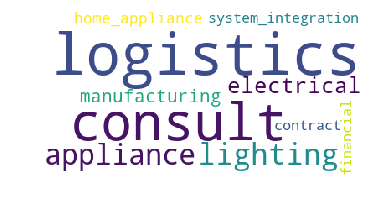

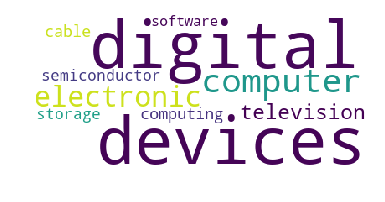

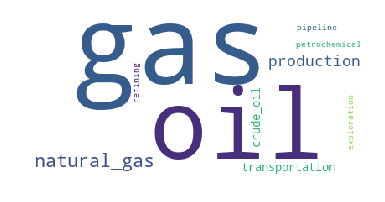

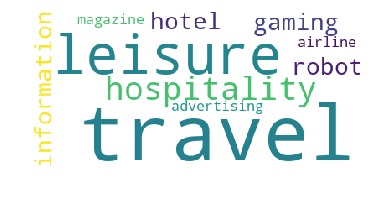

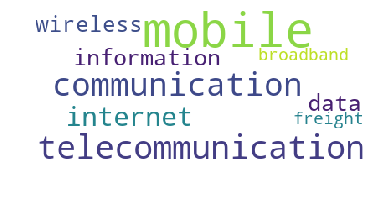

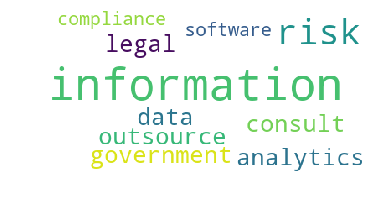

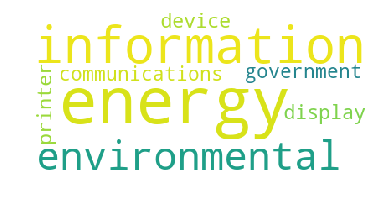

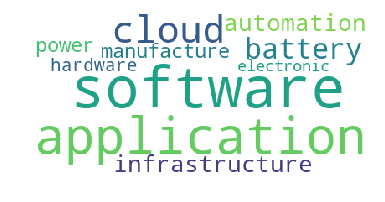

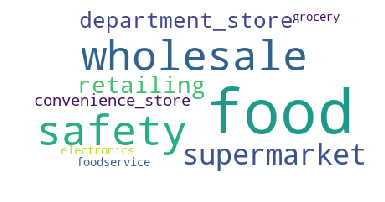

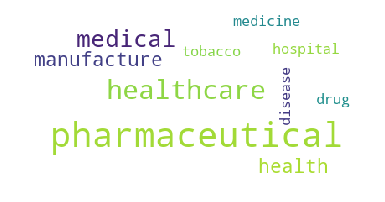

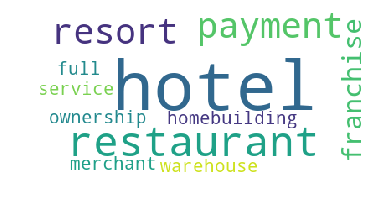

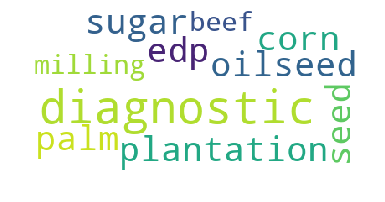

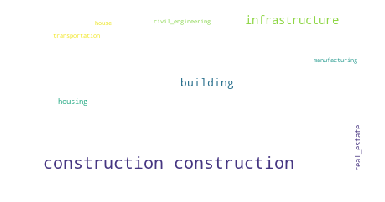

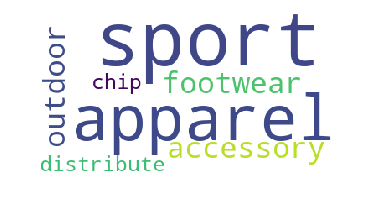

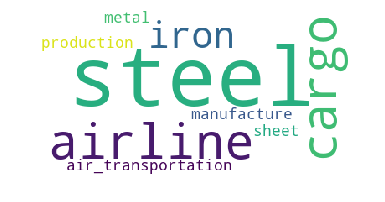

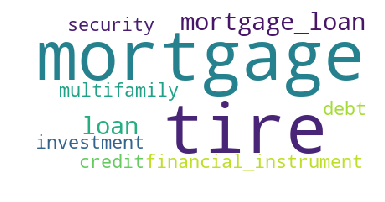

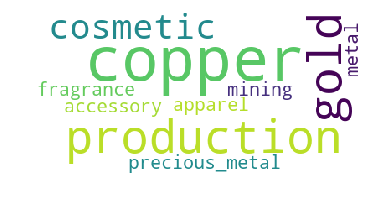

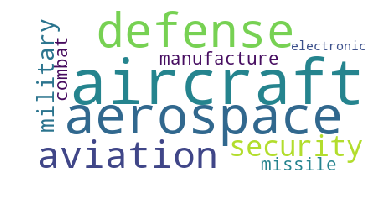

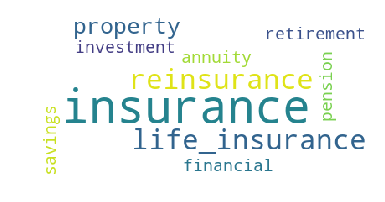

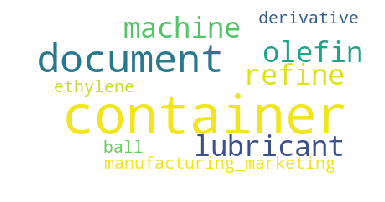

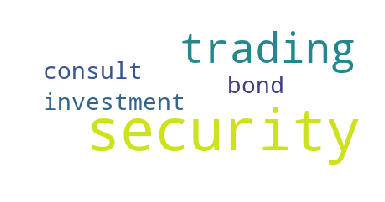

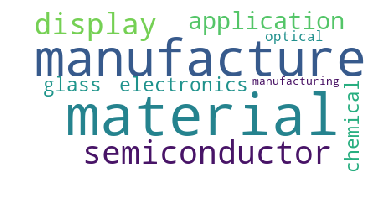

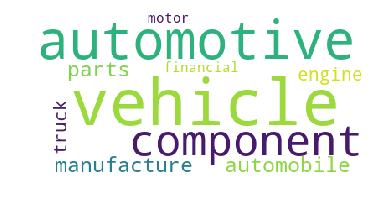

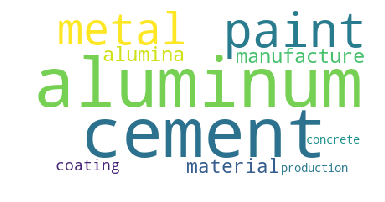

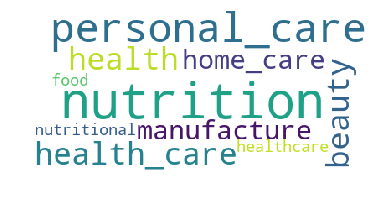

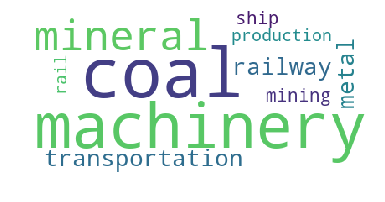

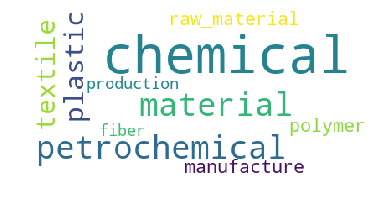

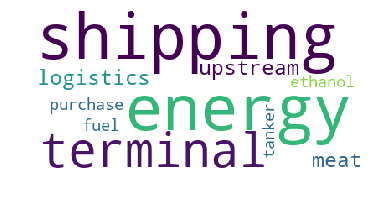

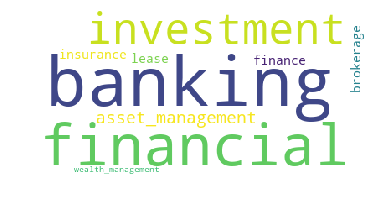

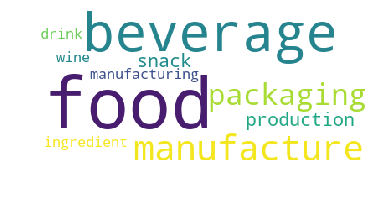

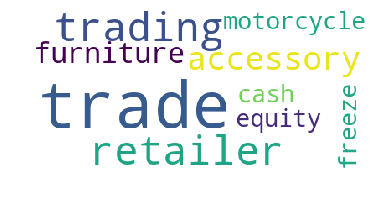

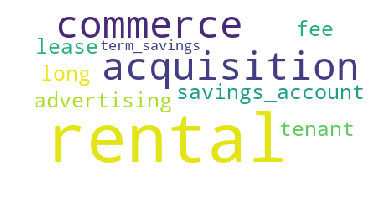

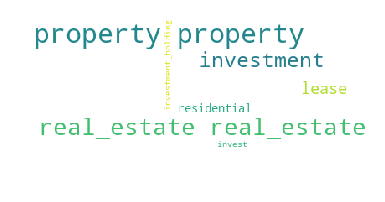

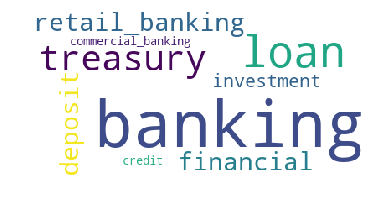

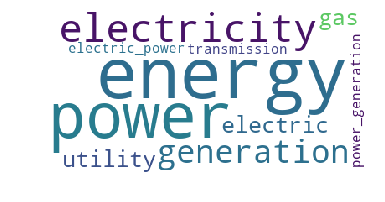

In [324]:
## word clouds
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud

ss=[]
for i in range(0,NUM_TOPICS):
    temp = lda.show_topic(i, 10)
    terms = []
    for term in temp:
        terms.append(term)
    ss.append(terms)
n=1
for j in ss:
    def terms_to_wordcounts(terms, multiplier=60):
        return  " ".join([" ".join(int(multiplier*i[1]) * [i[0]]) for i in terms])
    wordcloud = WordCloud(background_color="white").generate(terms_to_wordcounts(j))
    plt.imshow(wordcloud)
    plt.axis("off")
#    plt.savefig("terms"+str(n)+"ver2")
    plt.show()
    n+=1

In [1]:
fil=[]
fil2=[]
topicv=[1,2,3,4,5,34,7,8,9,18,11,12,13,14,16,17,21,22,23,24,26,28,29,32,33]
n=1
for i in topic:
    s=[]
    for j in i:
        if j[1]>=0.2:
            s.append(j)
    fil.append((n, s))
    n+=1
m=0
info=[]
for i in fil:
    if len(i[1])>=3:
        fil2.append(i[1])
        info.append([m,i])
        print(m,i)
        m+=1

NameError: name 'topic' is not defined

In [473]:
for i in fil:
    co=0
    for j in i[1]:
        co+=topicv.count(j[0])
    if co>=2:
        print(company[i[0]],i[1])

['JPMorgan Chase', 'Major Banks'] [(28, 0.64990462213637512), (33, 0.34120049915742556)]
['Bank of China', 'Major Banks'] [(28, 0.29174429099524224), (33, 0.61474863503426291)]
['Apple', 'Computer Hardware'] [(1, 0.3123104323837495), (13, 0.58292766285434605)]
['AT&T', 'Telecommunications services'] [(1, 0.55082126012940369), (4, 0.39371655499664682)]
['Citigroup', 'Major Banks'] [(28, 0.38191491705541147), (33, 0.52766670016080142)]
['ExxonMobil', 'Oil & Gas Operations'] [(2, 0.60595363424331417), (26, 0.20454808600584132)]
['Ping An Insurance Group', 'Diversified Insurance'] [(18, 0.49439630434134529), (28, 0.38565129606563947)]
['Microsoft', 'Software & Programming'] [(1, 0.39409475551635825), (7, 0.44121771935134269)]
['Allianz', 'Diversified Insurance'] [(18, 0.6507203890756621), (28, 0.21747003747355112)]
['BNP Paribas', 'Major Banks'] [(28, 0.49404402186317631), (33, 0.41167026385110922)]
['AXA Group', 'Diversified Insurance'] [(18, 0.74646120805176708), (33, 0.21727505568449665

In [188]:
# cosine similarity


mat=[]
for i in fil2:
    li=[]
    for t in range(0,NUM_TOPICS):
        li.append(0)
    for j in i:
        li[j[0]]=j[1]
    mat.append(li)

A =  np.array(mat)
A_sparse = sparse.csr_matrix(A)

similarities = cosine_similarity(A_sparse)
n=0
for i in similarities:
    nn=0
    for j in i:
        if j !=0.0 and n!=nn:
            similar.append([j, n, nn])
        nn+=1
    n+=1
similar=sorted(similar, reverse=True)
for i in similar:
    print(i)

[0.92407369574221054, 191, 109]
[0.92407369574221054, 109, 191]
[0.91432583540900758, 102, 28]
[0.91432583540900758, 28, 102]
[0.91313944091186361, 181, 94]
[0.91313944091186361, 94, 181]
[0.91155169887576037, 44, 22]
[0.91155169887576037, 22, 44]
[0.91137295887392555, 50, 27]
[0.91137295887392555, 27, 50]
[0.9065623521583126, 180, 154]
[0.9065623521583126, 154, 180]
[0.89220991179401976, 209, 48]
[0.89220991179401976, 48, 209]
[0.88267764974513852, 167, 84]
[0.88267764974513852, 84, 167]
[0.8810758319446399, 208, 124]
[0.8810758319446399, 124, 208]
[0.88083290905611122, 220, 47]
[0.88083290905611122, 47, 220]
[0.87968800522690738, 57, 30]
[0.87968800522690738, 30, 57]
[0.87570076710555445, 138, 4]
[0.87570076710555445, 4, 138]
[0.87533191393331655, 123, 76]
[0.87533191393331655, 76, 123]
[0.87471817187079881, 178, 97]
[0.87471817187079881, 97, 178]
[0.86783802123143294, 115, 92]
[0.86783802123143294, 92, 115]
[0.86483690541476121, 231, 4]
[0.86483690541476121, 4, 231]
[0.8644838263904

[0.63149301743244846, 219, 83]
[0.63149301743244846, 83, 219]
[0.6313128613603739, 83, 23]
[0.6313128613603739, 23, 83]
[0.63129256495677022, 185, 30]
[0.63129256495677022, 30, 185]
[0.63113824840426336, 140, 36]
[0.63113824840426336, 36, 140]
[0.63067492911840306, 166, 137]
[0.63067492911840306, 137, 166]
[0.63056331538025479, 127, 117]
[0.63056331538025479, 117, 127]
[0.63044395210462401, 212, 109]
[0.63044395210462401, 109, 212]
[0.63036169074315507, 233, 91]
[0.63036169074315507, 91, 233]
[0.63025551608236685, 206, 187]
[0.63025551608236685, 187, 206]
[0.63003468053887723, 105, 27]
[0.63003468053887723, 27, 105]
[0.62987144221656943, 160, 11]
[0.62987144221656943, 11, 160]
[0.62986827004573742, 191, 165]
[0.62986827004573742, 165, 191]
[0.62958741203119217, 145, 33]
[0.62958741203119217, 33, 145]
[0.62921944736921054, 145, 83]
[0.62921944736921054, 83, 145]
[0.62892208257123849, 59, 23]
[0.62892208257123849, 23, 59]
[0.62879221238471428, 203, 2]
[0.62879221238471428, 2, 203]
[0.628

[0.47437500248023667, 186, 149]
[0.47437500248023667, 149, 186]
[0.47430470618578968, 143, 49]
[0.47430470618578968, 49, 143]
[0.47413433029296309, 205, 202]
[0.47413433029296309, 202, 205]
[0.47405753223892527, 201, 145]
[0.47405753223892527, 145, 201]
[0.47388949248916779, 232, 10]
[0.47388949248916779, 10, 232]
[0.47381799724026641, 199, 78]
[0.47381799724026641, 78, 199]
[0.47364168245388416, 229, 144]
[0.47364168245388416, 144, 229]
[0.47362142957096948, 216, 50]
[0.47362142957096948, 50, 216]
[0.47342932081072009, 194, 29]
[0.47342932081072009, 29, 194]
[0.47329794885718773, 179, 95]
[0.47329794885718773, 95, 179]
[0.47319825329322168, 77, 0]
[0.47319825329322168, 0, 77]
[0.47305461654855491, 113, 7]
[0.47305461654855491, 7, 113]
[0.47303409041087147, 162, 93]
[0.47303409041087147, 93, 162]
[0.47292467432686708, 128, 11]
[0.47292467432686708, 11, 128]
[0.47278475400009468, 87, 44]
[0.47278475400009468, 44, 87]
[0.47276879109869113, 216, 99]
[0.47276879109869113, 99, 216]
[0.47270

[0.38468541882949953, 163, 63]
[0.38468541882949953, 63, 163]
[0.38453941039051487, 34, 33]
[0.38453941039051487, 33, 34]
[0.38432400351329282, 174, 155]
[0.38432400351329282, 155, 174]
[0.38429419512976865, 84, 43]
[0.38429419512976865, 43, 84]
[0.38426201847906249, 151, 20]
[0.38426201847906249, 20, 151]
[0.38418530851387384, 189, 160]
[0.38418530851387384, 160, 189]
[0.38418158239669065, 214, 75]
[0.38418158239669065, 75, 214]
[0.38411730872706151, 135, 13]
[0.38411730872706151, 13, 135]
[0.38396354690907558, 147, 31]
[0.38396354690907558, 31, 147]
[0.38395582456668714, 178, 156]
[0.38395582456668714, 156, 178]
[0.38393551302012907, 150, 129]
[0.38393551302012907, 129, 150]
[0.383888759887001, 129, 95]
[0.383888759887001, 95, 129]
[0.38384401715623084, 81, 50]
[0.38384401715623084, 50, 81]
[0.38382643440218012, 151, 0]
[0.38382643440218012, 0, 151]
[0.38378340913677833, 129, 28]
[0.38378340913677833, 28, 129]
[0.38377325404185247, 74, 30]
[0.38377325404185247, 30, 74]
[0.38357353944

[0.30593675968088796, 168, 114]
[0.30593675968088796, 114, 168]
[0.30580607550269434, 157, 115]
[0.30580607550269434, 115, 157]
[0.30577802387838721, 160, 96]
[0.30577802387838721, 96, 160]
[0.30560018988364213, 88, 52]
[0.30560018988364213, 52, 88]
[0.30559029297935425, 45, 14]
[0.30559029297935425, 14, 45]
[0.30550816141613296, 169, 66]
[0.30550816141613296, 66, 169]
[0.30537662012810496, 107, 36]
[0.30537662012810496, 36, 107]
[0.30528828926861518, 158, 143]
[0.30528828926861518, 143, 158]
[0.30525761537629387, 156, 98]
[0.30525761537629387, 98, 156]
[0.30525509817006441, 200, 112]
[0.30525509817006441, 112, 200]
[0.30516710271005565, 5, 0]
[0.30516710271005565, 0, 5]
[0.30506520437419193, 40, 16]
[0.30506520437419193, 16, 40]
[0.30500929964749285, 145, 86]
[0.30500929964749285, 86, 145]
[0.30500366481933572, 180, 144]
[0.30500366481933572, 144, 180]
[0.30481254460367541, 166, 71]
[0.30481254460367541, 71, 166]
[0.30478446954492261, 67, 66]
[0.30478446954492261, 66, 67]
[0.304754571

[0.26589350535650708, 72, 41]
[0.26589350535650708, 41, 72]
[0.26585216279954976, 168, 19]
[0.26585216279954976, 19, 168]
[0.26578942788610144, 191, 87]
[0.26578942788610144, 87, 191]
[0.26574762795444201, 222, 191]
[0.26574762795444201, 191, 222]
[0.26571154083900306, 228, 88]
[0.26571154083900306, 88, 228]
[0.26551838599892935, 199, 50]
[0.26551838599892935, 50, 199]
[0.2653811742206803, 118, 17]
[0.2653811742206803, 17, 118]
[0.26537653600818478, 212, 174]
[0.26537653600818478, 174, 212]
[0.26536703483619106, 125, 38]
[0.26536703483619106, 38, 125]
[0.26534757897270606, 227, 37]
[0.26534757897270606, 37, 227]
[0.26530050981802067, 140, 19]
[0.26530050981802067, 19, 140]
[0.26527523117502427, 181, 37]
[0.26527523117502427, 37, 181]
[0.26520783238372653, 198, 11]
[0.26520783238372653, 11, 198]
[0.265204253138839, 212, 12]
[0.265204253138839, 12, 212]
[0.26520242599939586, 177, 124]
[0.26520242599939586, 124, 177]
[0.26518499335449025, 161, 91]
[0.26518499335449025, 91, 161]
[0.2651048

[0.22602275014319462, 38, 54]
[0.22601296715463243, 73, 48]
[0.22601296715463243, 48, 73]
[0.22585437128587724, 227, 72]
[0.22585437128587724, 72, 227]
[0.22583143999288269, 136, 9]
[0.22583143999288269, 9, 136]
[0.2257735008123386, 104, 74]
[0.2257735008123386, 74, 104]
[0.22572702142572004, 217, 128]
[0.22572702142572004, 128, 217]
[0.22572309157136639, 187, 88]
[0.22572309157136639, 88, 187]
[0.22571554424210785, 124, 7]
[0.22571554424210785, 7, 124]
[0.22567460707945525, 209, 139]
[0.22567460707945525, 139, 209]
[0.22559210414907455, 150, 118]
[0.22559210414907455, 118, 150]
[0.22556782708056355, 183, 48]
[0.22556782708056355, 48, 183]
[0.22546774806193409, 136, 20]
[0.22546774806193409, 20, 136]
[0.22546076494853409, 192, 141]
[0.22546076494853409, 141, 192]
[0.2254127210871695, 140, 49]
[0.2254127210871695, 49, 140]
[0.22530103492368314, 213, 130]
[0.22530103492368314, 130, 213]
[0.2252793379562037, 213, 60]
[0.2252793379562037, 60, 213]
[0.22526282766298791, 149, 140]
[0.2252628

[0.18958304877238918, 17, 90]
[0.18958177851566996, 122, 28]
[0.18958177851566996, 28, 122]
[0.18956849285104369, 175, 85]
[0.18956849285104369, 85, 175]
[0.18955455333758298, 93, 60]
[0.18955455333758298, 60, 93]
[0.18942267260982515, 191, 57]
[0.18942267260982515, 57, 191]
[0.18941453255071372, 229, 213]
[0.18941453255071372, 213, 229]
[0.1893873007236824, 16, 6]
[0.1893873007236824, 6, 16]
[0.18935487646793975, 201, 64]
[0.18935487646793975, 64, 201]
[0.18934695766538207, 190, 56]
[0.18934695766538207, 56, 190]
[0.18933290583318818, 72, 1]
[0.18933290583318818, 1, 72]
[0.18926796758151659, 118, 50]
[0.18926796758151659, 50, 118]
[0.18921877325381231, 108, 58]
[0.18921877325381231, 58, 108]
[0.18921446673731732, 170, 11]
[0.18921446673731732, 11, 170]
[0.18919947181347485, 185, 137]
[0.18919947181347485, 137, 185]
[0.18919537330517991, 179, 60]
[0.18919537330517991, 60, 179]
[0.18905171055207112, 128, 73]
[0.18905171055207112, 73, 128]
[0.18903454829521643, 186, 179]
[0.1890345482952

[0.158346316601364, 144, 225]
[0.15834119724223991, 170, 76]
[0.15834119724223991, 76, 170]
[0.1583111165635035, 153, 113]
[0.1583111165635035, 113, 153]
[0.15830480286920451, 197, 22]
[0.15830480286920451, 22, 197]
[0.15827656102592647, 146, 121]
[0.15827656102592647, 121, 146]
[0.15827233205262634, 129, 51]
[0.15827233205262634, 51, 129]
[0.15826667804608249, 217, 199]
[0.15826667804608249, 199, 217]
[0.15826663221177065, 226, 9]
[0.15826663221177065, 9, 226]
[0.15826307746138241, 183, 36]
[0.15826307746138241, 36, 183]
[0.1582337721087845, 201, 198]
[0.1582337721087845, 198, 201]
[0.15821436327029917, 147, 97]
[0.15821436327029917, 97, 147]
[0.15818692549061958, 67, 62]
[0.15818692549061958, 62, 67]
[0.15817454242006393, 32, 26]
[0.15817454242006393, 26, 32]
[0.15817295599860787, 214, 157]
[0.15817295599860787, 157, 214]
[0.15816024663336206, 233, 86]
[0.15816024663336206, 86, 233]
[0.15815019224879684, 54, 49]
[0.15815019224879684, 49, 54]
[0.15810376546331706, 166, 124]
[0.1581037

[0.130925455686868, 212, 99]
[0.130925455686868, 99, 212]
[0.13091439021829057, 126, 33]
[0.13091439021829057, 33, 126]
[0.13086757467788349, 200, 1]
[0.13086757467788349, 1, 200]
[0.13085079413435621, 217, 79]
[0.13085079413435621, 79, 217]
[0.13084662495769805, 203, 148]
[0.13084662495769805, 148, 203]
[0.13082850541215188, 172, 121]
[0.13082850541215188, 121, 172]
[0.13077962807114255, 115, 1]
[0.13077962807114255, 1, 115]
[0.13077131606223227, 186, 100]
[0.13077131606223227, 100, 186]
[0.13076835464730513, 212, 79]
[0.13076835464730513, 79, 212]
[0.13075029729371826, 179, 25]
[0.13075029729371826, 25, 179]
[0.13071775674442504, 170, 125]
[0.13071775674442504, 125, 170]
[0.13067614790203669, 80, 74]
[0.13067614790203669, 74, 80]
[0.13059411087630227, 124, 32]
[0.13059411087630227, 32, 124]
[0.13059069072246859, 137, 84]
[0.13059069072246859, 84, 137]
[0.13058747348042085, 217, 63]
[0.13058747348042085, 63, 217]
[0.13058478769759674, 179, 64]
[0.13058478769759674, 64, 179]
[0.1305679

[0.10292294308157061, 40, 93]
[0.10290365737568814, 117, 113]
[0.10290365737568814, 113, 117]
[0.10289347728728401, 165, 6]
[0.10289347728728401, 6, 165]
[0.10288798069435387, 156, 83]
[0.10288798069435387, 83, 156]
[0.10286509378526582, 198, 98]
[0.10286509378526582, 98, 198]
[0.10282971718194671, 211, 184]
[0.10282971718194671, 184, 211]
[0.10278226097371559, 172, 7]
[0.10278226097371559, 7, 172]
[0.10273940107062851, 148, 143]
[0.10273940107062851, 143, 148]
[0.10273895004669575, 196, 61]
[0.10273895004669575, 61, 196]
[0.10272005127751065, 160, 97]
[0.10272005127751065, 97, 160]
[0.10271674299314905, 73, 68]
[0.10271674299314905, 68, 73]
[0.10271222217286398, 116, 2]
[0.10271222217286398, 2, 116]
[0.10269196855308227, 148, 20]
[0.10269196855308227, 20, 148]
[0.10268505324718262, 203, 81]
[0.10268505324718262, 81, 203]
[0.10267881356666819, 189, 72]
[0.10267881356666819, 72, 189]
[0.10262166873460619, 150, 24]
[0.10262166873460619, 24, 150]
[0.10258526248141457, 86, 21]
[0.102585262

[0.074762292034792927, 37, 172]
[0.074646220243961309, 200, 189]
[0.074646220243961309, 189, 200]
[0.074645354734281466, 199, 186]
[0.074645354734281466, 186, 199]
[0.074591976735349744, 44, 43]
[0.074591976735349744, 43, 44]
[0.074591283102764583, 231, 31]
[0.074591283102764583, 31, 231]
[0.074578247595923408, 223, 156]
[0.074578247595923408, 156, 223]
[0.074570422973917749, 231, 133]
[0.074570422973917749, 133, 231]
[0.074517753562225342, 215, 121]
[0.074517753562225342, 121, 215]
[0.074474153447395927, 225, 154]
[0.074474153447395927, 154, 225]
[0.074410567165742153, 106, 30]
[0.074410567165742153, 30, 106]
[0.074346761348339285, 214, 5]
[0.074346761348339285, 5, 214]
[0.074333266158756683, 81, 79]
[0.074333266158756683, 79, 81]
[0.074324804914987372, 60, 13]
[0.074324804914987372, 13, 60]
[0.074318238691823704, 231, 145]
[0.074318238691823704, 145, 231]
[0.074295278020178546, 115, 40]
[0.074295278020178546, 40, 115]
[0.07424046104725919, 97, 2]
[0.07424046104725919, 2, 97]
[0.07420

In [189]:
#set similarity
mat2=[]
for i in fil2:
    li=[]
    for t in range(0,NUM_TOPICS):
        li.append(0)
    for j in i:
        li[j[0]]=1
    mat2.append(li)

In [415]:
# topic kmeans clustering
cid=[]
cluid=[]
clnum=50
from sklearn.cluster import KMeans
import numpy as np
X = np.array(mat)
kmeans = KMeans(n_clusters=clnum, random_state=0).fit(X)
n=0
for i in kmeans.labels_:
    cid.append([n, i])
    n+=1
for i in range(0, clnum):
    cc=[]
    for j in cid:
        if j[1]==i:
            cc.append(j[0])
    cluid.append(cc)
n=0
for i in cluid:
    print(n, i)
    n+=1

0 [24, 27, 48, 50, 66, 124, 208, 209]
1 [10, 86, 93, 228]
2 [72, 92, 100, 115, 203]
3 [31, 33, 52, 54, 77, 111]
4 [141, 206, 213]
5 [59, 166, 218]
6 [2, 47, 114, 127, 220]
7 [3, 7, 32, 64, 133]
8 [56, 129, 148, 161]
9 [13, 30, 57, 153, 185, 233]
10 [17, 20, 42, 70, 112, 179, 210]
11 [91, 106, 109, 130, 143, 155, 174, 191, 212, 214, 229]
12 [9, 101, 205]
13 [61, 79, 96, 120, 142]
14 [15, 16, 18, 38, 46, 202]
15 [104, 182]
16 [0, 68, 121, 147, 226]
17 [172, 196]
18 [4, 5, 138, 231]
19 [28, 49, 102, 222, 223]
20 [137]
21 [43, 62, 95, 128, 169, 171]
22 [23, 55, 65, 123, 144, 219]
23 [19, 26, 41, 87, 103, 175, 200]
24 [53, 132, 186, 224]
25 [1, 14, 163, 181, 187, 227, 232]
26 [88, 94, 158, 207]
27 [21, 76, 154, 180, 192, 204]
28 [11, 159, 189]
29 [63, 80, 156, 211]
30 [75, 157, 170, 176]
31 [67, 90, 134, 190]
32 [39, 82, 110, 122, 162, 198]
33 [22, 36, 44, 73, 131, 139, 140, 221, 230]
34 [40, 150, 151, 152]
35 [6, 146, 193, 215]
36 [29, 45, 197]
37 [78, 125, 168, 177, 188, 195]
38 [89, 99, 

0 ['Central Japan Railway', 'Railroads']
1 ['Sumitomo', 'Trading Companies']
2 ['Caterpillar', 'Heavy Equipment']
3 ['Komatsu', 'Heavy Equipment']
4 ['Hyundai Heavy Industries', 'Heavy Equipment']
5 ['Alrosa', 'Diversified Metals & Mining']
6 ['DSME', 'Heavy Equipment']
7 ['Samsung Heavy Industries', 'Heavy Equipment']
[0, 0.11853318461082764, 0, 0, 0.13724563196078943, 0, 0, 0, 0, 0.46406343392063576, 0, 0.17454914171605318, 0]
[0, 0, 0, 0.12639370420344567, 0.17015605995805261, 0, 0.11405095423851705, 0, 0, 0.29458761529119093, 0, 0, 0.11199011347606443]
[0, 0, 0, 0, 0.16639128004071368, 0, 0, 0.13986873917109735, 0, 0.29832347115222813, 0, 0, 0.22699195723338378]
[0, 0, 0, 0, 0.18669309268720038, 0, 0.23278268815714101, 0, 0, 0.2811687453484164, 0, 0, 0.10768631853679504]
[0, 0, 0, 0.12456064227474066, 0, 0, 0, 0.10704396235839314, 0.13389950087597849, 0.30146019233482518, 0, 0, 0.16356948002795266]
[0.19000924727164381, 0, 0.10285714285714288, 0, 0.10622806449299868, 0, 0, 0, 0, 0.

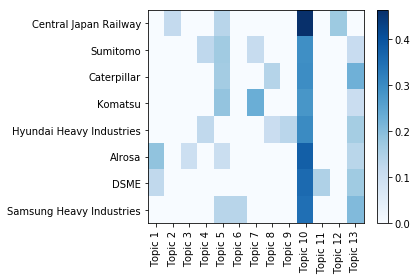

In [463]:
# competitor information
com=cluid[0]
coms=[]
tops=[]
top=[]
topmat=[]
docnames=[]
for j in com:
    for i in info:
        if i[0]==j:
            coms.append((i[1][0]))
            tops.append((i[1][1]))
n=0
for i in coms:
    print(n,company[i])
    docnames.append(company[i][0])
    n+=1
for i in tops:
    for j in i:
        top.append(j[0])
top=set(top)
top=list(top)
top=sorted(top)
for i in tops:
    li=[]
    for j in top:
        li.append(0)
    for t in i:
        li[top.index(t[0])]=t[1]
    topmat.append(li)
for i in topmat:
    print(i)
# heat map
doctopic = topmat

K=len(top)

topic_labels = ['Topic {}'.format(k+1) for k in range(K)]
plt.pcolor(doctopic, norm=None, cmap='Blues')
plt.yticks(np.arange(len(com))+0.5, docnames)
plt.xticks(np.arange(len(top))+0.5, topic_labels)
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
plt.colorbar(cmap='Blues')
plt.tight_layout()
plt.show()

In [ ]:
# topic set kmeans clustering
cid=[]
cluid_s=[]
clnum=30
from sklearn.cluster import KMeans
import numpy as np
X = np.array(mat2)
kmeans = KMeans(n_clusters=clnum, random_state=0).fit(X)
n=0
for i in kmeans.labels_:
    cid.append([n, i])
    n+=1
for i in range(0, clnum):
    cc=[]
    for j in cid:
        if j[1]==i:
            cc.append(j[0])
    cluid_s.append(cc)
n=0
for i in cluid_s:
    print(n, i)
    n+=1

In [ ]:
# set competitor information
com=cluid_s[14]
coms=[]
tops=[]
top=[]
topmat=[]
docnames=[]
for j in com:
    for i in info:
        if i[0]==j:
            coms.append((i[1][0]))
            tops.append((i[1][1]))
n=0
for i in coms:
    print(n,company[i])
    docnames.append(company[i][0])
    n+=1
for i in tops:
    for j in i:
        top.append(j[0])
top=set(top)
top=list(top)
top=sorted(top)
for i in tops:
    li=[]
    for j in top:
        li.append(0)
    for t in i:
        li[top.index(t[0])]=t[1]
    topmat.append(li)
for i in topmat:
    print(i)

# heat map
doctopic = topmat

K=len(top)

topic_labels = ['Topic {}'.format(k+1) for k in range(K)]
plt.pcolor(doctopic, norm=None, cmap='Blues')
plt.yticks(np.arange(len(com))+0.5, docnames)
plt.xticks(np.arange(len(top))+0.5, topic_labels)
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
plt.colorbar(cmap='Blues')
plt.tight_layout()
plt.show()